## Insurance Claim Fraud Detection Project

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset
df=pd.read_csv(r'D:\Files\Automobile_insurance_fraud.csv')
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

This data frame contains information related to **Insurance Claim**. It contains **1000 rows and 40 columns** out of which **39 columns are inputs** and **1 column is target variable** i.e. **'fraud_reported' column**.  
  
The data frame contains both  **numeric and catagorical data**  
    
**Target variable has catagorical data,** thus it represents **Classification Problem**.  
  
**The goal is to predict if an insurance claim is fraudulent or not.**   

In [3]:
df.columns#checking columns of data frame

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [4]:
col=df.columns.to_list()#storing columns name of data frame in 'col' variable

#fetching details of columns, such as Unique values, Number of unique values and their value counts 
for i in col:#Iterating through 'col' variable
    print('\n',i,':-\nUnique values:',df[i].unique(),'\nNumber of unique values:',df[i].nunique(),'\n\n',df[i].value_counts().to_frame('Value Counts'))#Printing


 months_as_customer :-
Unique values: [328 228 134 256 137 165  27 212 235 447  60 121 180 473  70 140 160 196
 460 217 370 413 237   8 257 202 224 241  64 166 155 114 149 147  62 289
 431 199  79 116  37 106 269 265 163 355 175 192 430  91 223 195  22 439
  94  11 151 154 245 119 215 295 254 107 478 128 338 271 222 120 270 319
 194 227 244  78 200 284 275 153  31  41 127  61 207 219  80 325  29 239
 279 350 464 118 298  87 261 453 210 168 390 258 225 164 255 206 203 211
 274  81 280 112  24  93 171 124 287 122 398 214 209  82 193 288 104 101
 375 461 428  45 136 216 278 108  14 276  47  73 294 324  53 426 111  86
 296 125 177 238 449 252 359  19 285  30 342 468 343 404  63 335 142 272
  69  38 281 246 330 362 371 377 172  99 249 190 174  95   2 117 242 440
  20 208 156 232  84 394  35 369 332 243 264  32 259 186 201 436 189 105
  88  40  59  39 123 231 247  48 267 286 253  10 158   1  85 233 266  97
 399 305 129 283  96 176 159 290 299  66 334 429  15 230 250  65 475  77
 229 110 292

This gives a breif information about **unique values, count of unique values and value counts** of each column present in the data frame.  
   
**All values** present in **'policy_number'** feature are unique.

There is **'?' value** present in **'collision_type' and 'property_damage ', 'police_report_available'** features representing **Null values.** 

We can **drop '_c39'** feature as there are only null values present in it.  

We can also **drop 'policy_number' and 'incident_location'** features as all values present in them are unique  and  they act as an ID thus, **they do not contribute towards analysis.**

We can also **drop 'insured_zip** features as most of the  values present in it are unique and they act as an ID thus, **it does not contribute towards analysis.**

In [5]:
df.drop('_c39',axis=1,inplace=True)#dropping '_c39' feature
df.drop('policy_number',axis=1,inplace=True)#dropping 'policy_number' feature
df.drop('insured_zip',axis=1,inplace=True)#dropping 'insured_zip' feature
df.drop('incident_location',axis=1,inplace=True)#dropping 'incident_location' feature

df

months_as_customer  age policy_bind_date policy_state policy_csl  \
0                   328   48       17-10-2014           OH    250/500   
1                   228   42       27-06-2006           IN    250/500   
2                   134   29       06-09-2000           OH    100/300   
3                   256   41       25-05-1990           IL    250/500   
4                   228   44       06-06-2014           IL   500/1000   
..                  ...  ...              ...          ...        ...   
995                   3   38       16-07-1991           OH   500/1000   
996                 285   41       05-01-2014           IL    100/300   
997                 130   34       17-02-2003           OH    250/500   
998                 458   62       18-11-2011           IL   500/1000   
999                 456   60       11-11-1996           OH    250/500   

     policy_deductable  policy_annual_premium  umbrella_limit insured_sex  \
0                 1000                1406.91               0        MALE   
1                 2000                1197.22         5000000        MALE   
2                 2000                1413.14         5000000      FEMALE   
3                 2000                1415.74         6000000      FEMALE   
4                 1000                1583.91         6000000        MALE   
..                 ...                    ...             ...         ...   
995               1000                1310.80               0      FEMALE   
996               1000                1436.79               0      FEMALE   
997                500                1383.49         3000000      FEMALE   
998               2000                1356.92         5000000        MALE   
999               1000                 766.19               0      FEMALE   

    insured_education_level  ... witnesses police_report_available  \
0                        MD  ...         2                     YES   
1                        MD  ...         0                       ?   
2                       PhD  ...         3                      NO   
3                       PhD  ...         2                      NO   
4                 Associate  ...         1                      NO   
..                      ...  ...       ...                     ...   
995                 Masters  ...         1                       ?   
996                     PhD  ...         3                       ?   
997                 Masters  ...         3                     YES   
998               Associate  ...         1                     YES   
999               Associate  ...         3                       ?   

    total_claim_amount  injury_claim  property_claim vehicle_claim  \
0                71610          6510           13020         52080   
1                 5070           780             780          3510   
2                34650          7700            3850         23100   
3                63400          6340            6340         50720   
4                 6500          1300             650          4550   
..                 ...           ...             ...           ...   
995              87200         17440            8720         61040   
996             108480         18080           18080         72320   
997              67500          7500            7500         52500   
998              46980          5220            5220         36540   
999               5060           460             920          3680   

      auto_make auto_model auto_year fraud_reported  
0          Saab        92x      2004              Y  
1      Mercedes       E400      2007              Y  
2         Dodge        RAM      2007              N  
3     Chevrolet      Tahoe      2014              Y  
4        Accura        RSX      2009              N  
..          ...        ...       ...            ...  
995       Honda     Accord      2006              N  
996  Volkswagen     Passat      2015              N  
997      Suburu    Impreza      199

**'_c39', 'policy_number', 'insured_zip' and 'incident_location'** features are **dropped successfully**. Now the data frame has **36 columns.**

In [6]:
validation=0#Initilizaing variable

col=df.columns.to_list()#updating 'col' list

#re-checking for '?' value in all columns
for i in col:#iterating through 'col' variable
    
    if not df.loc[df[i]=='?'].empty:#Checking for '?'
        
        validation+=1#increasing 1 in 'validation' variable
        
        print(f'"{i}" column contains "?" value.')
        
if validation==0:#Using 'if' to check whether 'validation' variable's value matches to '0' or not.
    print('This data frame does not contains any "?" value')

"collision_type" column contains "?" value.
"property_damage" column contains "?" value.
"police_report_available" column contains "?" value.


In [7]:
df.dtypes#checking data types of columns

months_as_customer               int64
age                              int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries          

There are **three types** of data present in this data frame which are **int64 ,object and float64**. **Majority** of the data types are **'object'**.
  
**'policy_bind_date' and 'incident_date'** features contains date thus their data type should be **'datetime64'** instead of 'object'.  
  

In [8]:
a=['collision_type', 'property_damage', 'police_report_available' ]#creating list

for i in a:#iterating through 'a' variable
    
    mode=df[i].mode()[0] #fetching mode
 
    df[i].replace('?',mode,inplace=True)
    
    print(f"Using mode value as '{mode}' of '{i}' column.")

Using mode value as 'Rear Collision' of 'collision_type' column.
Using mode value as '?' of 'property_damage' column.
Using mode value as '?' of 'police_report_available' column.


We are getting **mode as '?'** in **'property_damage' and 'police_report_available'** features thus **we can fill them mannually.**

In [9]:
df['property_damage'].value_counts() #checking value counts

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

**Replacing '?'** value with **'NO'** value in  **'property_damage'** feature

In [10]:
df['property_damage'].replace('?','NO',inplace=True)

In [11]:
df['police_report_available'].value_counts() #checking value counts

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

**Replacing '?'** value with **'NO'** value in  **'police_report_available'** feature

In [12]:
df['police_report_available'].replace('?','NO',inplace=True)

In [13]:
validation=0#Initilizaing variable

#re-checking for '?' value in all columns
for i in col:#iterating through 'col' variable
    
    if not df.loc[df[i]=='?'].empty:#Checking for '?'
        
        validation+=1#increasing 1 in 'validation' variable
        
        print(f'"{i}" column contains "?" value.')
        
if validation==0:#Using 'if' to check whether 'validation' variable's value matches to '0' or not.
    print('This data frame does not contains any "?" value.')

This data frame does not contains any "?" value.


In [14]:
#checking for whitespace characters in columns of data frame
space=''#Initilizing empty 'space' variable
validation=0#Initilizaing variable

for i in col:#Iterating through columns
    
    for a in range(1,11): #Iterating for 10 number of times i.e. it can detect upto 10 number of whitespaces per row
        space+=' ' #Incrementing one white space character per iteration
        
        if not df.loc[df[i]==space].empty:#Checking if any row contains white space characters
            
            validation+=1#increasing 1 in 'validation' variable
            
            print(f'There are white space characters present in {i} Column with length of  {len(space)}  white space characters')#Printing if a column contains white space character along with number of  white space characters present in a single row(Note:It does not print total number of white space characters present in a column)
            
    space=''#Reseting 'space' variable
    
if validation==0:#Using 'if' to check whether 'validation' variable's value matches to '0' or not.
    print('This data frame does not contains any whitespace characters.')

This data frame does not contains any whitespace characters.


In [15]:
df.isnull().sum() #Checking if null values are present in data frame 

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_c

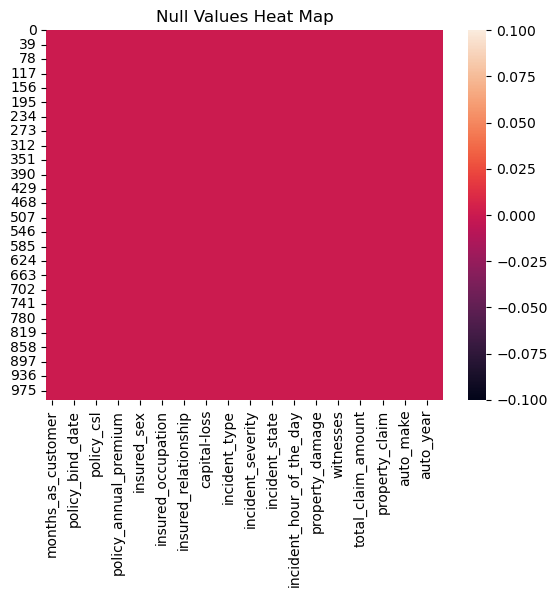

In [16]:
sb.heatmap(df.isnull())#Visualizing null values via Heatmap
plt.title('Null Values Heat Map')
plt.show()

We can confirm that this **data frame does not have null values present in it.**

In [17]:
#creating a function named 'dup' to check for duplicate values in data frame

def dup(x):#takes one argument i.e variable which stores data frame
    
    a=x.duplicated().sum()#storing sum of duplicate values in 'a' variable
    
    if a==0:#first condition
        print('This data frame does not contains duplicate values.')#printing
    
    elif a==1:#second condition
        print('There is only 1 duplicate value present in the data frame.')#printing
    
    else:
        print(f'Total duplicate values present in DataFrame are {x.duplicated().sum()}.')#printing
    
dup(df)

This data frame does not contains duplicate values.


In [18]:
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'],format='%d-%m-%Y')#changing data type of 'policy_bind_date' feature
df['incident_date']=pd.to_datetime(df['incident_date'],format='%d-%m-%Y')#changing data type of 'policy_bind_date' feature

df.dtypes

months_as_customer                      int64
age                                     int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted                  object
incident_state                         object
incident_city                     

**'policy_bind_date' and 'incident_date'** features's data type is changed from 'object' **to 'datetime64[ns]' successfully.**

In [19]:
df.set_index('policy_bind_date',inplace=True)#setting 'policy_bind_date' feature as index of the data frame
df

months_as_customer  age policy_state policy_csl  \
policy_bind_date                                                    
2014-10-17                       328   48           OH    250/500   
2006-06-27                       228   42           IN    250/500   
2000-09-06                       134   29           OH    100/300   
1990-05-25                       256   41           IL    250/500   
2014-06-06                       228   44           IL   500/1000   
...                              ...  ...          ...        ...   
1991-07-16                         3   38           OH   500/1000   
2014-01-05                       285   41           IL    100/300   
2003-02-17                       130   34           OH    250/500   
2011-11-18                       458   62           IL   500/1000   
1996-11-11                       456   60           OH    250/500   

                  policy_deductable  policy_annual_premium  umbrella_limit  \
policy_bind_date                                                             
2014-10-17                     1000                1406.91               0   
2006-06-27                     2000                1197.22         5000000   
2000-09-06                     2000                1413.14         5000000   
1990-05-25                     2000                1415.74         6000000   
2014-06-06                     1000                1583.91         6000000   
...                             ...                    ...             ...   
1991-07-16                     1000                1310.80               0   
2014-01-05                     1000                1436.79               0   
2003-02-17                      500                1383.49         3000000   
2011-11-18                     2000                1356.92         5000000   
1996-11-11                     1000                 766.19               0   

                 insured_sex insured_education_level insured_occupation  ...  \
policy_bind_date                                                         ...   
2014-10-17              MALE                      MD       craft-repair  ...   
2006-06-27              MALE                      MD  machine-op-inspct  ...   
2000-09-06            FEMALE                     PhD              sales  ...   
1990-05-25            FEMALE                     PhD       armed-forces  ...   
2014-06-06              MALE               Associate              sales  ...   
...                      ...                     ...                ...  ...   
1991-07-16            FEMALE                 Masters       craft-repair  ...   
2014-01-05            FEMALE                     PhD     prof-specialty  ...   
2003-02-17            FEMALE                 Masters       armed-forces  ...   
2011-11-18              MALE               Associate  handlers-cleaners  ...   
1996-11-11            FEMALE               Associate              sales  ...   

                 witnesses police_report_available  total_claim_amount  \
policy_bind_date                                                         
2014-10-17               2                     YES               71610   
2006-06-27               0                      NO                5070   
2000-09-06               3                      NO               34650   
1990-05-25               2                      NO               63400   
2014-06-06               1                      NO                6500   
...                    ...                     ...                 ...   
1991-07-16               1                      NO               87200   
2014-01-05               3                      NO              108480   
2003-02-17               3                     YES               67500   
2011-11-18               1                     YES               46980   
1996-11-11               3                      NO                5060   

                  injury_claim property_claim vehicle_claim   auto_make  \
policy_bind_date          

**'policy_bind_date'** feature is **set as index** successfully. Now data frame has **35 columns** out of which **34 columns are inputs** and **remaing column is target variable i.e. 'fraud_reported'**

In [20]:
df.info()#Checking more information related to data frame

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2014-10-17 to 1996-11-11
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_state                 1000 non-null   object        
 3   policy_csl                   1000 non-null   object        
 4   policy_deductable            1000 non-null   int64         
 5   policy_annual_premium        1000 non-null   float64       
 6   umbrella_limit               1000 non-null   int64         
 7   insured_sex                  1000 non-null   object        
 8   insured_education_level      1000 non-null   object        
 9   insured_occupation           1000 non-null   object        
 10  insured_hobbies              1000 non-null   object        
 11  insured_relationship     

This shows **information** related to the **columns** and about their **Non-null count** and **Dtype.** It also shows the memory usage , which is **281.2+ KB** in this case.

In [21]:
df.describe()#Using describe function on data frame

months_as_customer          age  policy_deductable  \
count         1000.000000  1000.000000        1000.000000   
mean           203.954000    38.948000        1136.000000   
std            115.113174     9.140287         611.864673   
min              0.000000    19.000000         500.000000   
25%            115.750000    32.000000         500.000000   
50%            199.500000    38.000000        1000.000000   
75%            276.250000    44.000000        2000.000000   
max            479.000000    64.000000        2000.000000   

       policy_annual_premium  umbrella_limit  capital-gains   capital-loss  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06   25126.100000  -26793.700000   
std               244.167395    2.297407e+06   27872.187708   28104.096686   
min               433.330000   -1.000000e+06       0.000000 -111100.000000   
25%              1089.607500    0.000000e+00       0.000000  -51500.000000   
50%              1257.200000    0.000000e+00       0.000000  -23250.000000   
75%              1415.695000    0.000000e+00   51025.000000       0.000000   
max              2047.590000    1.000000e+07  100500.000000       0.000000   

       incident_hour_of_the_day  number_of_vehicles_involved  bodily_injuries  \
count               1000.000000                   1000.00000      1000.000000   
mean                  11.644000                      1.83900         0.992000   
std                    6.951373                      1.01888         0.820127   
min                    0.000000                      1.00000         0.000000   
25%                    6.000000                      1.00000         0.000000   
50%                   12.000000                      1.00000         1.000000   
75%                   17.000000                      3.00000         2.000000   
max                   23.000000                      4.00000         2.000000   

         witnesses  total_claim_amount  injury_claim  property_claim  \
count  1000.000000          1000.00000   1000.000000     1000.000000   
mean      1.487000         52761.94000   7433.420000     7399.570000   
std       1.111335         26401.53319   4880.951853     4824.726179   
min       0.000000           100.00000      0.000000        0.000000   
25%       1.000000         41812.50000   4295.000000     4445.000000   
50%       1.000000         58055.00000   6775.000000     6750.000000   
75%       2.000000         70592.50000  11305.000000    10885.000000   
max       3.000000        114920.00000  21450.000000    23670.000000   

       vehicle_claim    auto_year  
count    1000.000000  1000.000000  
mean    37928.950000  2005.103000  
std     18886.252893     6.015861  
min        70.000000  1995.000000  
25%     30292.500000  2000.000000  
50%     42100.000000  2005.000000  
75%     50822.500000  2010.000000  
max     79560.000000  2015.000000

This gives the statistical information of the numerical columns. From the above description we can observe the following:   
  
1)There are no missing values.    
  
2)Mean is oddly greater than 50% in **'months_as_customer', 'policy_deductable', 'capital-gains', 'capital-loss', 'injury_claim' and 'property_claim'** features which means that the data **might** be **skewed to the right** in these features.  
  
3)Mean is oddly smaller than 50% in **'total_claim_amount' and 'vehicle_claim'** features which means that the data **might** be **skewed to the left** in these features.      
    
4)There is huge jump between max and 75% in **'months_as_customer', 'policy_annual_premium', 'capital-gains', 'total_claim_amount', 'injury_claim', 'property_claim' and 'vehicle_claim'** features which means that there **might** be **outliers present** in these features.

In [22]:
col=df.columns.to_list()#updating 'col' list

#creating empty lists
cat_c=[]
num_c=[]

for i in col:#Iterating through 'col' list
    
    if df[i].dtypes=='object': #using if condition to check for 'object' data type
        cat_c.append(i)#appending 'i'
        
    elif df[i].dtypes=='int64' or 'float64': #using elif condition to check for 'float64' and 'int64' data types
        num_c.append(i)#appending 'i'
        
#removing 'incident_date' and 'incident_hour_of_the_day' features from 'num_c' list and adding it to 'cat_c' list
num_c.remove('incident_hour_of_the_day')#removing
num_c.remove('incident_date')#removing

cat_c.append('incident_hour_of_the_day')#removing
cat_c.append('incident_date')#appending

In [23]:
#checking contents of 'cat_c'
cat_c

['policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported',
 'incident_hour_of_the_day',
 'incident_date']

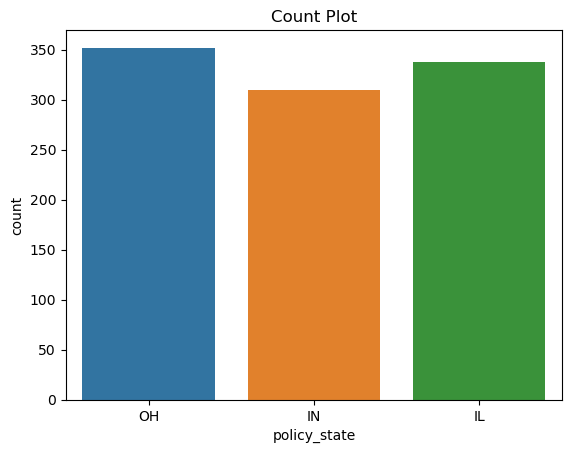

In [24]:
#checking count of values present in  'policy_state' feature
sb.countplot(data=df,x='policy_state')
plt.title('Count Plot')
plt.show()

**'OH'** policy state is **little bit high** than **'IL'** policity state.

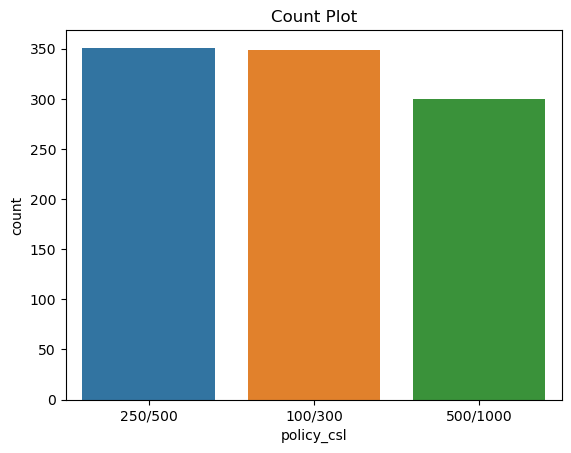

In [25]:
#checking count of values present in  'policy_csl' feature
sb.countplot(data=df,x='policy_csl')
plt.title('Count Plot')
plt.show()

**'250/500' and '100/300'** policy csl are almost same.

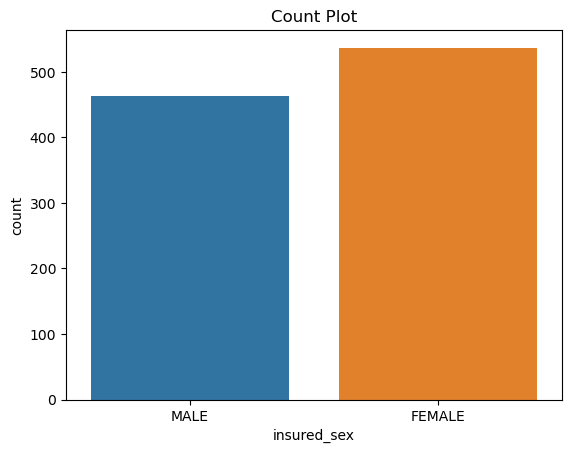

In [26]:
#checking count of values present in  'insured_sex' feature
sb.countplot(data=df,x='insured_sex')
plt.title('Count Plot')
plt.show()

**Majority** of the customers are **'FEMALE'**.

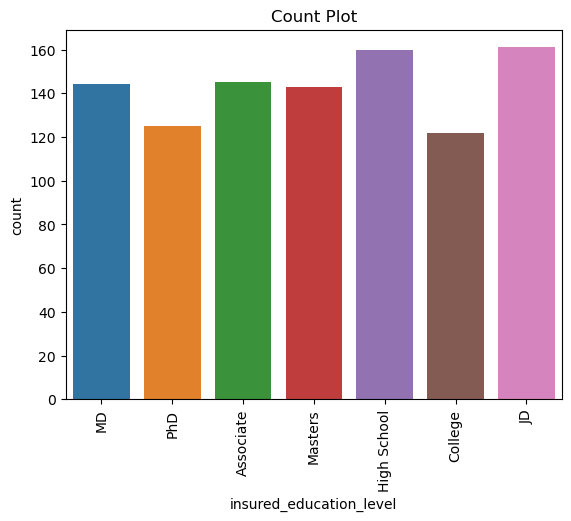

In [27]:
#checking count of values present in  'insured_education_level' feature
sb.countplot(data=df,x='insured_education_level')
plt.title('Count Plot')
plt.xticks(rotation=90)
plt.show()

**Most** of the customers have **'High School' and 'JD'** education level.

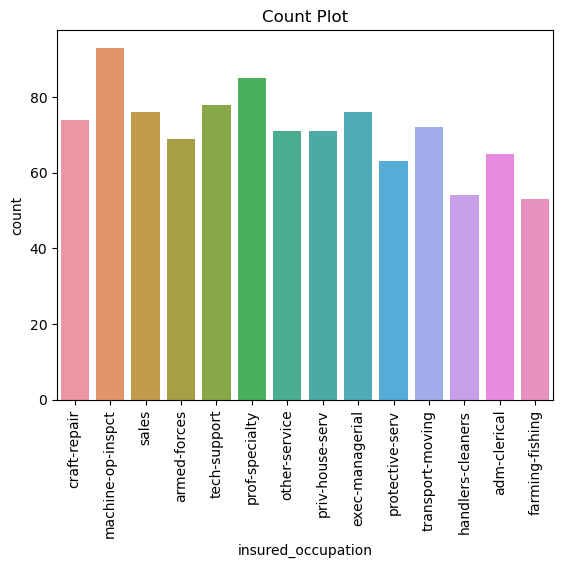

In [28]:
#checking count of values present in  'insured_occupation' feature
sb.countplot(data=df,x='insured_occupation')
plt.title('Count Plot')
plt.xticks(rotation=90)
plt.show()

**Most** of the customers have **'machine-op-inspct'** occupation.

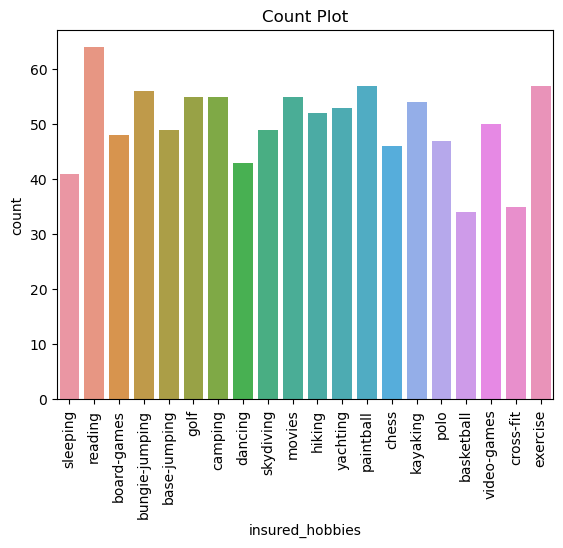

In [29]:
#checking count of values present in  'insured_hobbies' feature
sb.countplot(data=df,x='insured_hobbies')
plt.title('Count Plot')
plt.xticks(rotation=90)
plt.show()

**Most** of the customers have **'reading'** hobby.

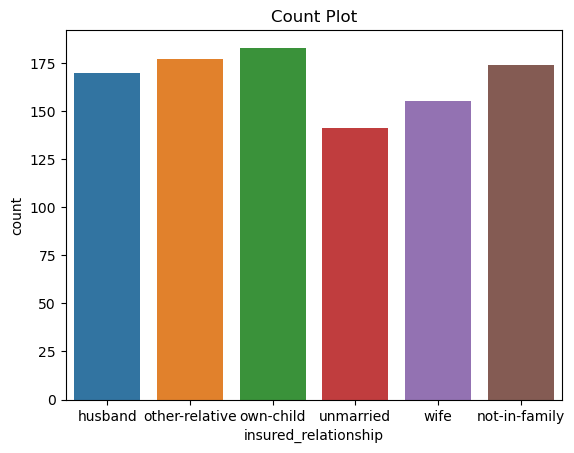

In [30]:
#checking count of values present in  'insured_relationship' feature
sb.countplot(data=df,x='insured_relationship')
plt.title('Count Plot')
plt.show()

**Most** of the customers have **'own-child'** relationship.

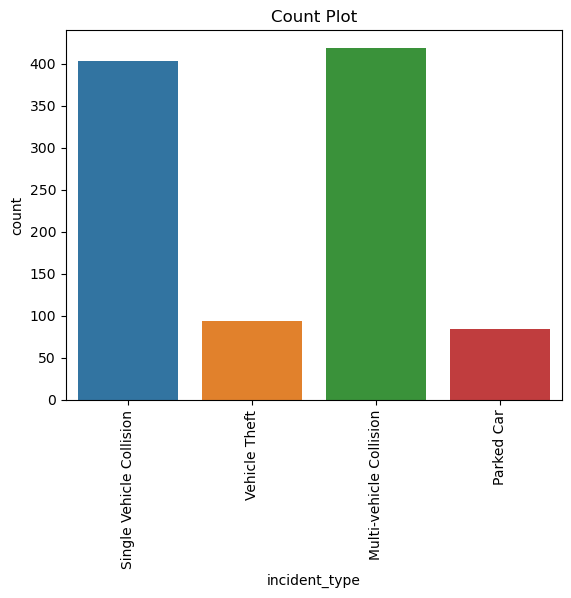

In [31]:
#checking count of values present in  'incident_type' feature
sb.countplot(data=df,x='incident_type')
plt.title('Count Plot')
plt.xticks(rotation=90)
plt.show()

**Most** of the customers had **'Multi-vehicle Collision'** incident type.

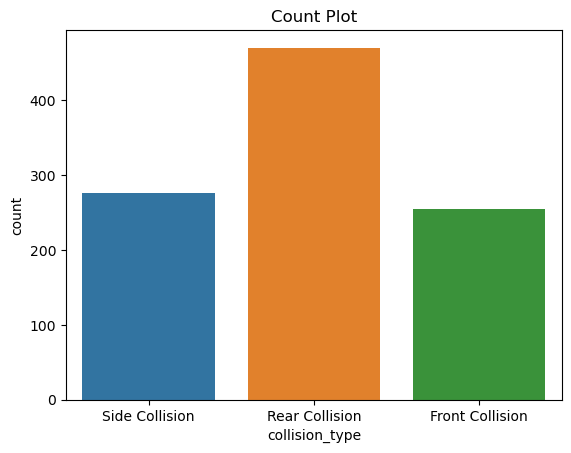

In [32]:
#checking count of values present in  'collision_type' feature
sb.countplot(data=df,x='collision_type')
plt.title('Count Plot')
plt.show()

**Most** of the customers had **'Rear Collision'** collision type.

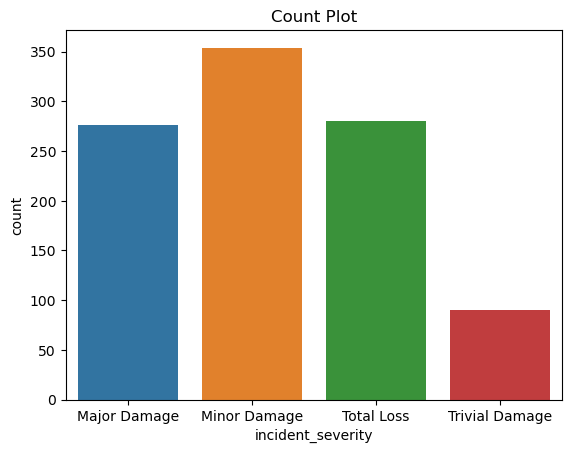

In [33]:
#checking count of values present in  'incident_severity' feature
sb.countplot(data=df,x='incident_severity')
plt.title('Count Plot')
plt.show()

**Most** of the customers had **'Minor Damage'** incident severity.

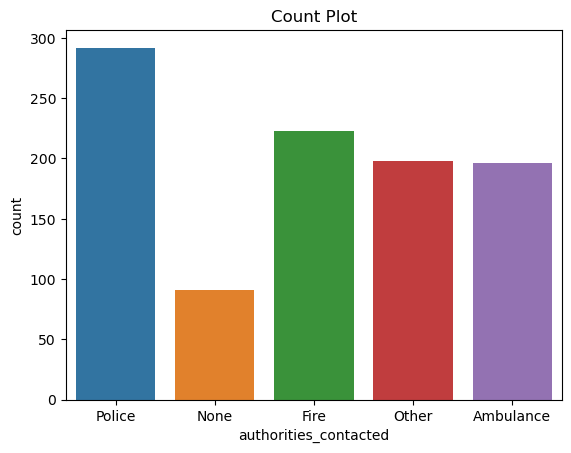

In [34]:
#checking count of values present in  'authorities_contacted' feature
sb.countplot(data=df,x='authorities_contacted')
plt.title('Count Plot')
plt.show()

**In most** of the case, **'Police'**  was contacted.

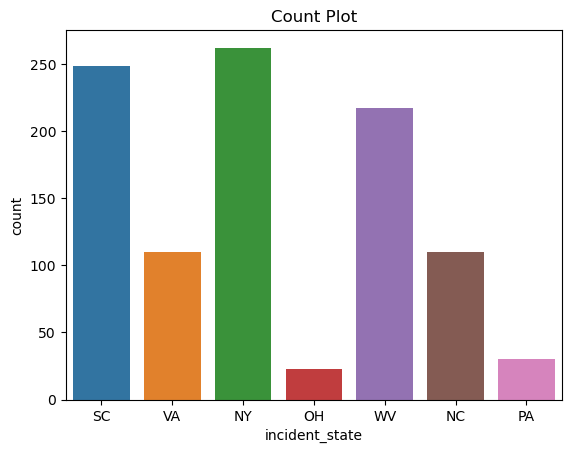

In [35]:
#checking count of values present in  'incident_state' feature
sb.countplot(data=df,x='incident_state')
plt.title('Count Plot')
plt.show()

**Most** of the customers have **'NY'** incident state.

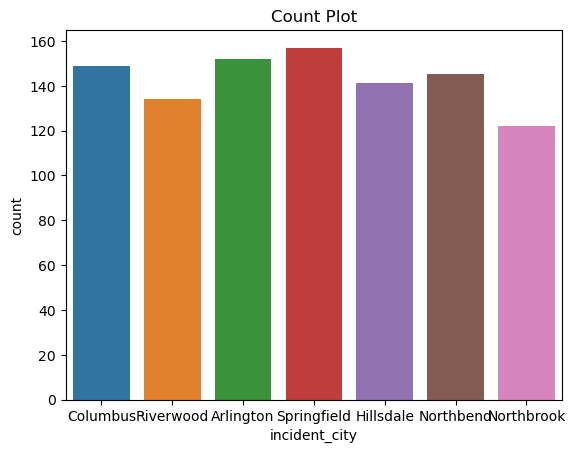

In [36]:
#checking count of values present in  'incident_city' feature
sb.countplot(data=df,x='incident_city')
plt.title('Count Plot')
plt.show()

**Most** of the incidents accident happened in **'Springfield'** city.

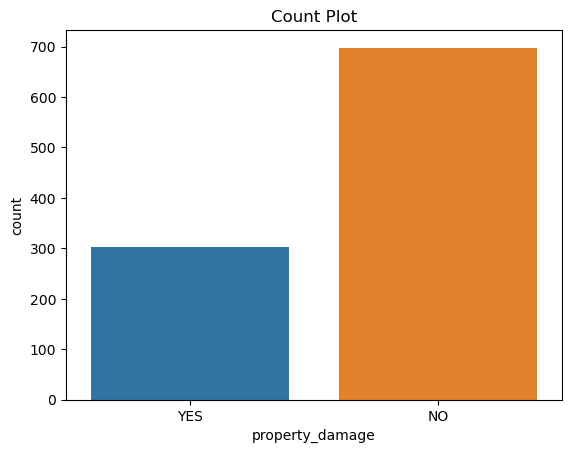

In [37]:
#checking count of values present in  'property_damage' feature
sb.countplot(data=df,x='property_damage')
plt.title('Count Plot')
plt.show()

**Most** of the customers **did not suffered** from  **property damage.**

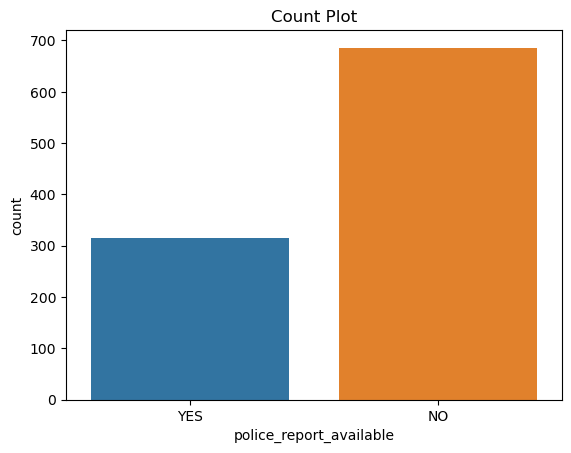

In [38]:
#checking count of values present in  'police_report_available' feature
sb.countplot(data=df,x='police_report_available')
plt.title('Count Plot')
plt.show()

**Mostly**, there were **no police reports.**

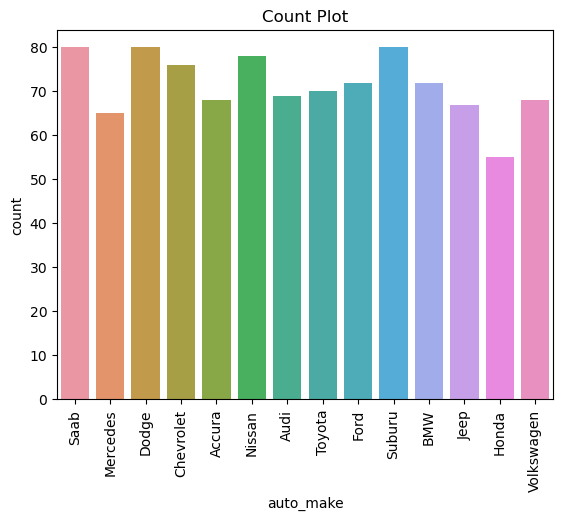

In [39]:
#checking count of values present in  'auto_make' feature
sb.countplot(data=df,x='auto_make')
plt.title('Count Plot')
plt.xticks(rotation=90)
plt.show()

**Most** of the **vehicles were** of **'Saab', 'Dodge' and 'Suburu'**.

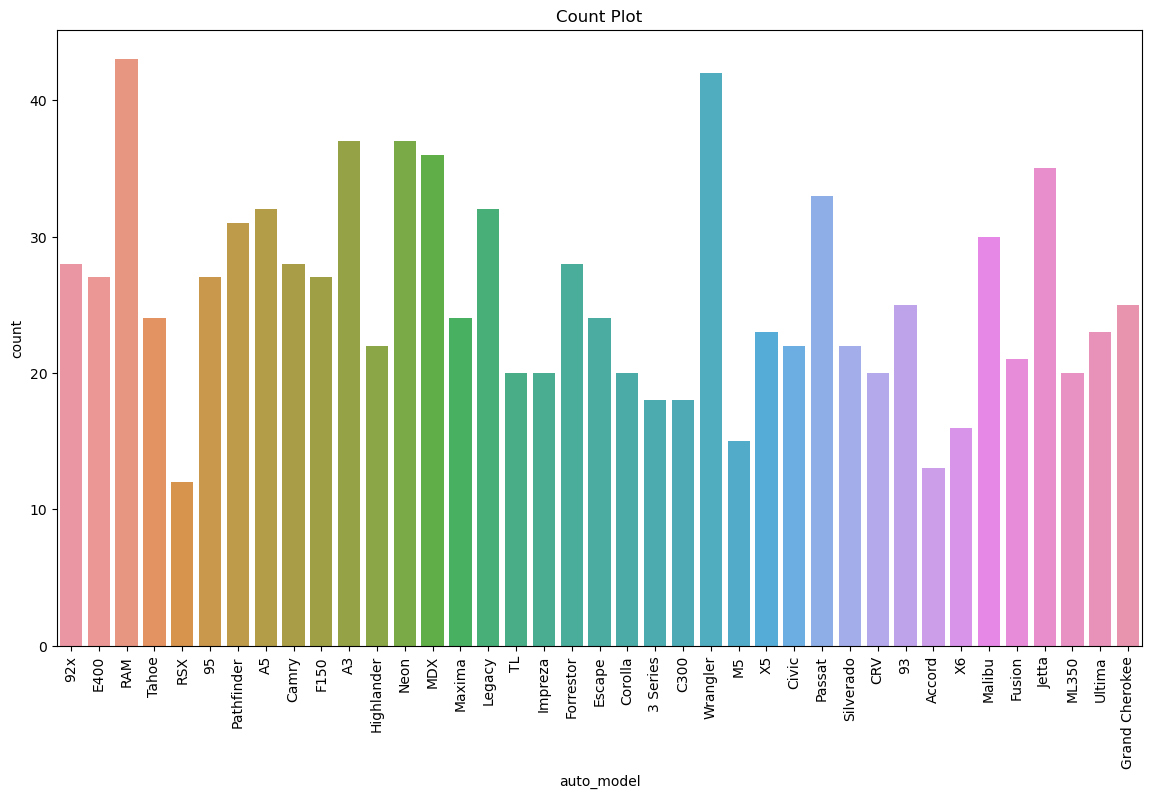

In [40]:
#checking count of values present in  'auto_model' feature
plt.figure(figsize=(14,8))
sb.countplot(data=df,x='auto_model')
plt.title('Count Plot')
plt.xticks(rotation=90)
plt.show()

**Most** of the vehicles models were **'RAM' and 'Wrangler'**.

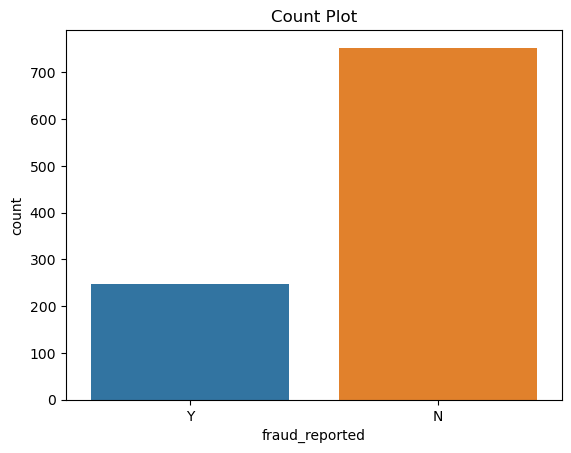

In [41]:
#checking count of values present in  'fraud_reported' target variable
sb.countplot(data=df,x='fraud_reported')
plt.title('Count Plot')
plt.show()

**Most** of the times, there was **no fraud report.**

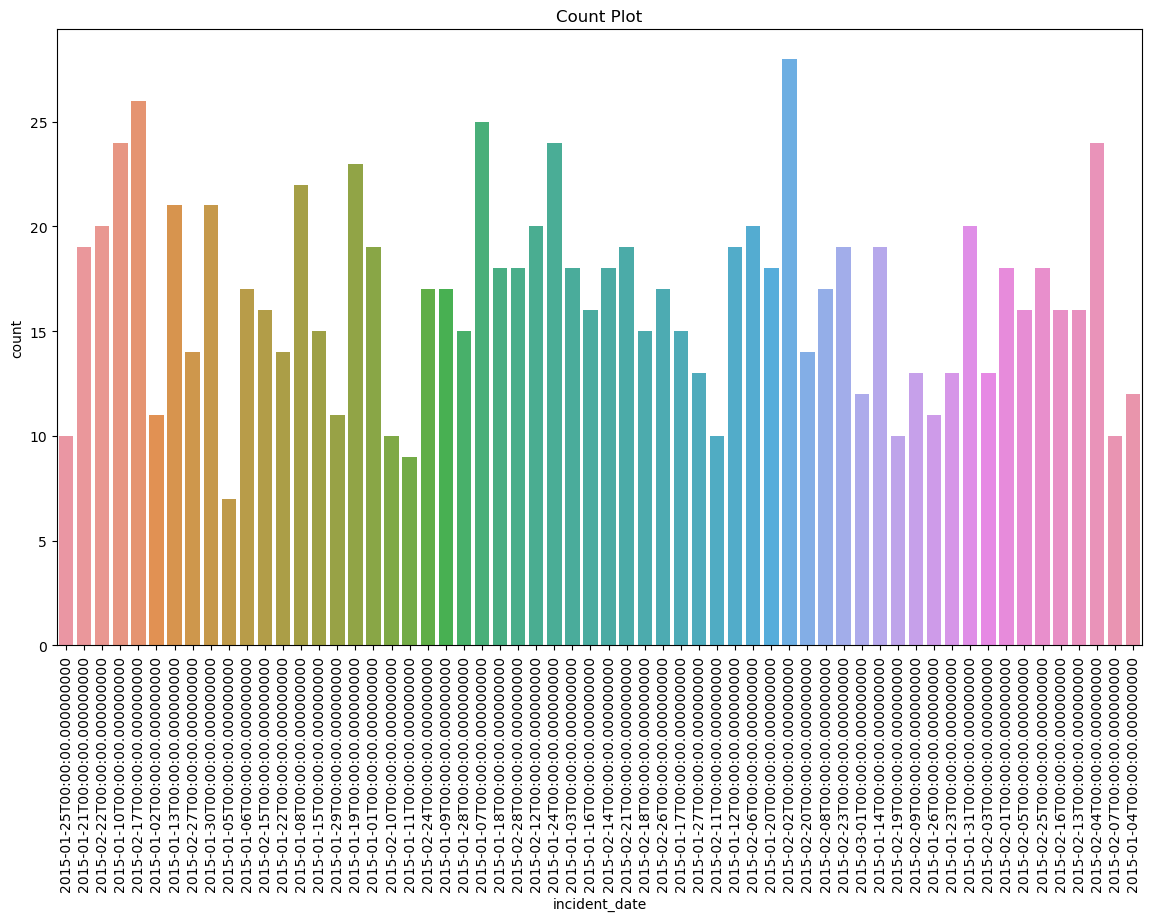

In [42]:
#checking count of values present in  'incident_date' feature
plt.figure(figsize=(14,8))
sb.countplot(data=df,x='incident_date')
plt.title('Count Plot')
plt.xticks(rotation=90)
plt.show()

Most occuring incident date is **'2015-02-20'**

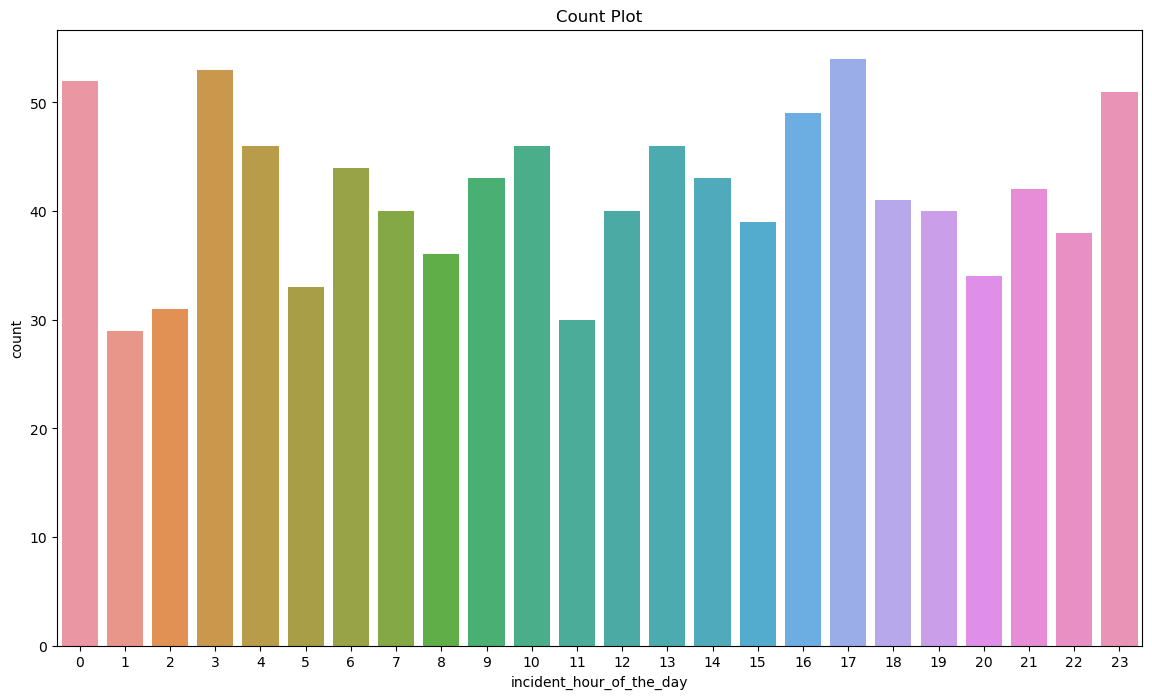

In [43]:
#checking count of values present in  'incident_hour_of_the_day' feature
plt.figure(figsize=(14,8))
sb.countplot(data=df,x='incident_hour_of_the_day')
plt.title('Count Plot')
plt.show()

Most occuring incident hour of the day  is **'17'**

In [44]:
log=[]#creating empty list which is stored in 'log' variable 

def re():#creating a function named 're'
    
    for i in num_c:#iterating through 'num_c' variable
        if i not in log:#using if condition to plot graphs
            sb.lmplot(data=df,x=log[-1],y=i)
            plt.title('Linear Model Plot')
    plt.show()

In [45]:
#checking contents of 'num_c' list
num_c

['months_as_customer',
 'age',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'capital-gains',
 'capital-loss',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year']

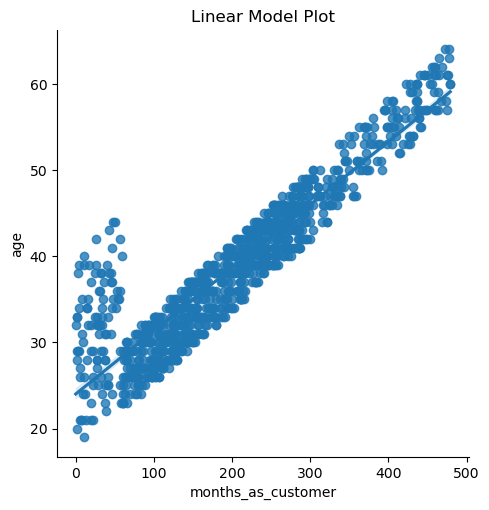

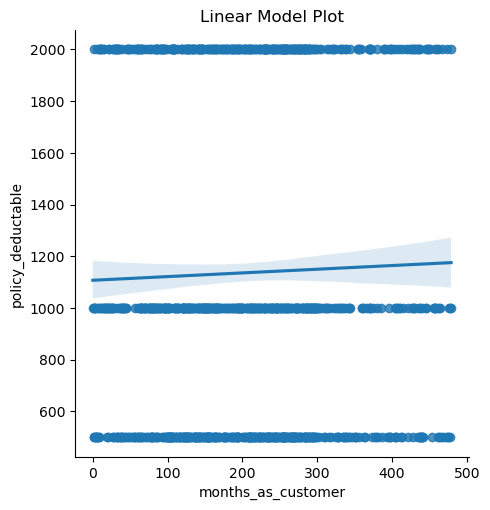

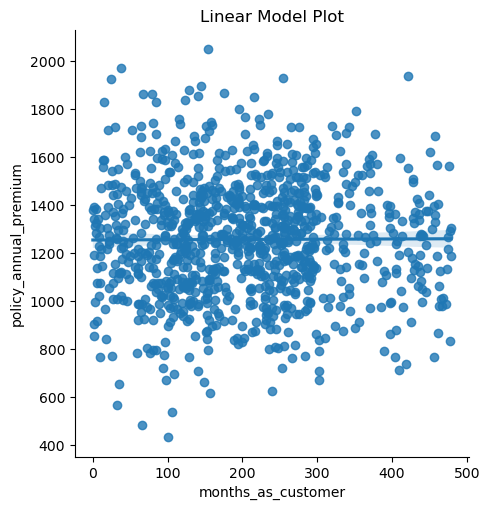

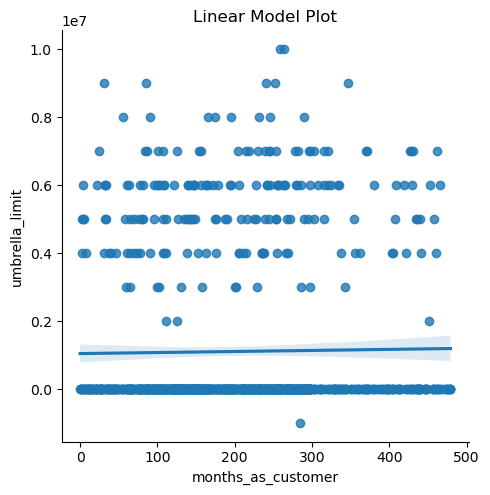

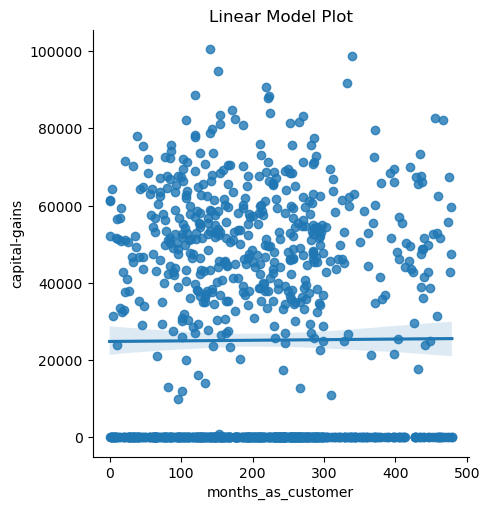

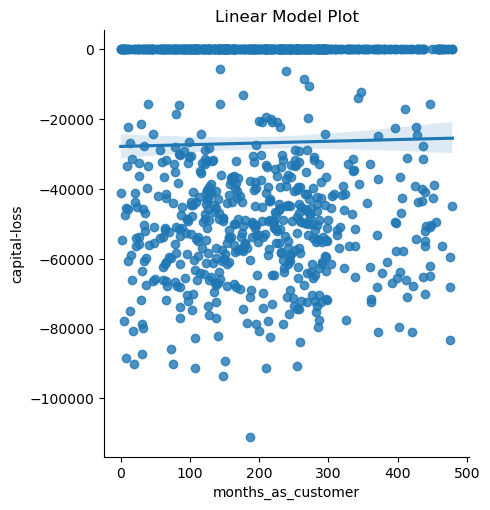

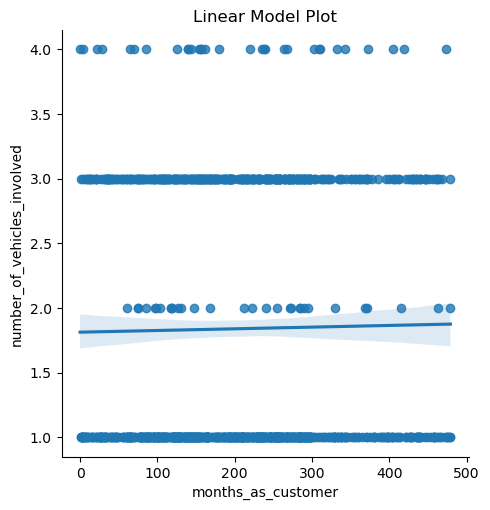

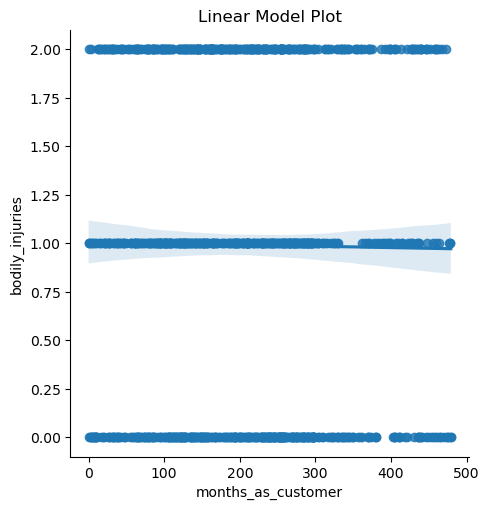

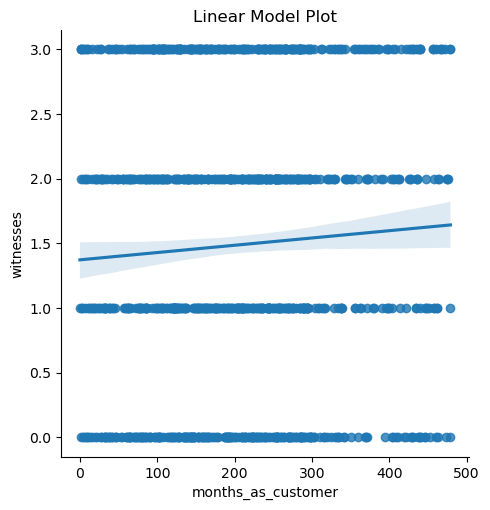

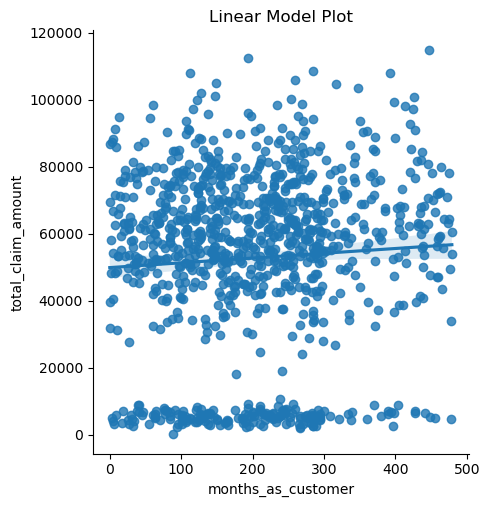

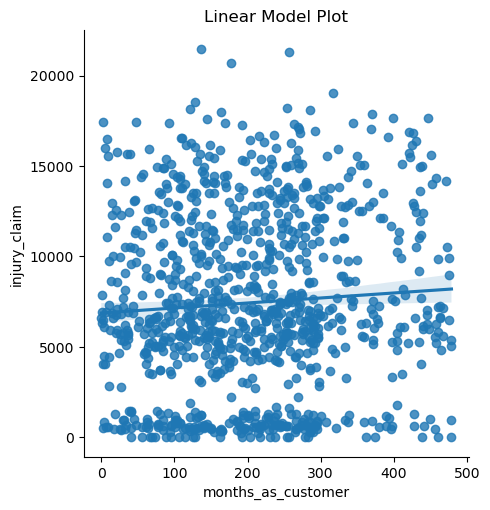

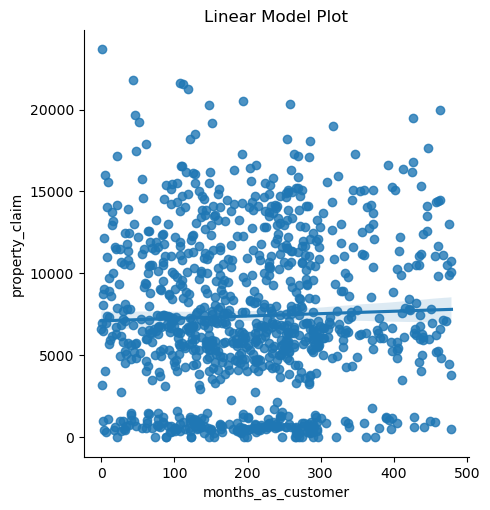

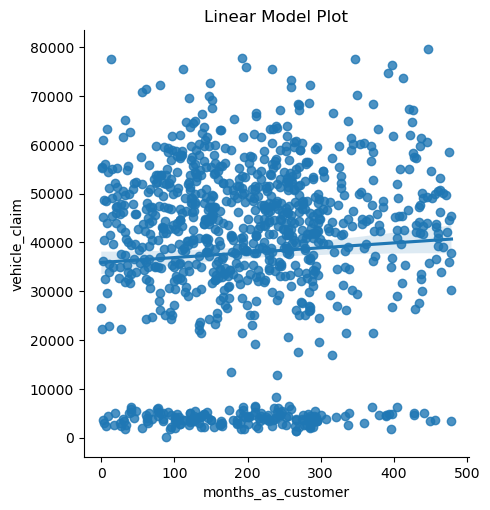

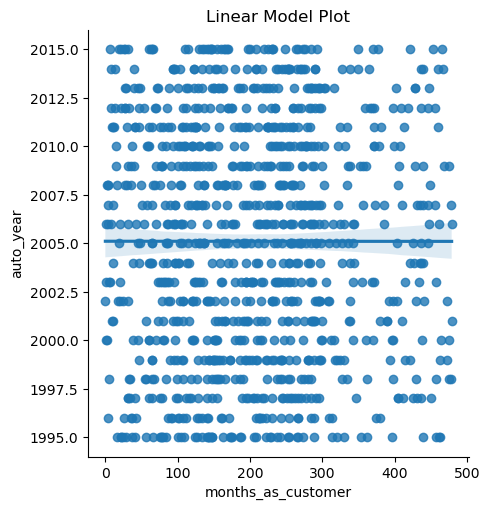

In [46]:
#checking linear relation of 'months_as_customer' feature with other features 
log.append('months_as_customer')#Appending feature
re()#calling function

**'months_as_customer'** feature has **high positive linear relation** with **'age'** feature.  
    
**'months_as_customer'** feature has **almost no linear relation** with other remaining features.

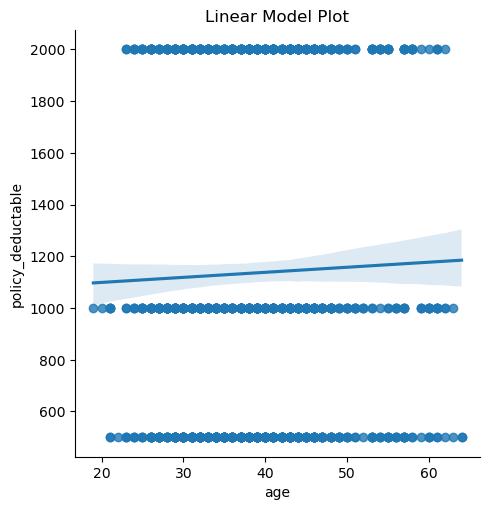

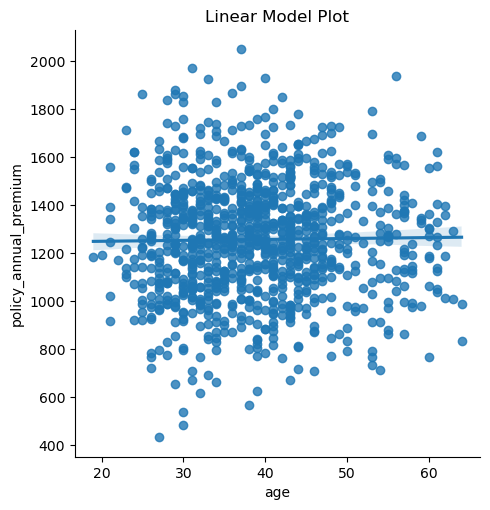

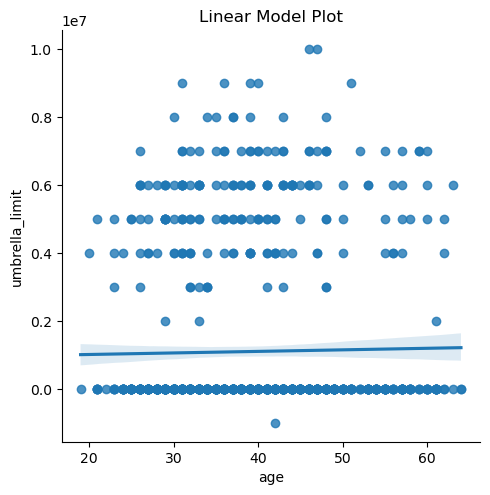

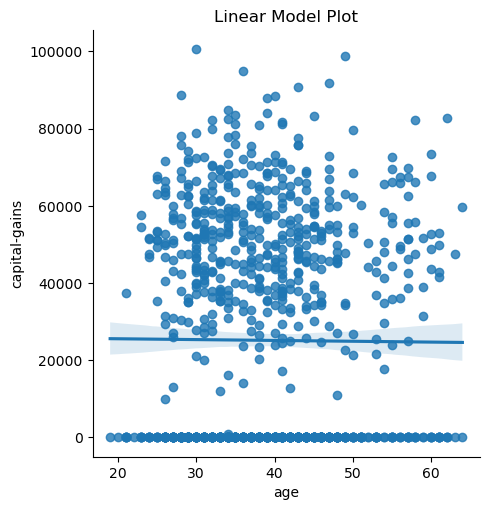

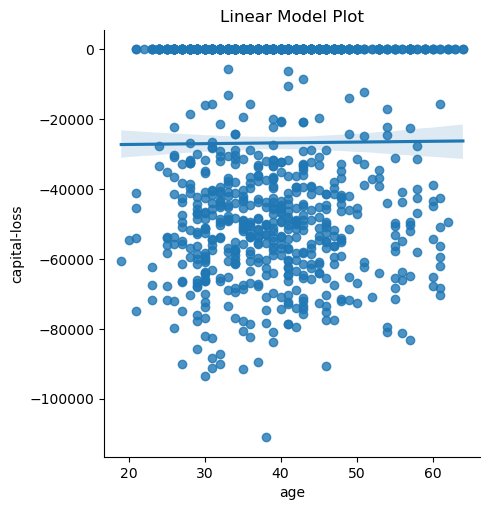

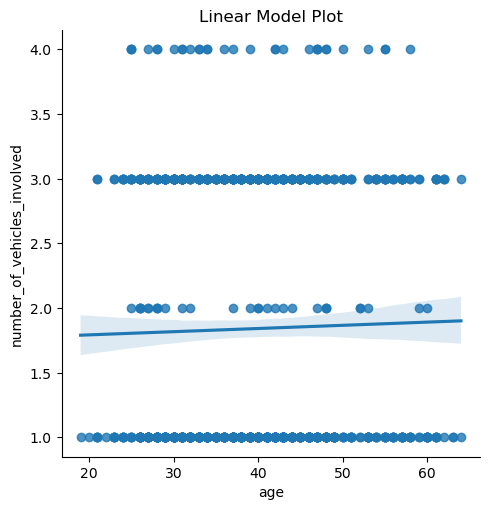

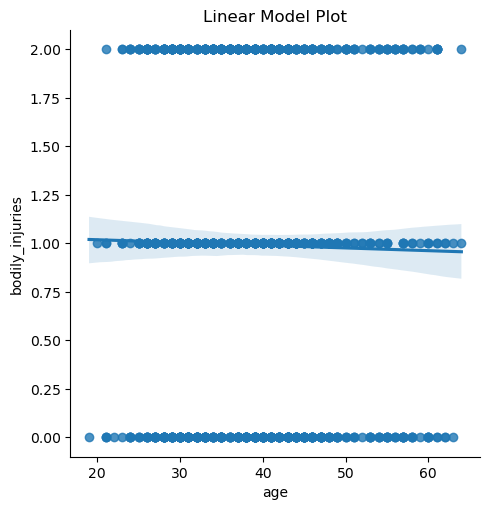

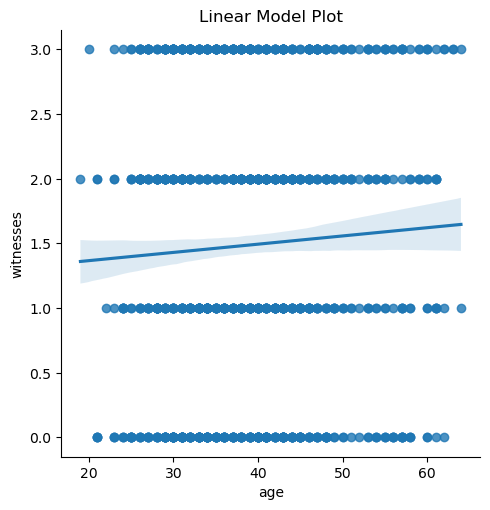

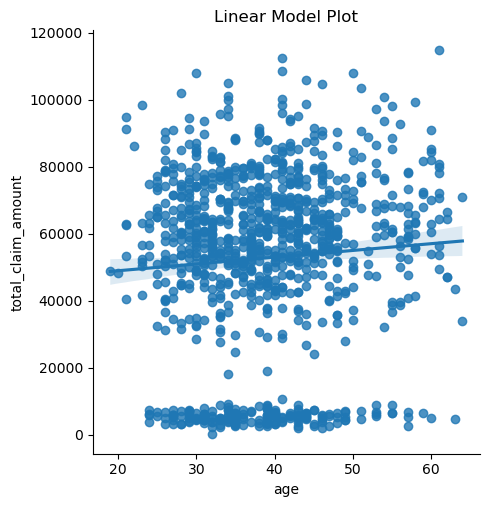

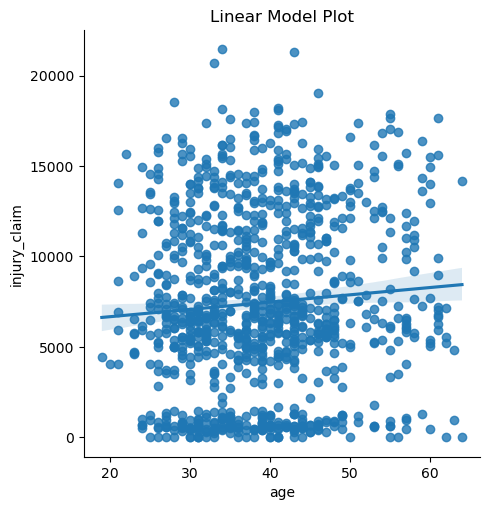

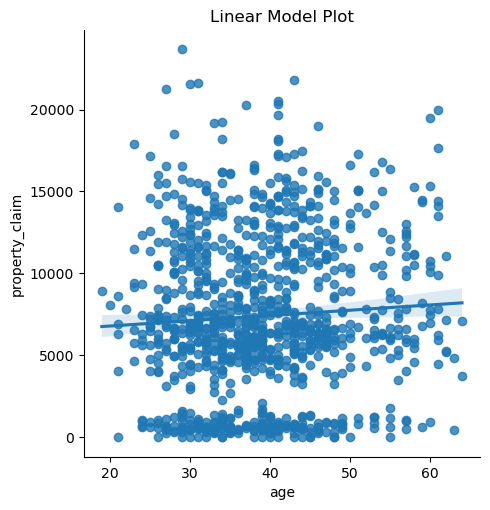

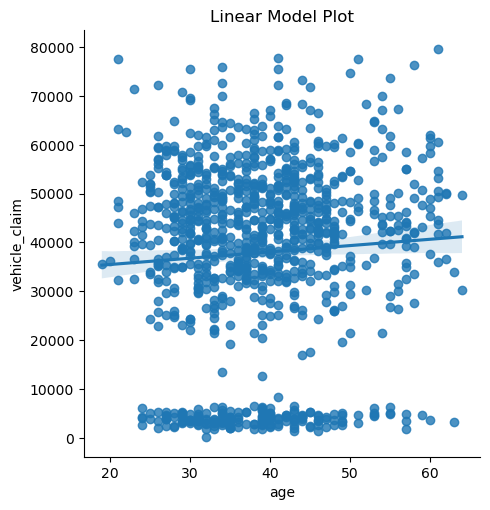

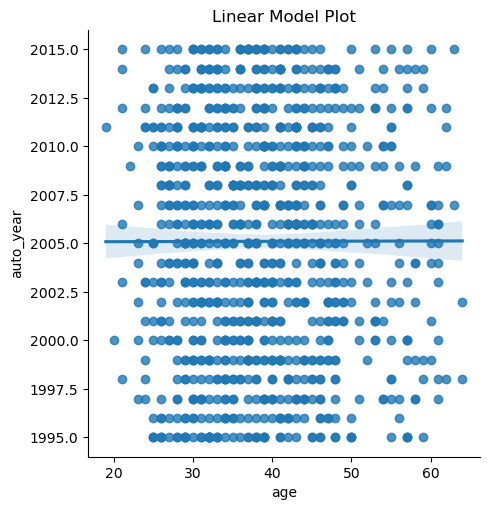

In [47]:
#checking linear relation of 'age' feature with other features 
log.append('age')#Appending feature
re()#calling function

**'age'** feature has **almost no linear relation** with other remaining features.

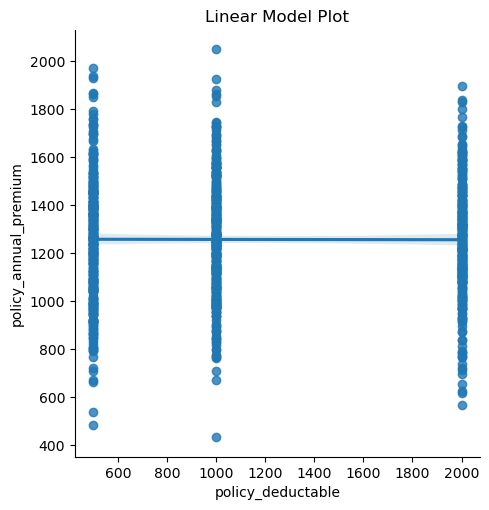

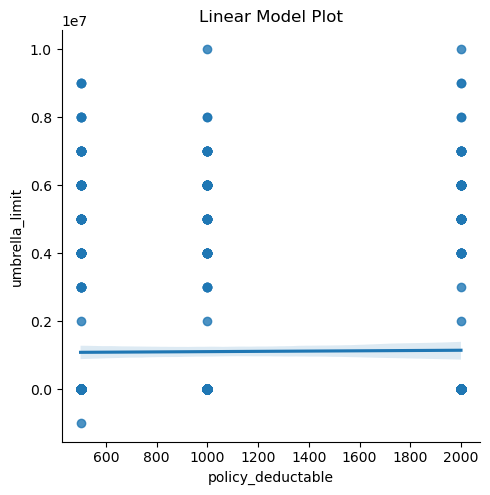

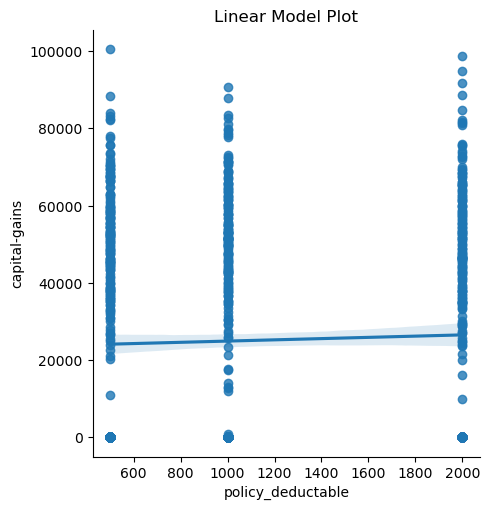

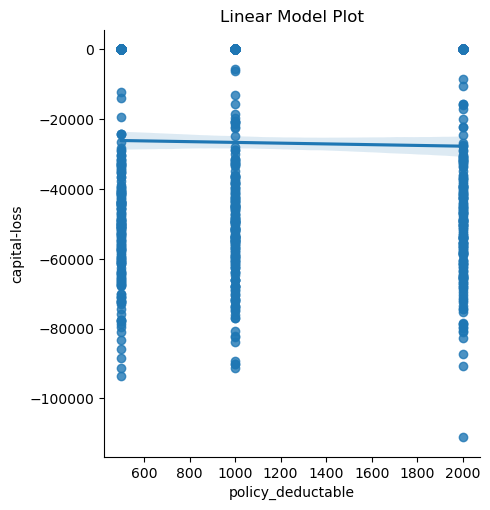

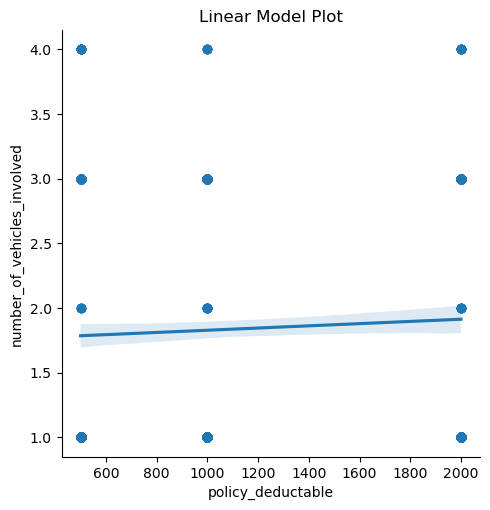

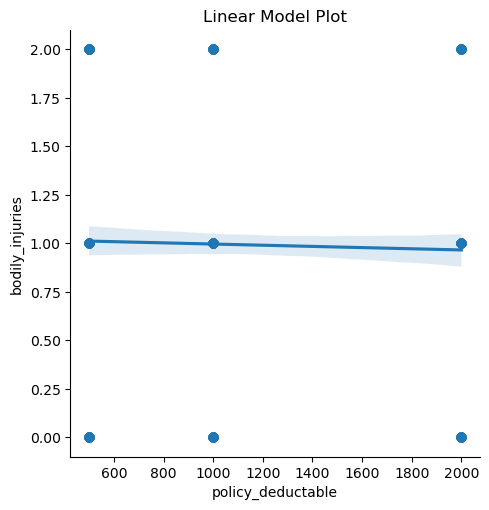

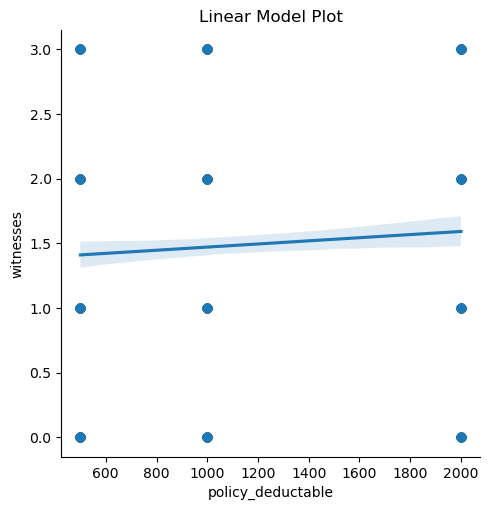

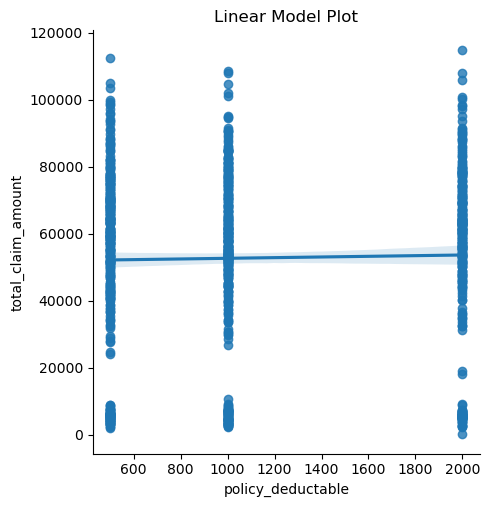

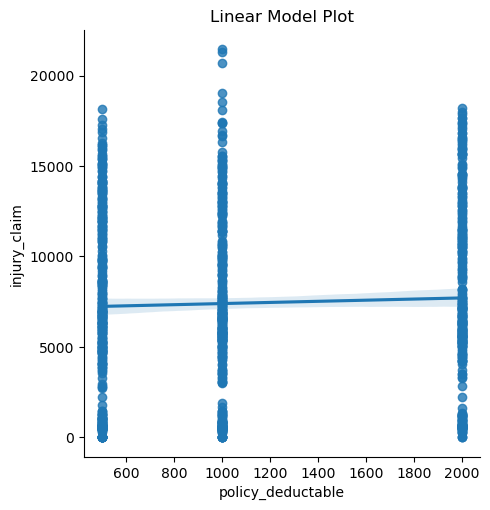

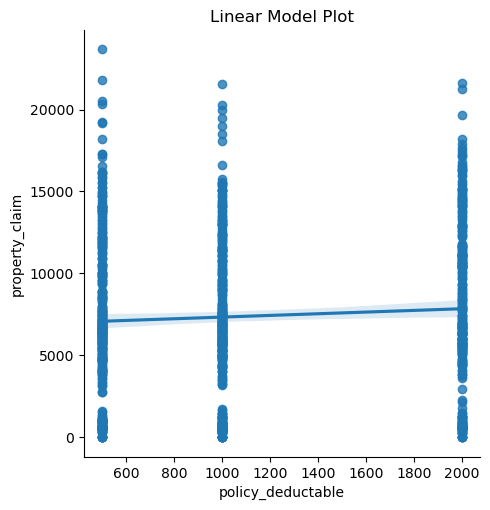

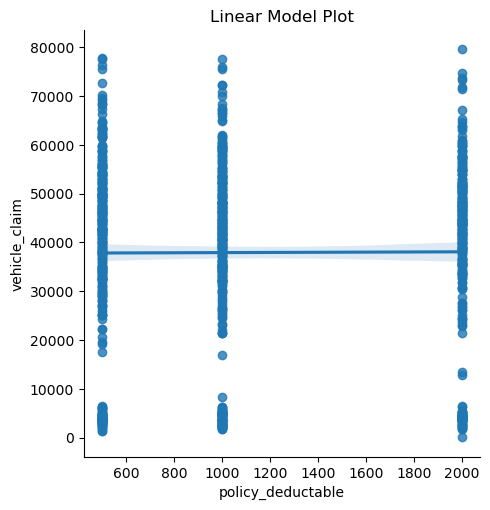

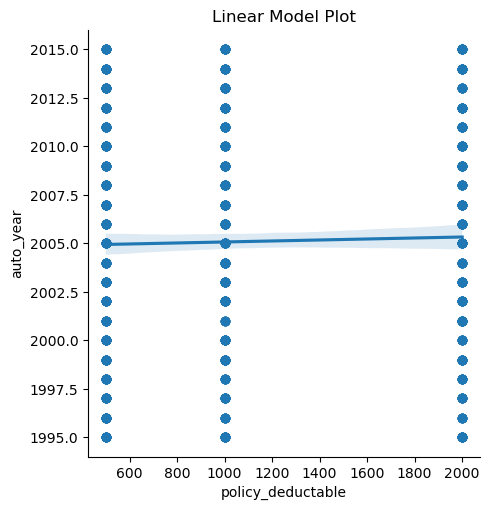

In [48]:
#checking linear relation of 'policy_deductable' feature with other features 
log.append('policy_deductable')#Appending feature
re()#calling function

**'policy_deductable'** feature has **almost no linear relation** with other remaining features.

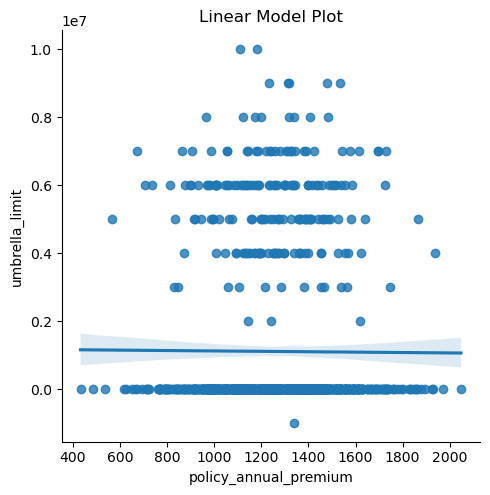

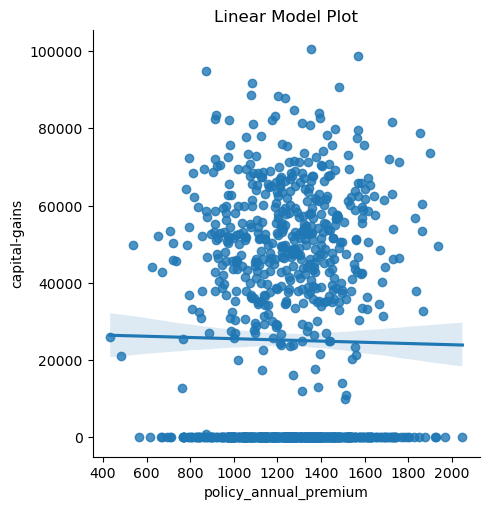

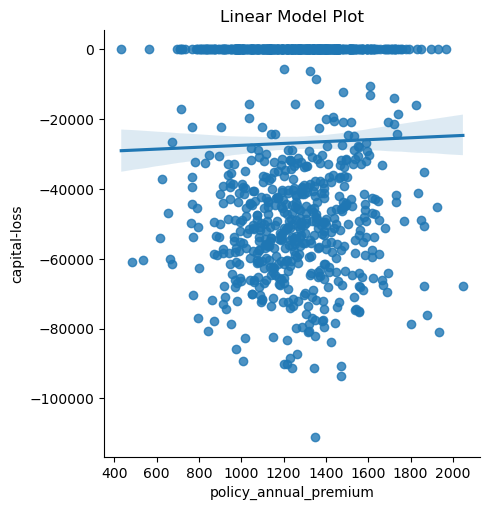

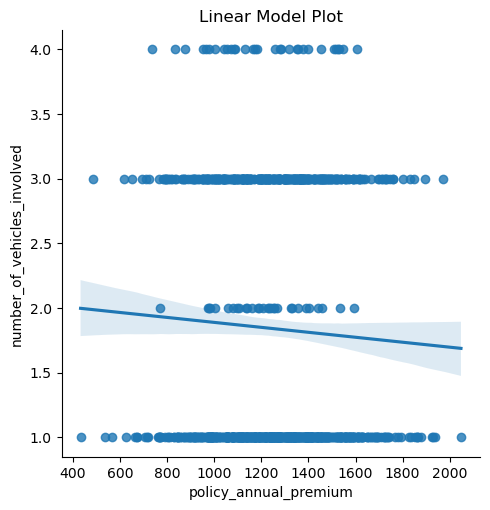

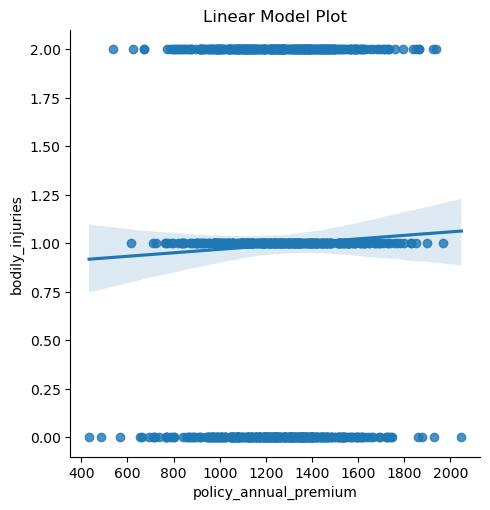

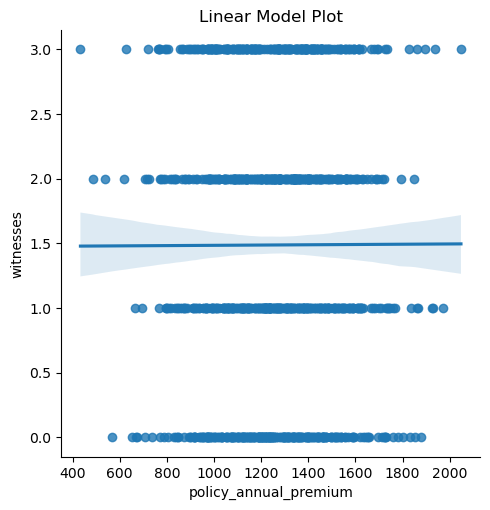

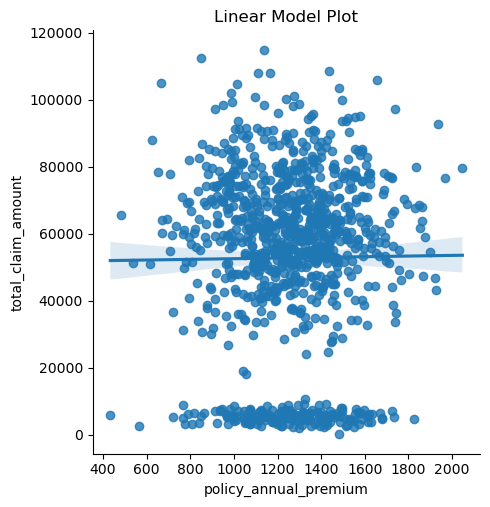

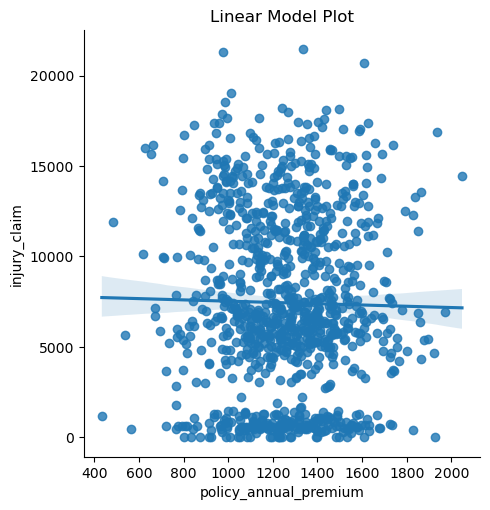

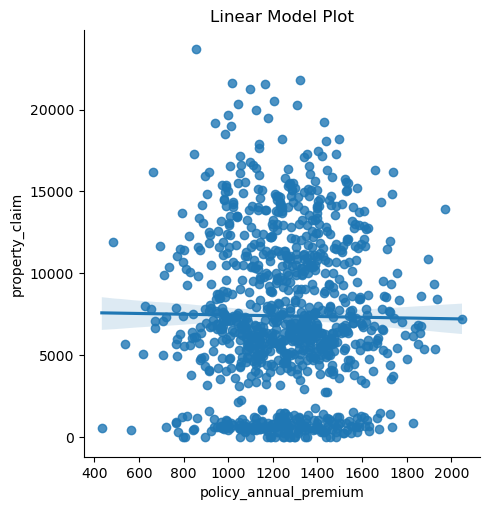

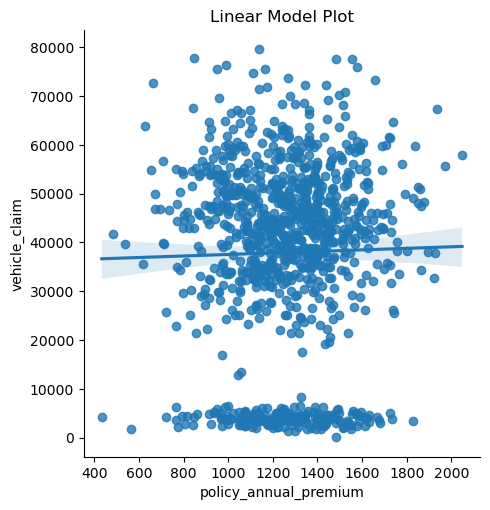

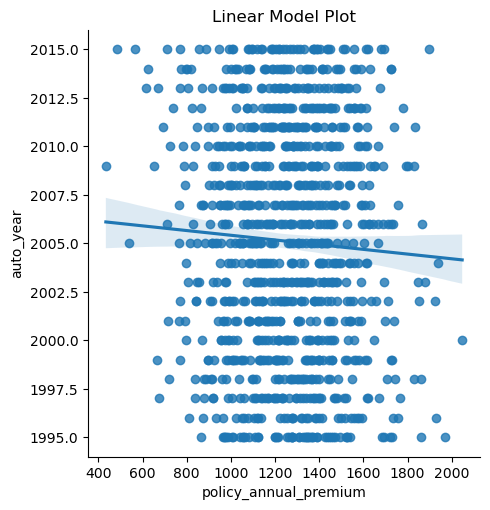

In [49]:
#checking linear relation of 'policy_annual_premium' feature with other features 
log.append('policy_annual_premium')#Appending feature
re()#calling function

**'policy_annual_premium'** feature has **almost no linear relation** with other remaining features.

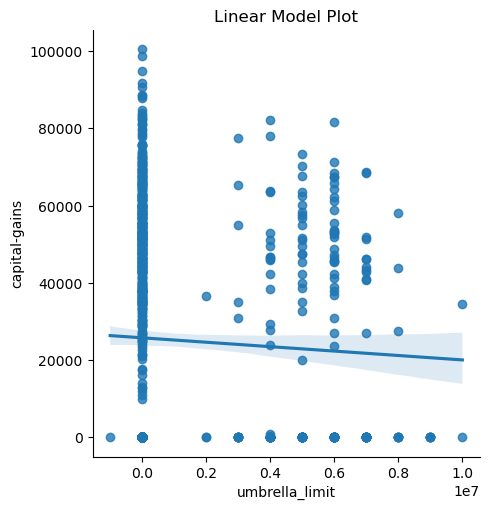

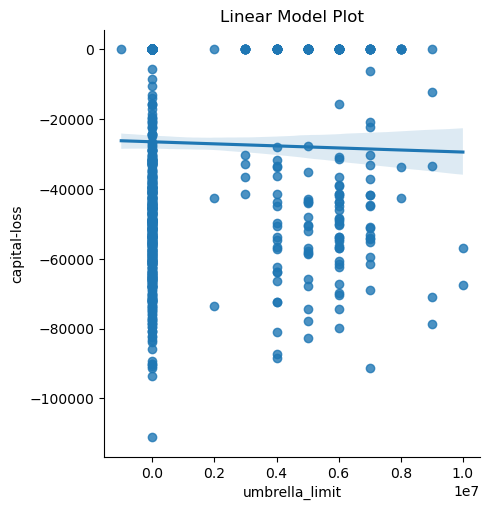

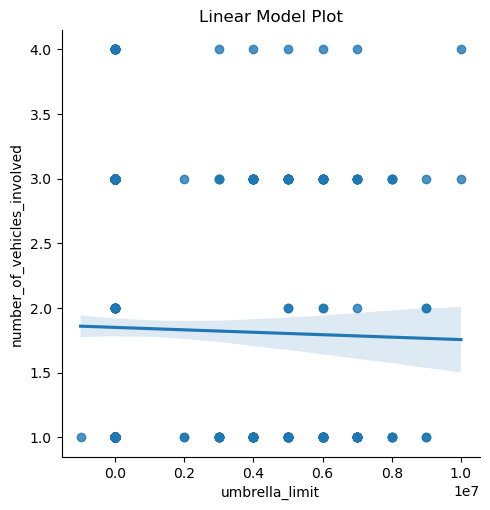

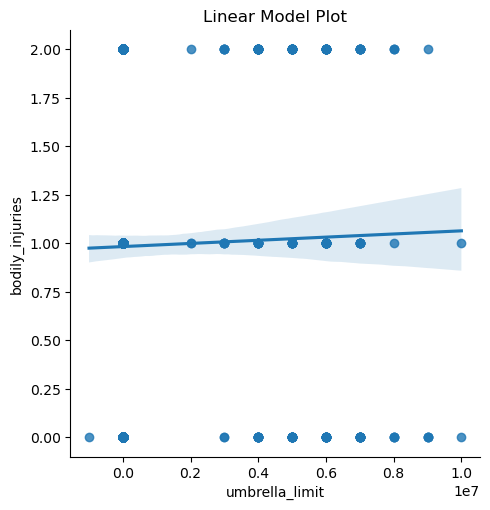

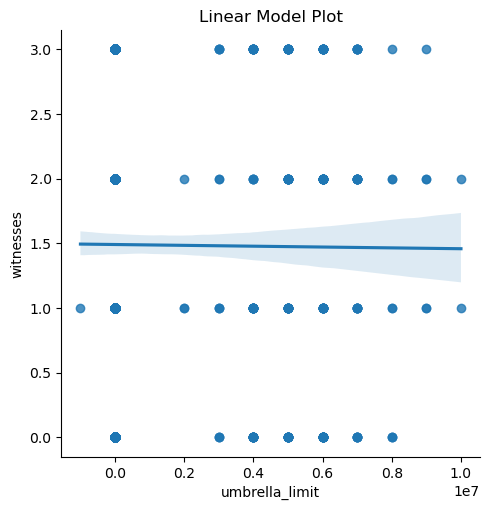

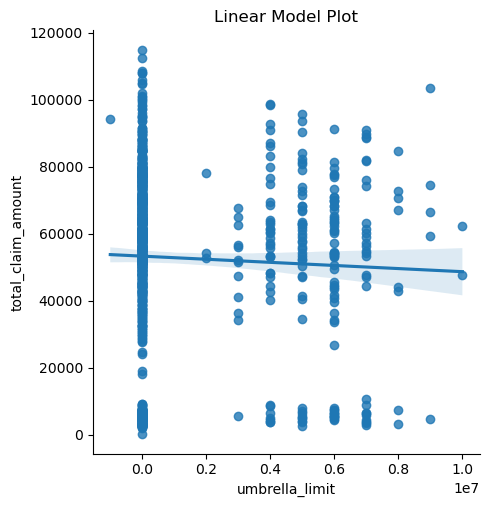

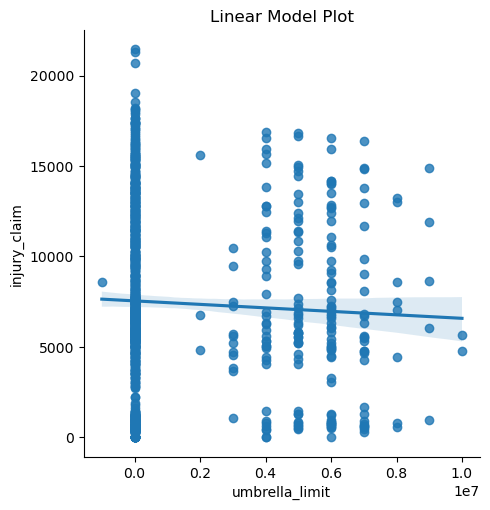

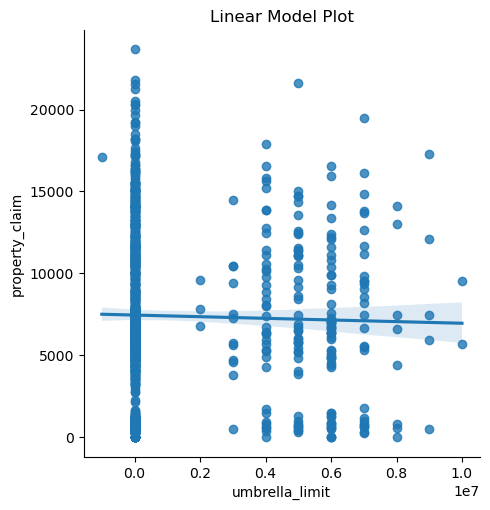

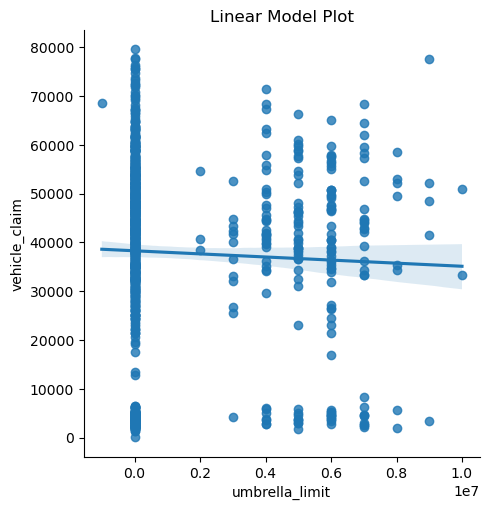

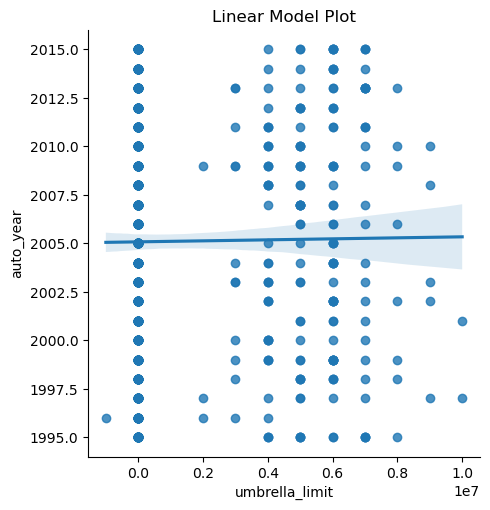

In [50]:
#checking linear relation of 'umbrella_limit' feature with other features 
log.append('umbrella_limit')#Appending feature
re()#calling function

**'umbrella_limit'** feature has **almost no linear relation** with other remaining features.

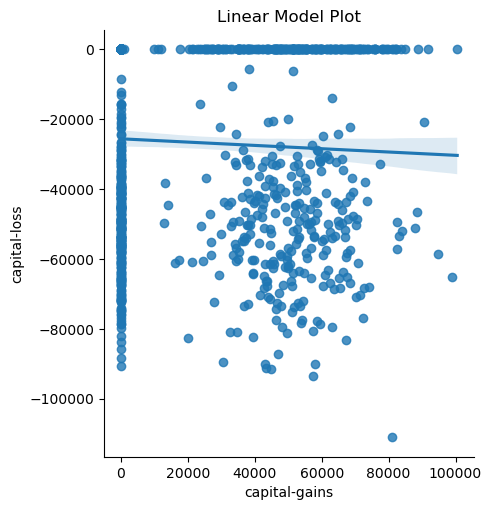

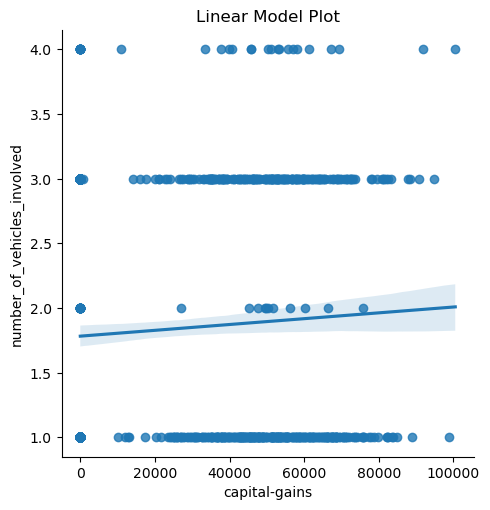

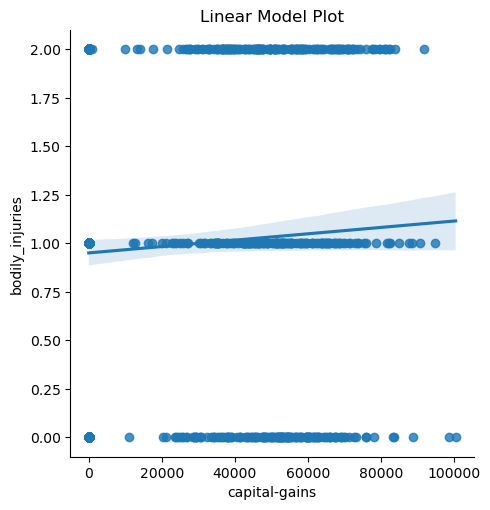

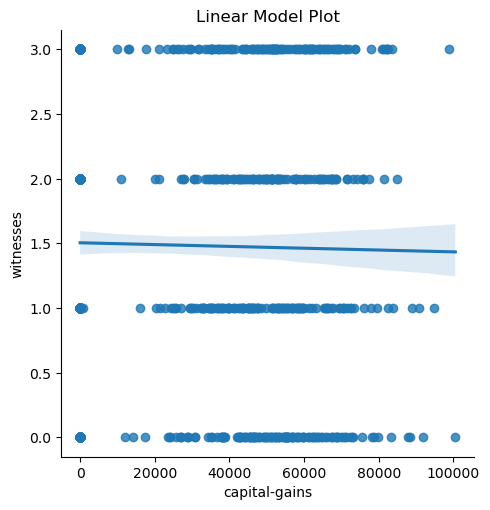

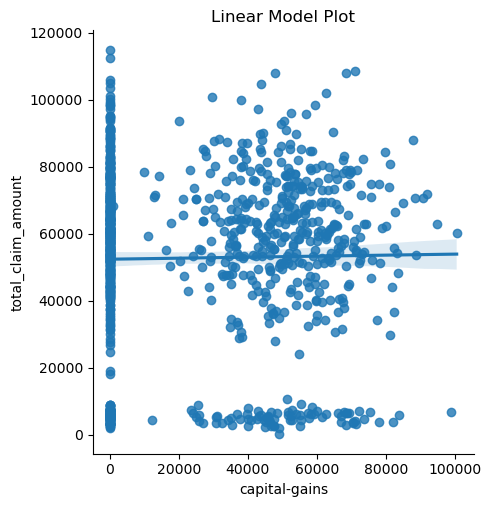

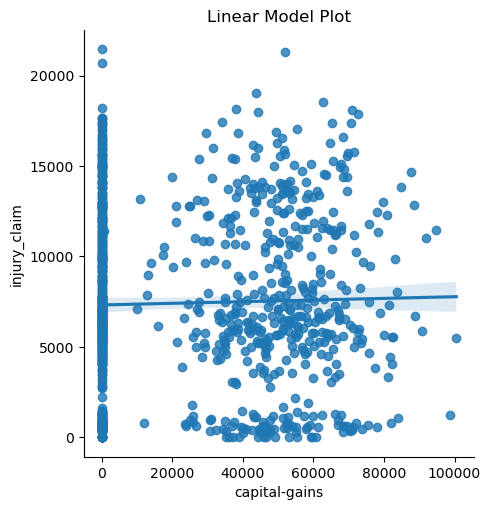

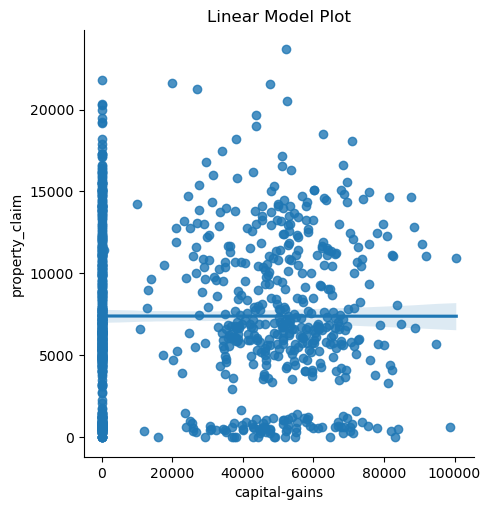

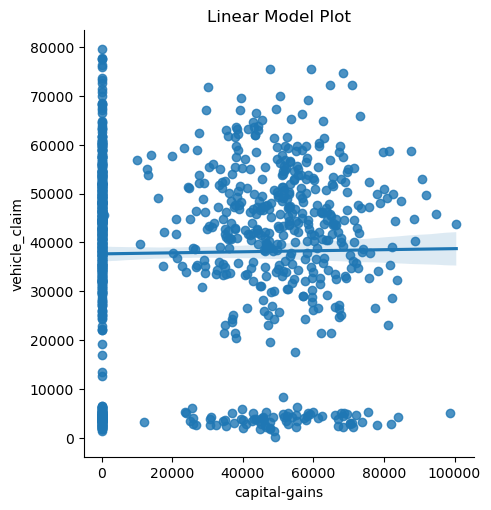

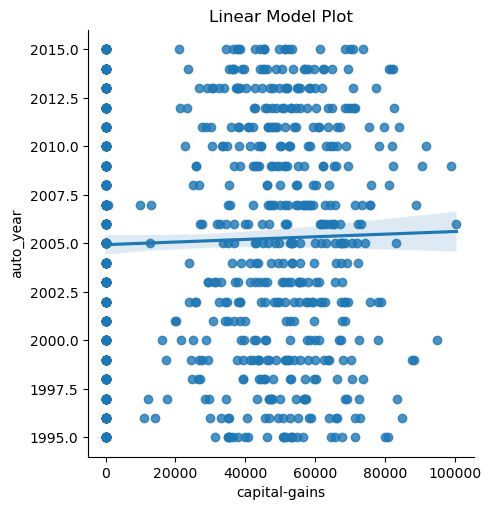

In [51]:
#checking linear relation of 'capital-gains' feature with other features 
log.append('capital-gains')#Appending feature
re()#calling function

**'capital-gains'** feature has **almost no linear relation** with other remaining features.

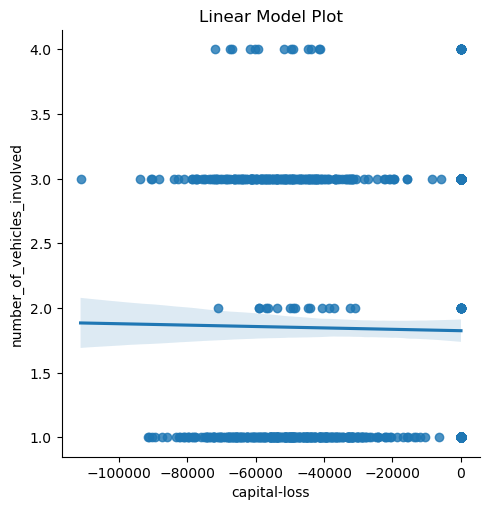

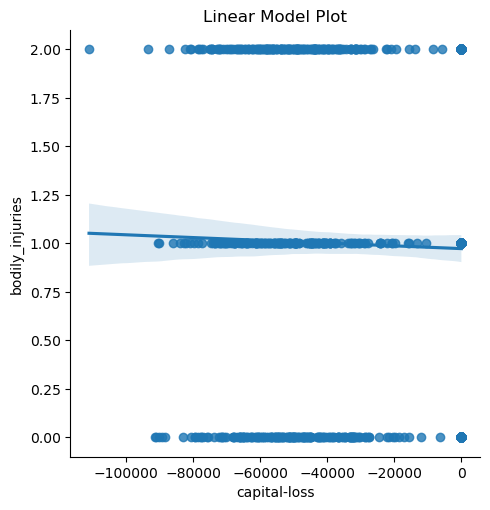

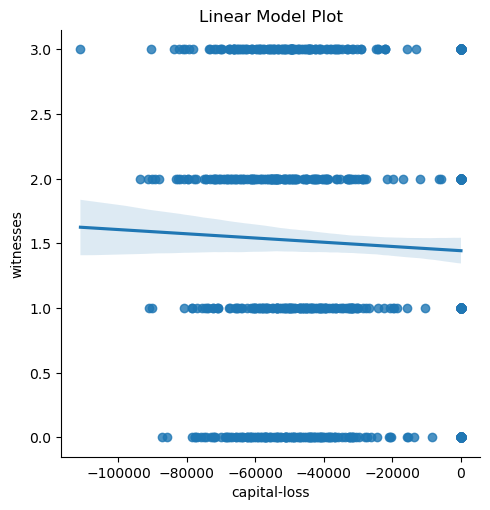

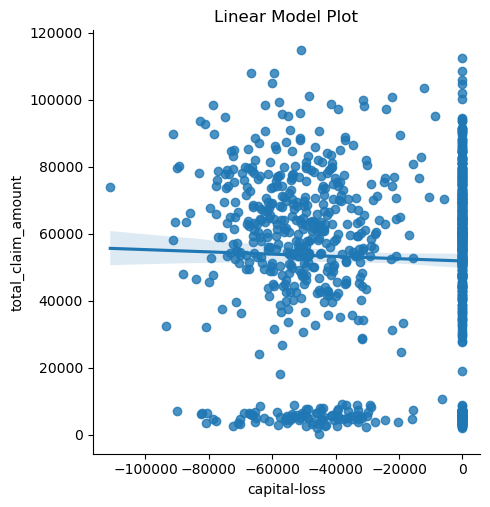

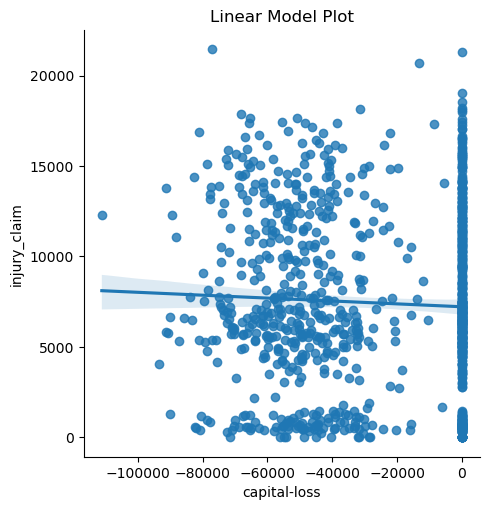

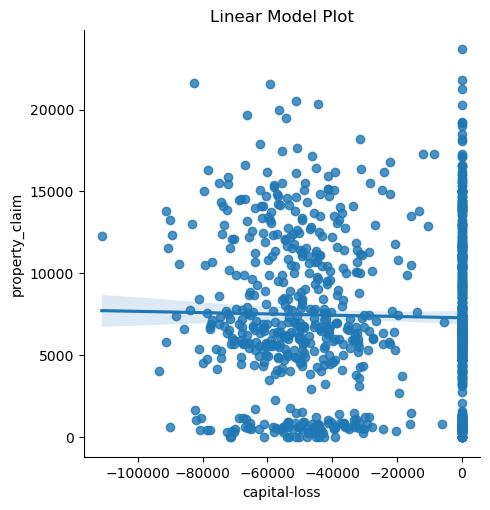

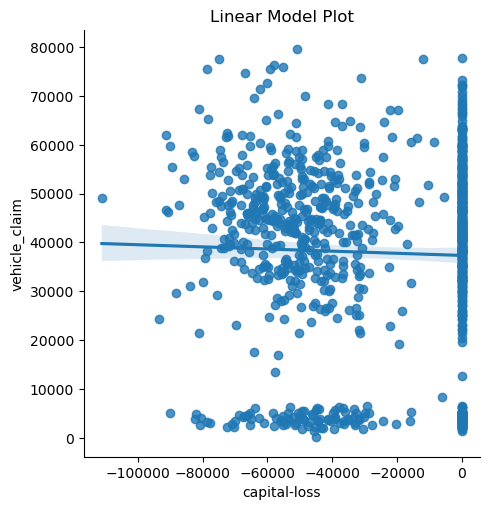

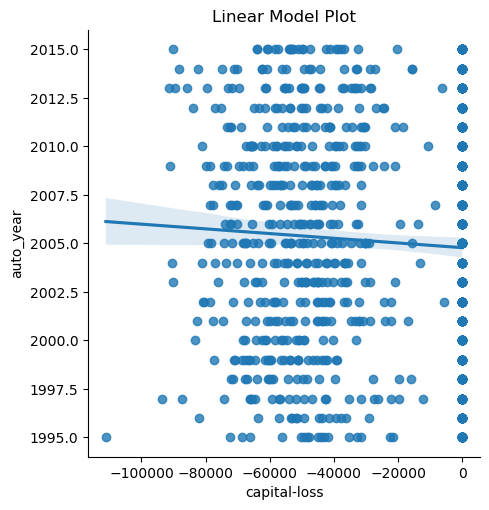

In [52]:
#checking linear relation of 'capital-loss' feature with other features 
log.append('capital-loss')#Appending feature
re()#calling function

**'capital-loss'** feature has **almost no linear relation** with other remaining features.

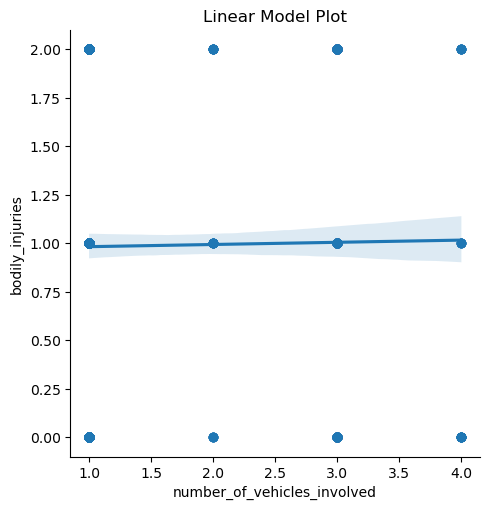

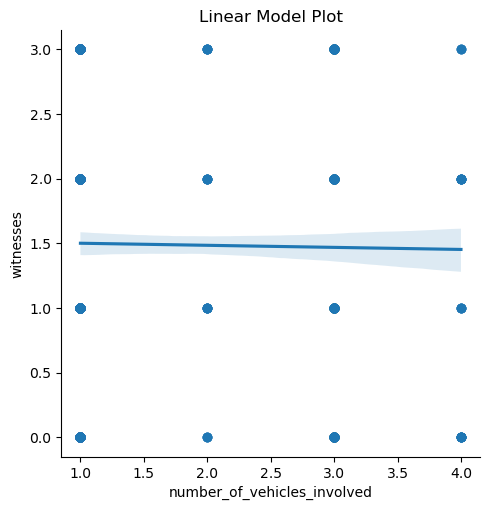

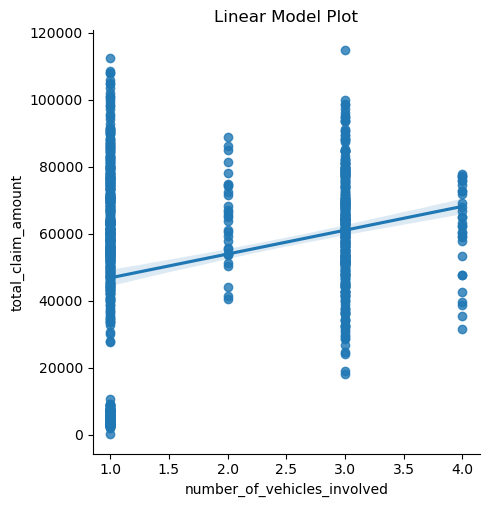

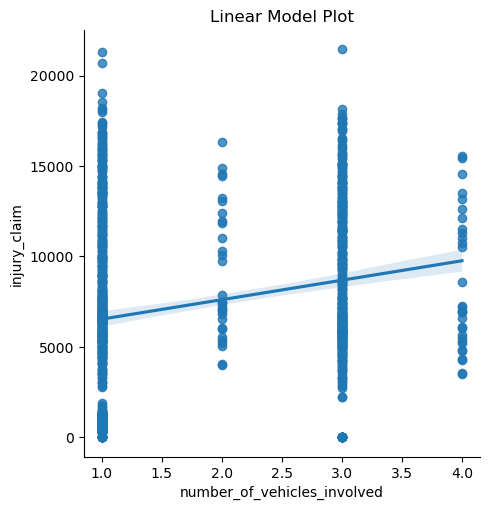

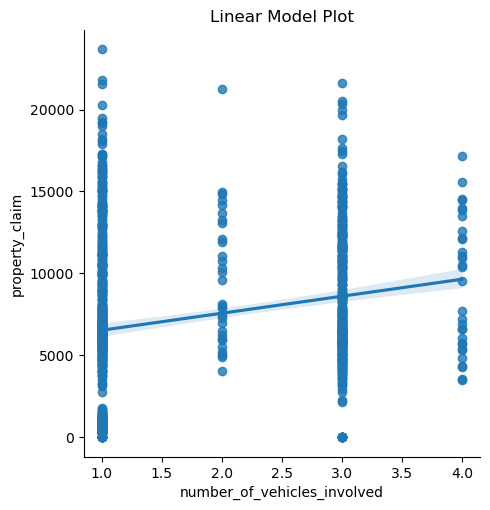

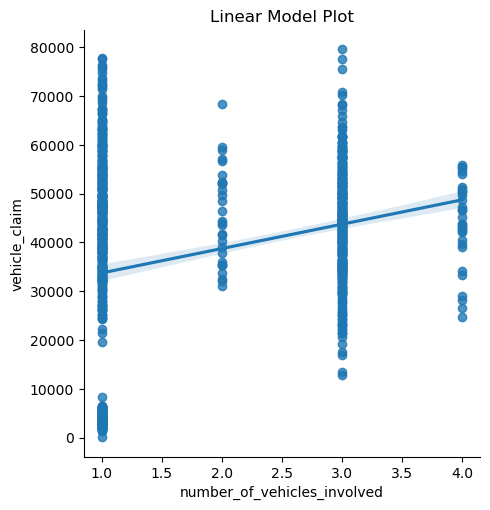

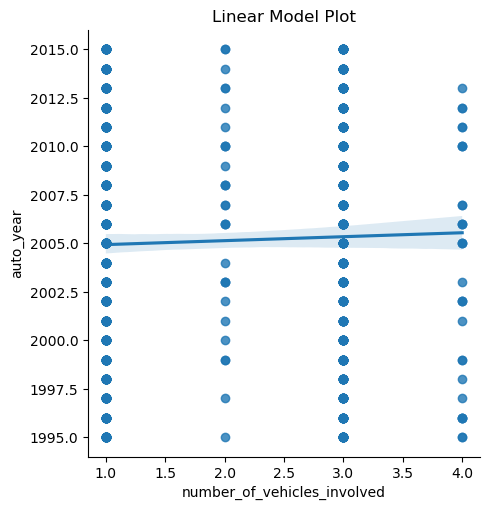

In [53]:
#checking linear relation of 'number_of_vehicles_involved' feature with other features 
log.append('number_of_vehicles_involved')#Appending feature
re()#calling function

**'number_of_vehicles_involved'** feature has **almost no linear relation** with other remaining features.

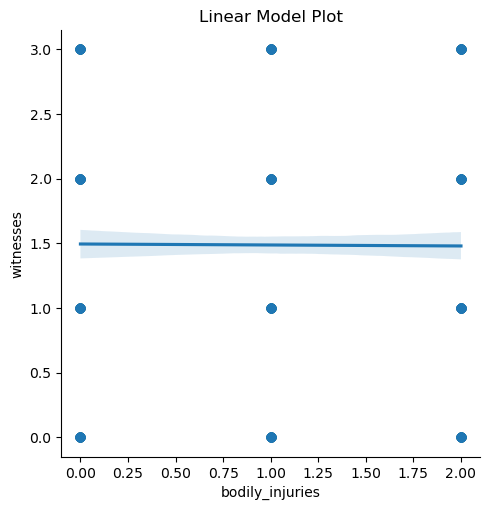

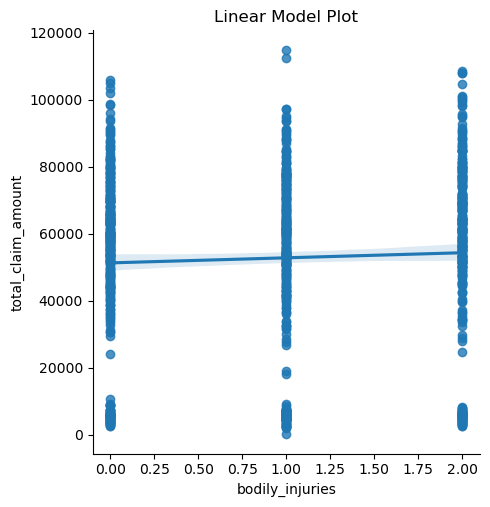

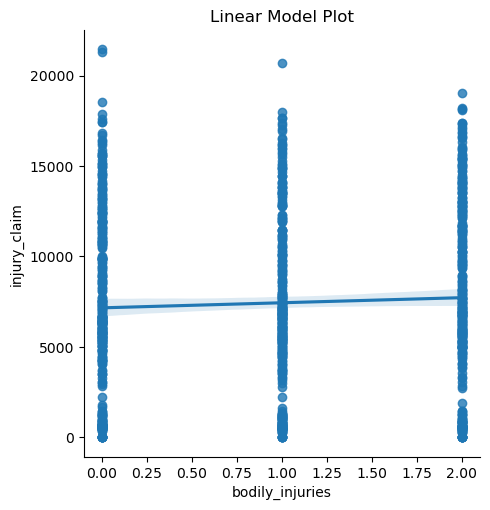

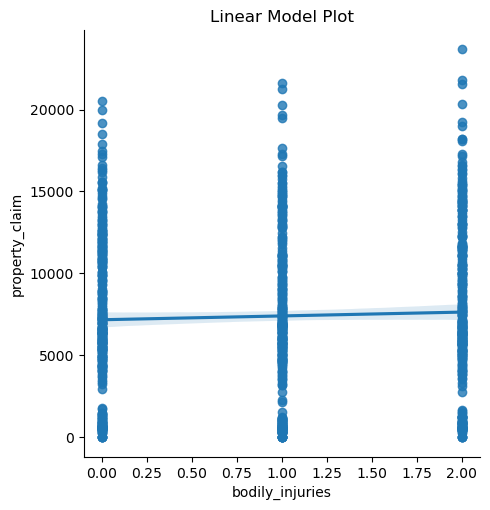

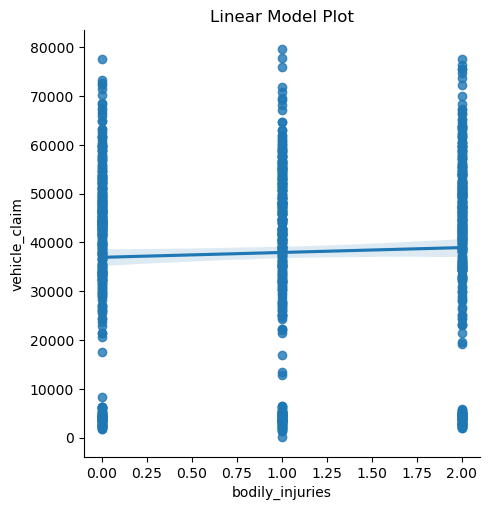

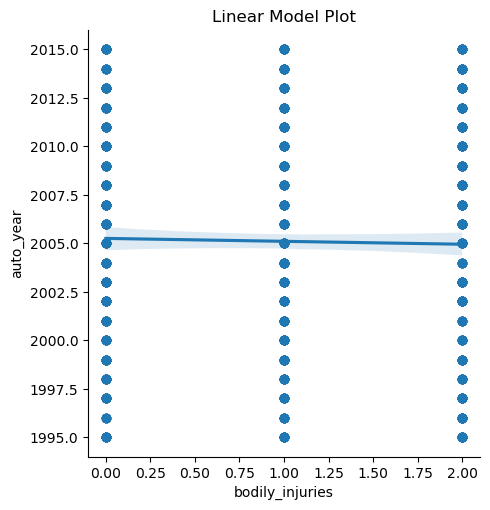

In [54]:
#checking linear relation of 'bodily_injuries' feature with other features 
log.append('bodily_injuries')#Appending feature
re()#calling function

**'bodily_injuries'** feature has **almost no linear relation** with other remaining features.

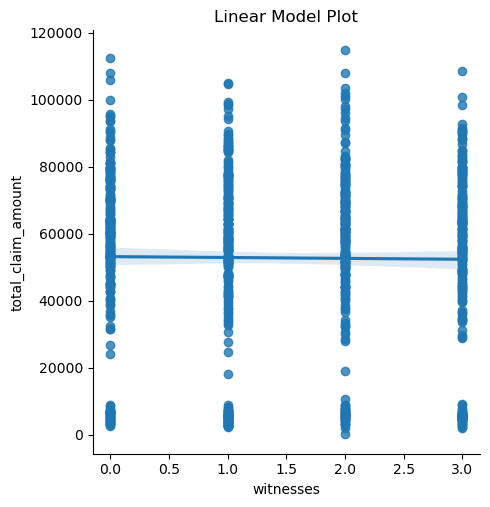

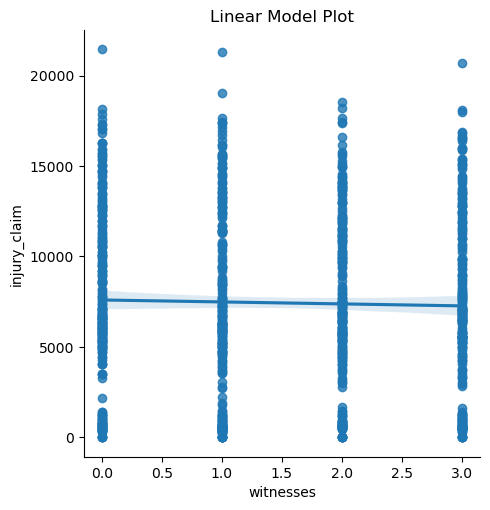

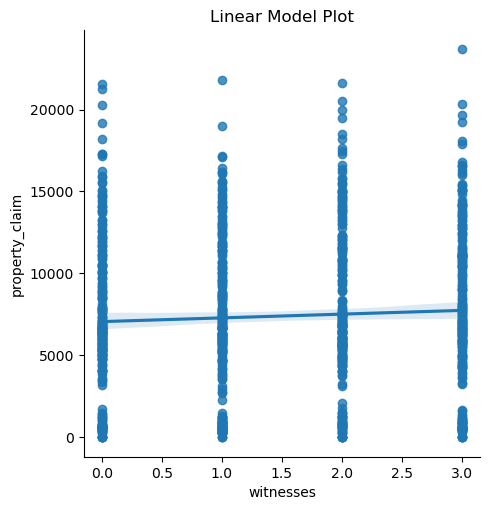

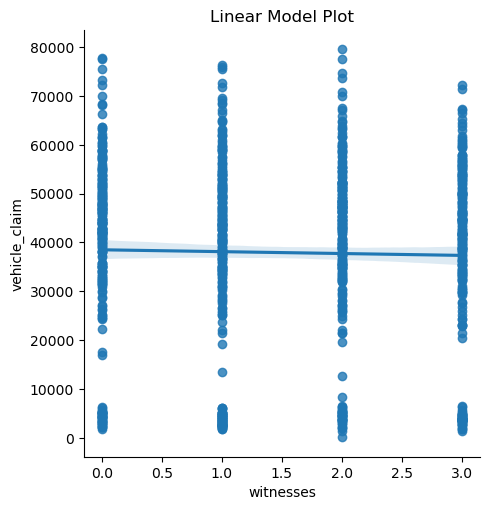

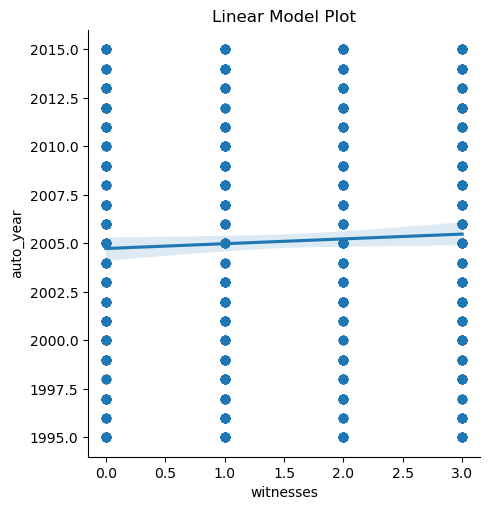

In [55]:
#checking linear relation of 'witnesses' feature with other features 
log.append('witnesses')#Appending feature
re()#calling function

**'witnesses'** feature has **almost no linear relation** with other remaining features.

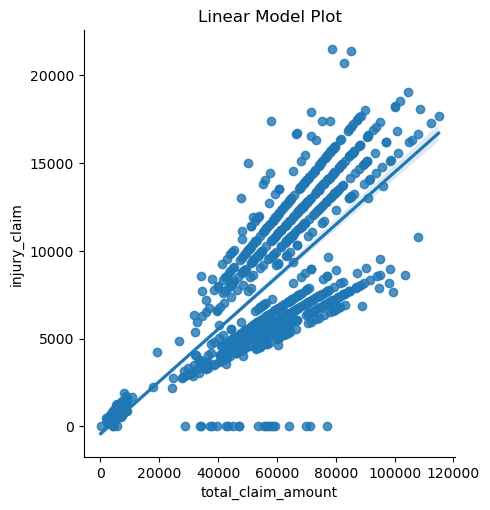

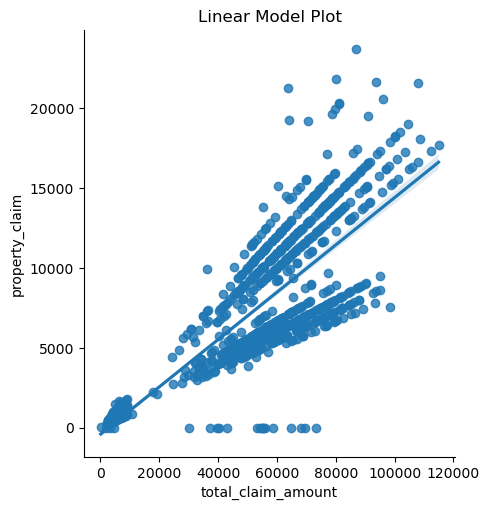

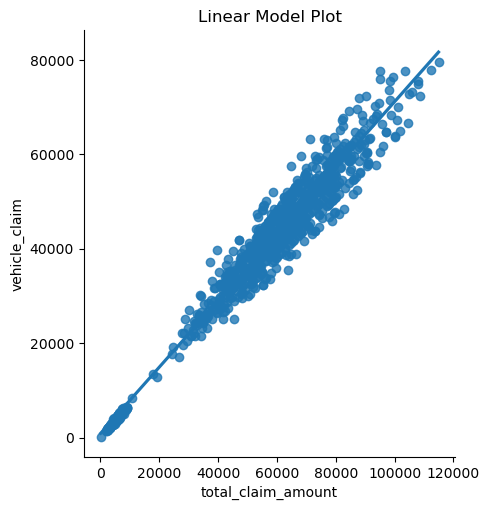

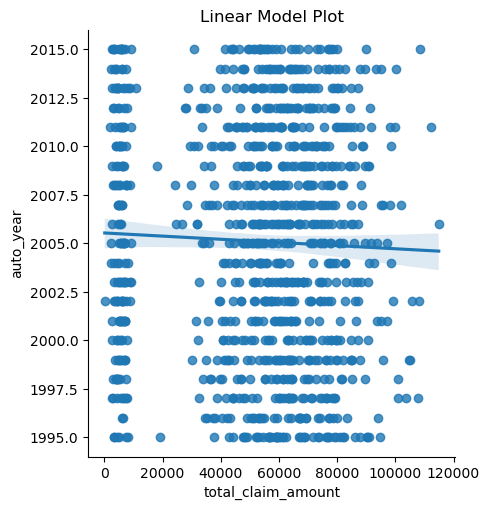

In [56]:
#checking linear relation of 'total_claim_amount' feature with other features 
log.append('total_claim_amount')#Appending feature
re()#calling function

**'total_claim_amount'** feature has **high positive linear relation** with **'injury_claim', 'property_claim ' and 'vehicle_claim'** features.  
    
**'total_claim_amount'** feature has **almost no linear relation** with other remaining features.

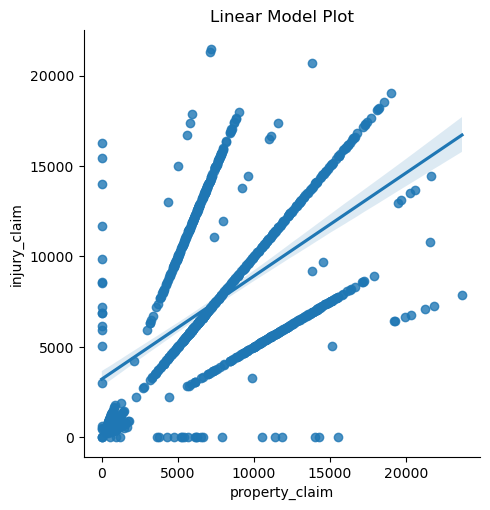

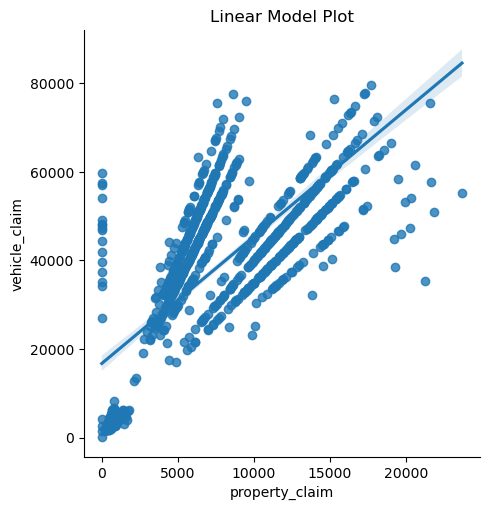

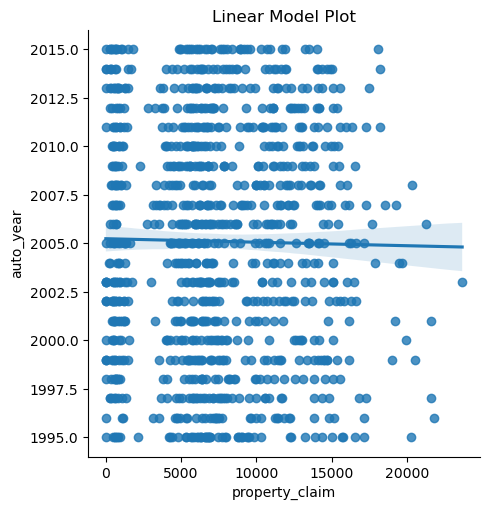

In [57]:
#checking linear relation of 'property_claim' feature with other features 
log.append('property_claim')#Appending feature
re()#calling function

**'property_claim'** feature has **high positive linear relation** with **'injury_claim' and 'vehicle_claim'** features.  
    
**'property_claim'** feature has **almost no linear relation** with other remaining features.

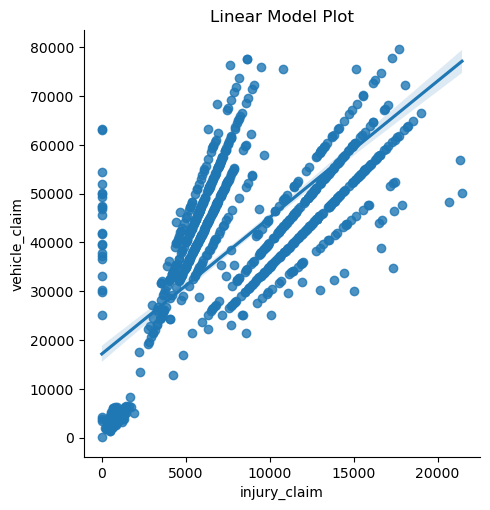

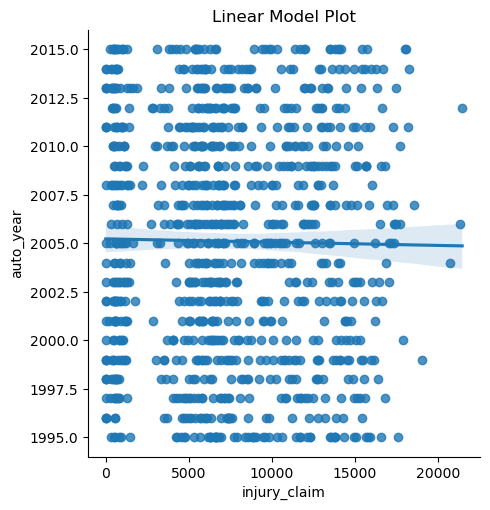

In [58]:
#checking linear relation of 'injury_claim' feature with other features 
log.append('injury_claim')#Appending feature
re()#calling function

**'injury_claim'** feature has **high positive linear relation** with **'vehicle_claim'** feature.  
    
**'injury_claim'** feature has **almost no linear relation** with other remaining features.

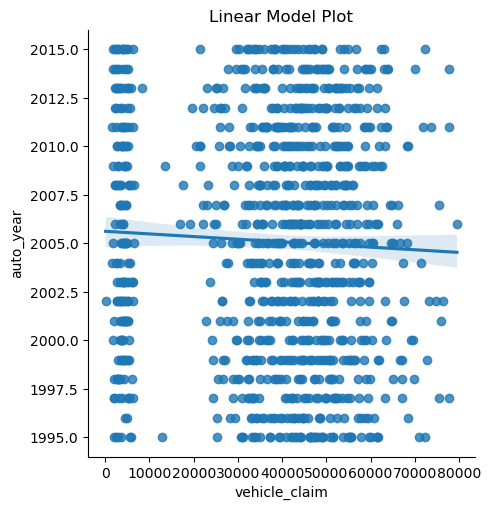

In [59]:
#checking linear relation between 'vehicle_claim' and 'auto_year' features 
log.append('vehicle_claim')#Appending feature
re()#calling function

**'vehicle_claim' and 'auto_year'** feature has **almost no linear relation** between them.

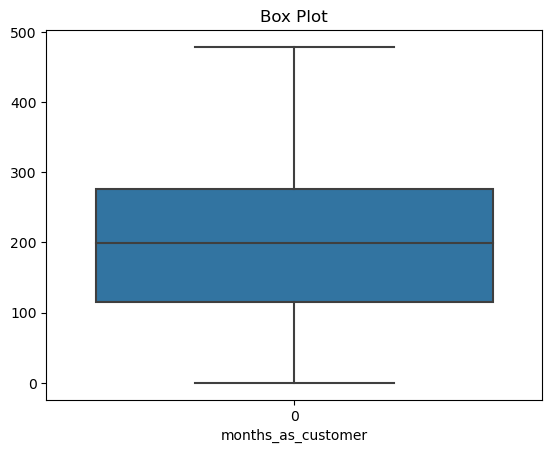

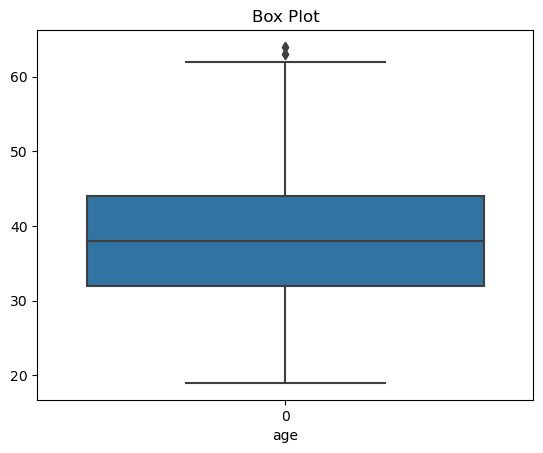

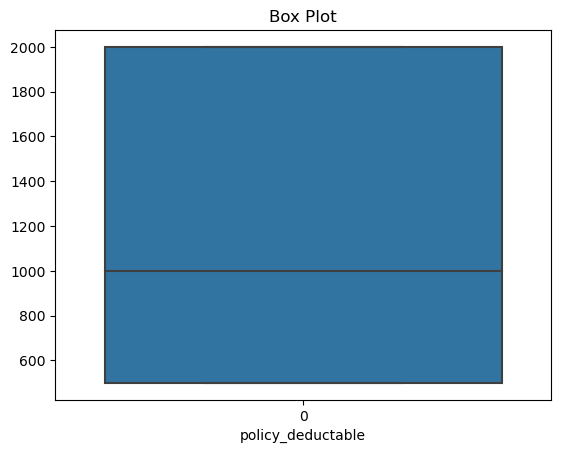

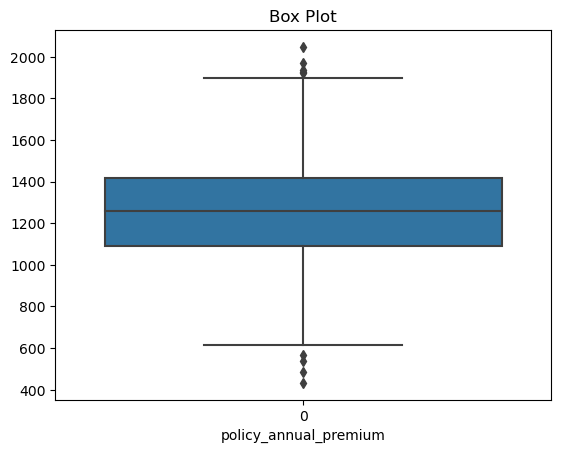

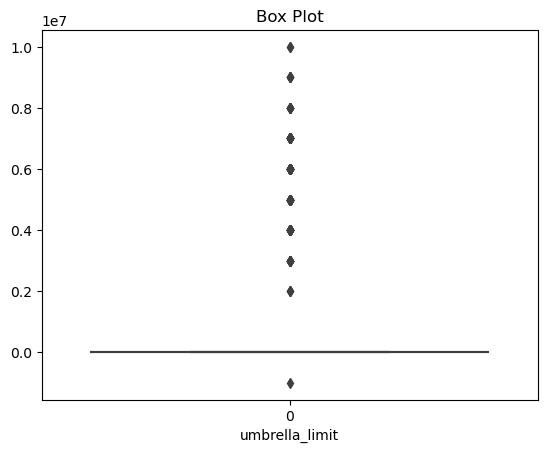

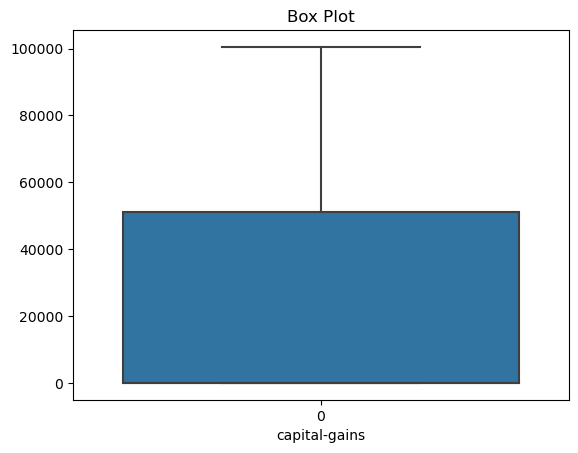

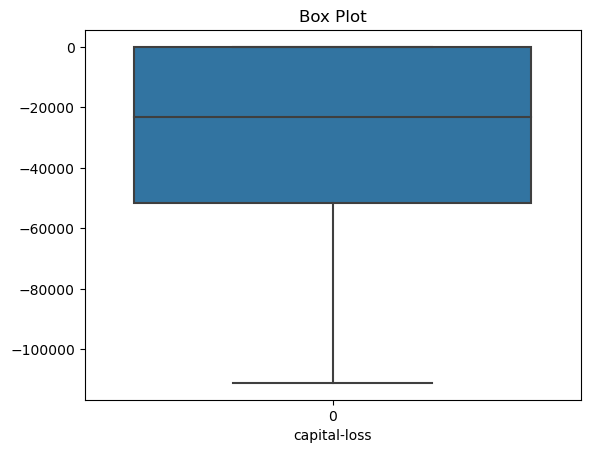

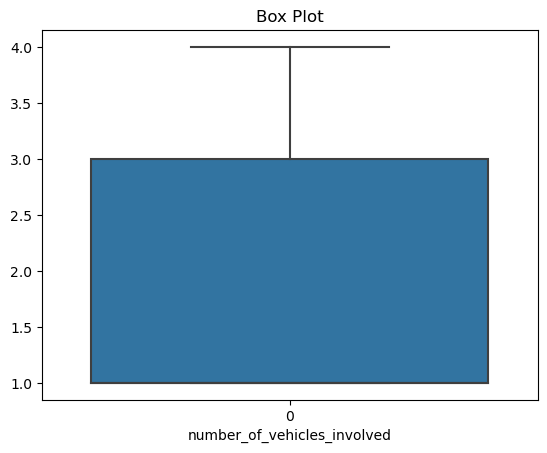

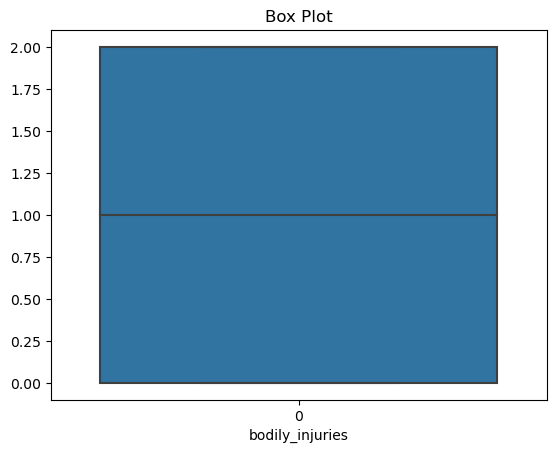

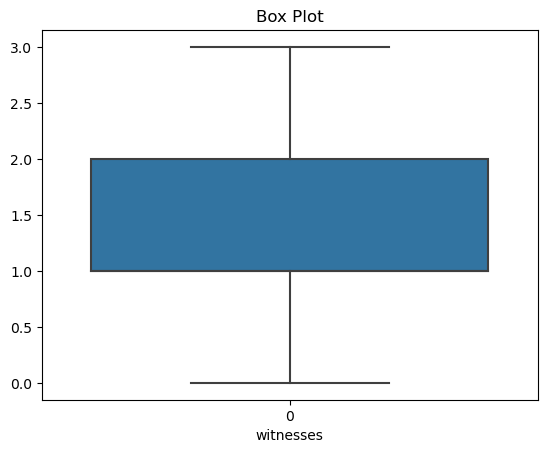

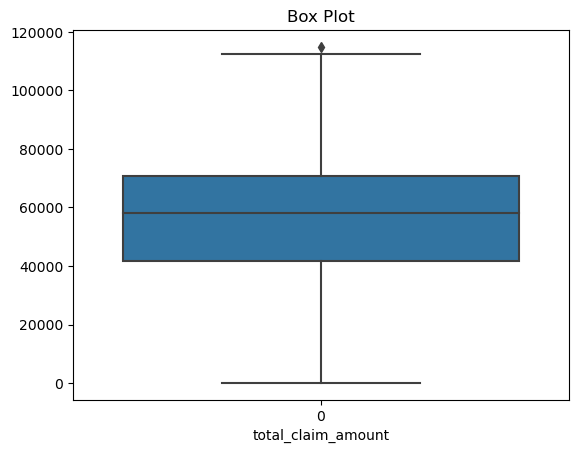

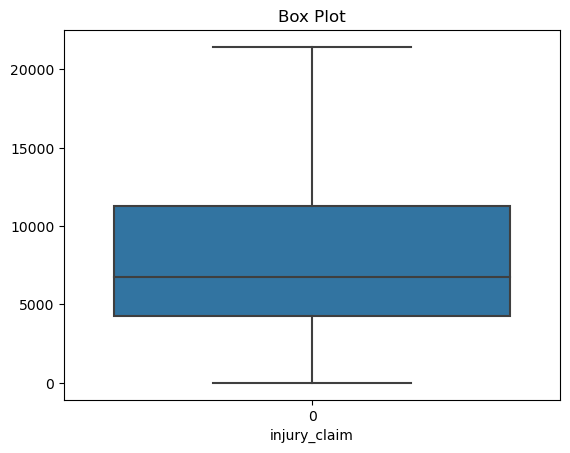

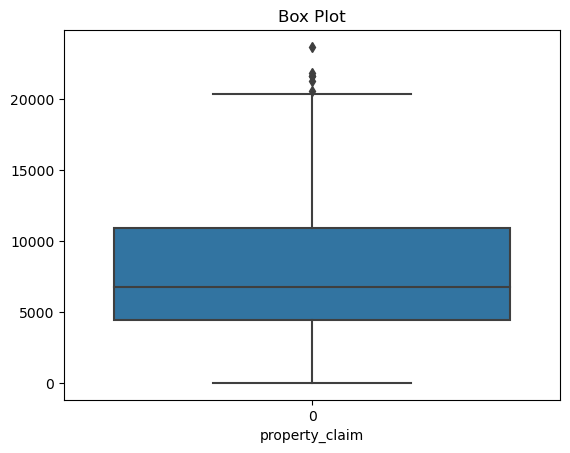

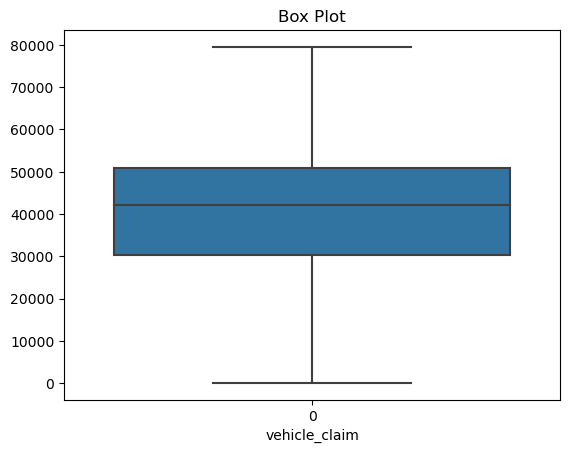

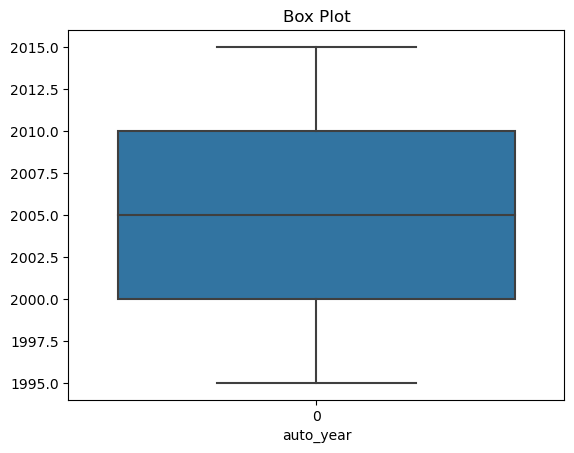

In [60]:
#Checking outliers via Box Plot
for i in num_c:
    sb.boxplot(df[i])
    plt.xlabel(i)
    plt.title('Box Plot')
    plt.show()

**'age', 'policy_annual_premium', 'umbrella_limit' and 'property_claim'** features contains outliers.

In [61]:
#removing outliers using zscore method
#Importing necessary libraries
from scipy.stats import zscore as zs

a=['age', 'policy_annual_premium', 'umbrella_limit', 'property_claim' ]

f_outlier=df[a]
z=np.abs(zs(f_outlier))
z

age  policy_annual_premium  umbrella_limit  \
policy_bind_date                                                    
2014-10-17        0.990836               0.616705        0.479476   
2006-06-27        0.334073               0.242521        1.697980   
2000-09-06        1.088913               0.642233        1.697980   
1990-05-25        0.224613               0.652886        2.133471   
2014-06-06        0.552994               1.341980        2.133471   
...                    ...                    ...             ...   
1991-07-16        0.103769               0.222884        0.479476   
2014-01-05        0.224613               0.739141        0.479476   
2003-02-17        0.541611               0.520739        0.826998   
2011-11-18        2.523284               0.411866        1.697980   
1996-11-11        2.304363               2.008710        0.479476   

                  property_claim  
policy_bind_date                  
2014-10-17              1.165505  
2006-06-27              1.372696  
2000-09-06              0.736072  
1990-05-25              0.219722  
2014-06-06              1.399654  
...                          ...  
1991-07-16              0.273817  
2014-01-05              2.214794  
2003-02-17              0.020826  
2011-11-18              0.451976  
1996-11-11              1.343664  

[1000 rows x 4 columns]

The **variable 'z'** holds the **zscores values** of these features.

In [62]:
#checking outliers as per the threshold value as '3'
np.where(z>3)

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
        657, 700, 763, 875, 922, 975], dtype=int64),
 array([2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 3, 2, 2, 2, 1, 2, 2, 2],
       dtype=int64))

In [63]:
#checking value of the outliers
z.iloc[31,2]

3.0044538458871766

In [64]:
z.iloc[48,2]

3.0044538458871766

In [65]:
z.iloc[88,2]

3.4399450541618797

In [66]:
z.iloc[115,2]

3.875436262436583

We can confirm that these values holds outlier as per the threshold value.

In [67]:
#Removing outliers 
zscore=df[(z<3).all(axis=1)]#storing values in 'zscore' variable

In [68]:
iqr_frame=df.copy()#copying data of 'df' data frame
 
iqr_frame.drop('incident_date',axis=1,inplace=True)#dropping 'incident_date' feature

#Using IQR method to remove outliers from the copied data frame
q1=f_outlier.quantile(.25)
q3=f_outlier.quantile(.75)
iqr=q3-q1
IQR=df[~((iqr_frame< (q1-1.5*iqr)) | (iqr_frame>(q3+1.5*iqr))).any(axis=1)]

In [69]:
print('Data loss percentage after removing outliers via zscore method',((df.shape[0]-zscore.shape[0])/df.shape[0])*100)
print('Data loss percentage after removing outliers via IQR method',((df.shape[0]-IQR.shape[0])/df.shape[0])*100)

Data loss percentage after removing outliers via zscore method 1.9
Data loss percentage after removing outliers via IQR method 21.7


We can observe that **zscore method performed well** than IQR method, hence, we will **update** the data frame with **zscore method.**

In [70]:
outliers=df.shape[0]-zscore.shape[0]#storing number of outliers removed in 'outliers' variable

print(f'Outliers removed : {outliers}')#printing
df=zscore#Updating data frame

Outliers removed : 19


In [71]:
df.shape#checking shape of data frame

(981, 35)

Now the data frame has **981 rows.**

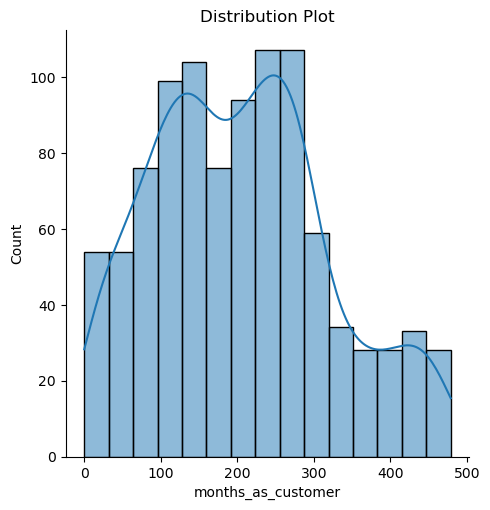

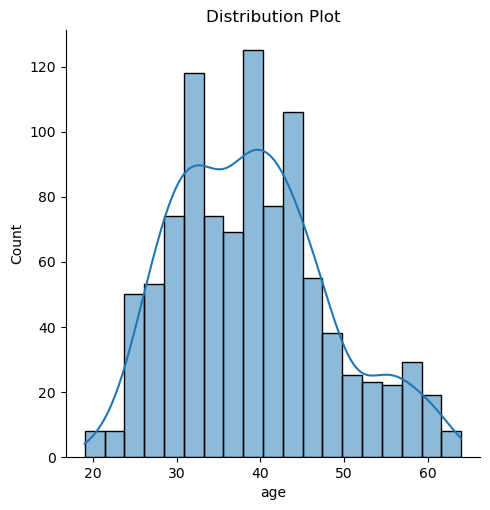

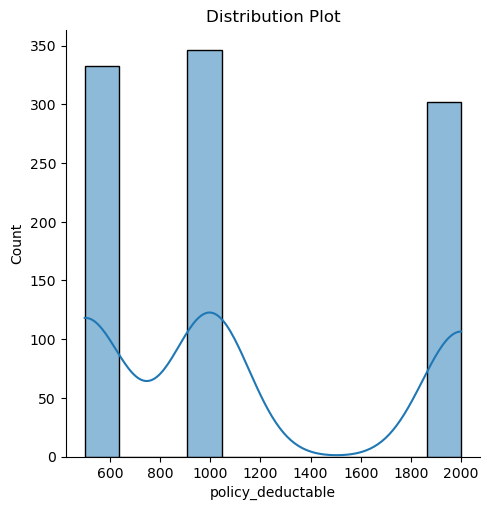

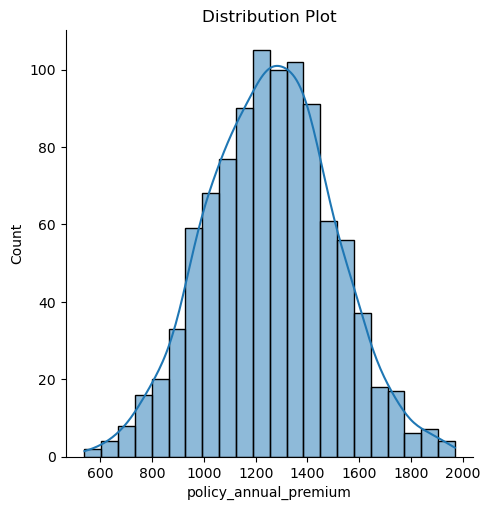

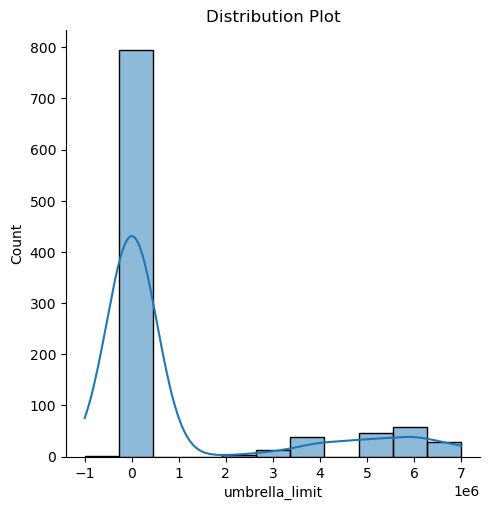

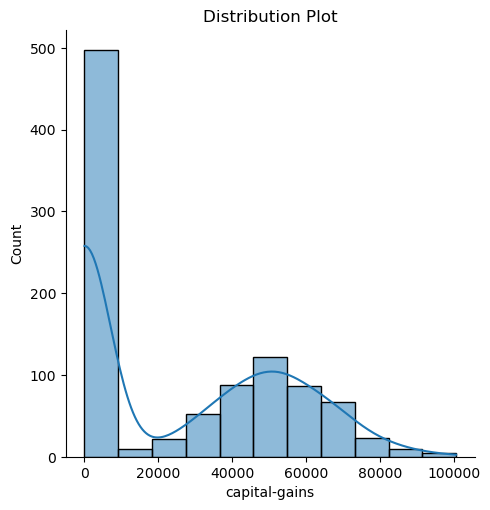

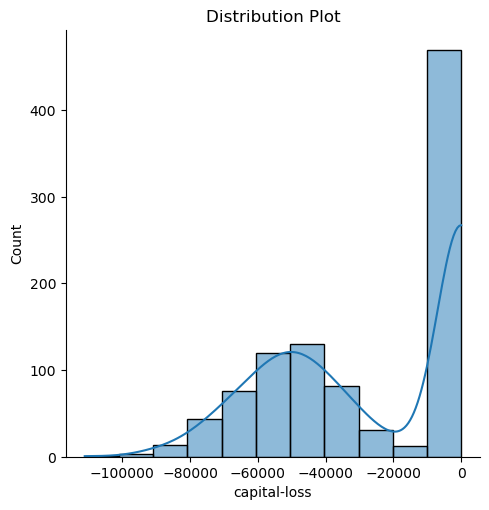

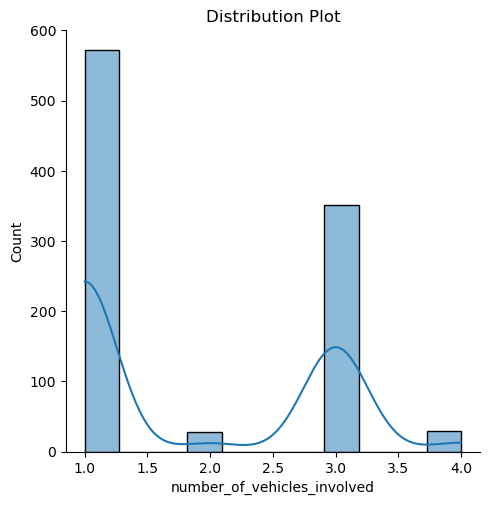

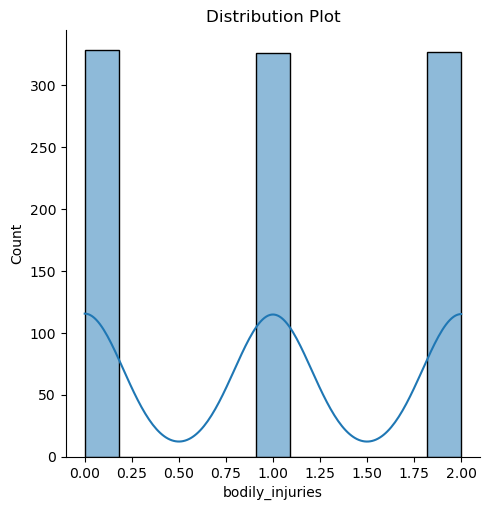

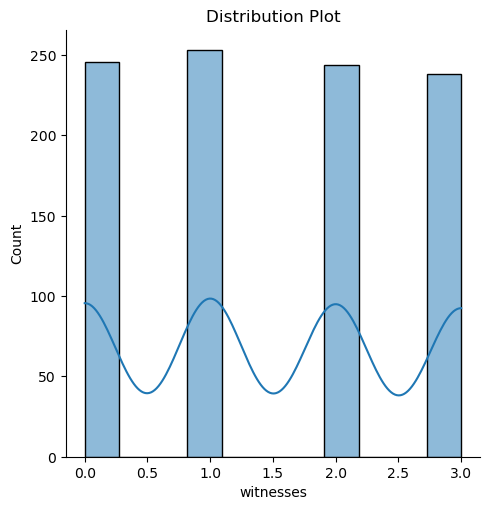

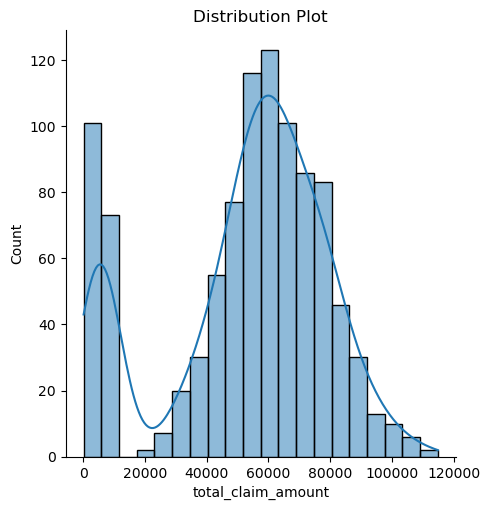

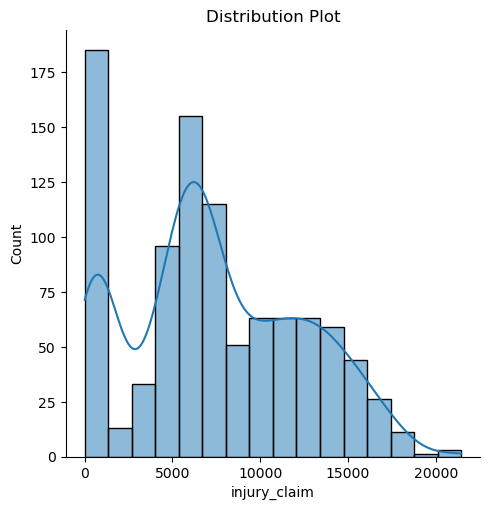

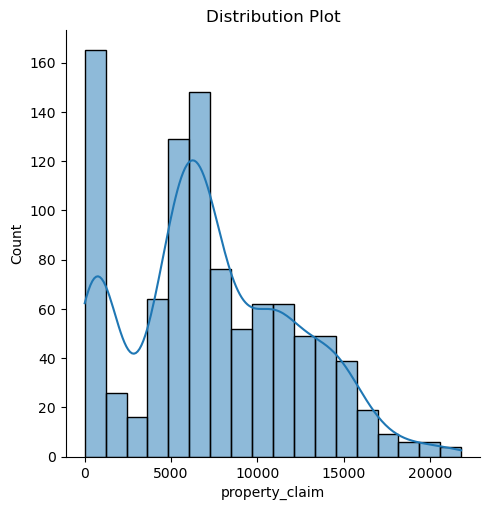

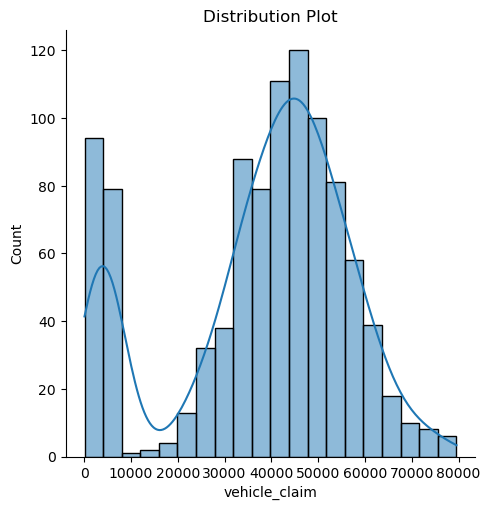

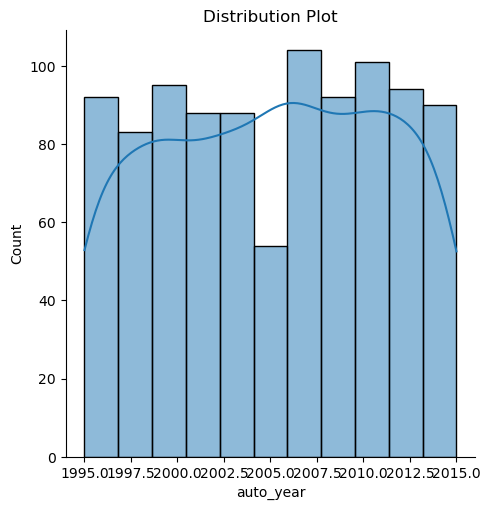

In [72]:
#checking distribution of columns
for i in num_c:
    sb.displot(df[i],kde=True)
    plt.title('Distribution Plot')    

**'umbrella_limit' and 'number_of_vehicles_involved'** features are skewed to the right.  
  
**'total_claim_amount' and 'vehicle_claim'** features are skewed to the left.

In [73]:
df.skew()

months_as_customer             0.363268
age                            0.475942
policy_deductable              0.473431
policy_annual_premium          0.034884
umbrella_limit                 1.803065
capital-gains                  0.465985
capital-loss                  -0.390468
incident_hour_of_the_day      -0.038146
number_of_vehicles_involved    0.506989
bodily_injuries                0.001877
witnesses                      0.024567
total_claim_amount            -0.595242
injury_claim                   0.269442
property_claim                 0.358919
vehicle_claim                 -0.622528
auto_year                     -0.054033
dtype: float64

**'umbrella_limit', 'number_of_vehicles_involved', 'total_claim_amount' and 'vehicle_claim'** features are in **unacceptable range**, thus , we can use **yeojohnson method** to remove skewness.

In [74]:
skew_data=df.copy()#copying data of 'df' data frame

from scipy.stats import yeojohnson as yj #importing library

a=['umbrella_limit', 'number_of_vehicles_involved', 'total_claim_amount', 'vehicle_claim']#creating list

for i in a:#iterating through 'a' list
    
    skew_data[i],p=yj(skew_data[i])

skew_data.skew()

months_as_customer             0.363268
age                            0.475942
policy_deductable              0.473431
policy_annual_premium          0.034884
umbrella_limit                -7.939425
capital-gains                  0.465985
capital-loss                  -0.390468
incident_hour_of_the_day      -0.038146
number_of_vehicles_involved    0.370496
bodily_injuries                0.001877
witnesses                      0.024567
total_claim_amount            -0.508980
injury_claim                   0.269442
property_claim                 0.358919
vehicle_claim                 -0.522130
auto_year                     -0.054033
dtype: float64

Skewness is increased in **'umbrella_limit'** feature and reduced in **'number_of_vehicles_involved', 'total_claim_amount' and 'vehicle_claim'** features.

In [75]:
#applying yeojohnson method on original data frame's columns except for 'umbrella_limit' feature

a=['number_of_vehicles_involved', 'total_claim_amount', 'vehicle_claim']#creating list

for i in a:#iterating through 'a' list
    
    df[i],p=yj(df[i])

df.skew()

months_as_customer             0.363268
age                            0.475942
policy_deductable              0.473431
policy_annual_premium          0.034884
umbrella_limit                 1.803065
capital-gains                  0.465985
capital-loss                  -0.390468
incident_hour_of_the_day      -0.038146
number_of_vehicles_involved    0.370496
bodily_injuries                0.001877
witnesses                      0.024567
total_claim_amount            -0.508980
injury_claim                   0.269442
property_claim                 0.358919
vehicle_claim                 -0.522130
auto_year                     -0.054033
dtype: float64

**'umbrella_limit', 'total_claim_amount' and 'vehicle_claim'** features are still in in **unacceptable range**, thus , we can try **square root method** to remove skewness.

In [76]:
skew_data=df.copy()#copying data of 'df' data frame

a=['umbrella_limit', 'total_claim_amount', 'vehicle_claim']#creating list

for i in a:#iterating through 'a' list
    
    skew_data[i]=np.sqrt(skew_data[i]) #applying square root method
    
skew_data.skew()

months_as_customer             0.363268
age                            0.475942
policy_deductable              0.473431
policy_annual_premium          0.034884
umbrella_limit                 1.650156
capital-gains                  0.465985
capital-loss                  -0.390468
incident_hour_of_the_day      -0.038146
number_of_vehicles_involved    0.370496
bodily_injuries                0.001877
witnesses                      0.024567
total_claim_amount            -1.096527
injury_claim                   0.269442
property_claim                 0.358919
vehicle_claim                 -1.104933
auto_year                     -0.054033
dtype: float64

In [77]:
skew_data.isnull().sum()

months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 1
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_cl

Skewness is increased in **'vehicle_claim' and 'total_claim_amount'** features and reduced in **'umbrella_limit'** feature, **however resulting in 1 null value.**

In [78]:
skew_data=df.copy()#copying data of 'df' data frame

for i in a:#iterating through 'a' list
    
    skew_data[i]=np.log1p(skew_data[i]) #applying log + 1 method
    
skew_data.skew()

months_as_customer             0.363268
age                            0.475942
policy_deductable              0.473431
policy_annual_premium          0.034884
umbrella_limit                 1.585879
capital-gains                  0.465985
capital-loss                  -0.390468
incident_hour_of_the_day      -0.038146
number_of_vehicles_involved    0.370496
bodily_injuries                0.001877
witnesses                      0.024567
total_claim_amount            -1.667709
injury_claim                   0.269442
property_claim                 0.358919
vehicle_claim                 -1.676912
auto_year                     -0.054033
dtype: float64

In [79]:
skew_data.isnull().sum()

months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 1
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_cl

Skewness is increased in **'vehicle_claim' and 'total_claim_amount'** features and reduced in **'umbrella_limit'** feature, **however resulting in 1 null value.**

**'umbrella_limit', 'total_claim_amount' and 'vehicle_claim'** features are still in in **unacceptable range**, thus , we can try **cube root method** to remove skewness.

In [80]:
for i in a:#iterating through 'a' list
    
    df[i]=np.cbrt(df[i])#applying cube root method
    
df.skew()

months_as_customer             0.363268
age                            0.475942
policy_deductable              0.473431
policy_annual_premium          0.034884
umbrella_limit                 1.605531
capital-gains                  0.465985
capital-loss                  -0.390468
incident_hour_of_the_day      -0.038146
number_of_vehicles_involved    0.370496
bodily_injuries                0.001877
witnesses                      0.024567
total_claim_amount            -1.269981
injury_claim                   0.269442
property_claim                 0.358919
vehicle_claim                 -1.277439
auto_year                     -0.054033
dtype: float64

Skewness is increased in **'vehicle_claim' and 'total_claim_amount'** features and reduced in **'umbrella_limit'** feature.

In [81]:
#reverting cuberoot method on 'total_claim_amount' and 'vehicle_claim' features

a=['total_claim_amount', 'vehicle_claim']#creating list

for i in a:#iterating through 'a' list
    
    df[i]=df[i]**3 #reverting cube root method
    
df.skew()

months_as_customer             0.363268
age                            0.475942
policy_deductable              0.473431
policy_annual_premium          0.034884
umbrella_limit                 1.605531
capital-gains                  0.465985
capital-loss                  -0.390468
incident_hour_of_the_day      -0.038146
number_of_vehicles_involved    0.370496
bodily_injuries                0.001877
witnesses                      0.024567
total_claim_amount            -0.508980
injury_claim                   0.269442
property_claim                 0.358919
vehicle_claim                 -0.522130
auto_year                     -0.054033
dtype: float64

We have applied various applicable methods, thus we can **accept  these value as a threshold values**.  

In [82]:
#Encoding categorical columns using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df

months_as_customer  age policy_state policy_csl  \
policy_bind_date                                                    
2014-10-17                       328   48           OH    250/500   
2006-06-27                       228   42           IN    250/500   
2000-09-06                       134   29           OH    100/300   
1990-05-25                       256   41           IL    250/500   
2014-06-06                       228   44           IL   500/1000   
...                              ...  ...          ...        ...   
1991-07-16                         3   38           OH   500/1000   
2014-01-05                       285   41           IL    100/300   
2003-02-17                       130   34           OH    250/500   
2011-11-18                       458   62           IL   500/1000   
1996-11-11                       456   60           OH    250/500   

                  policy_deductable  policy_annual_premium  umbrella_limit  \
policy_bind_date                                                             
2014-10-17                     1000                1406.91        0.000000   
2006-06-27                     2000                1197.22      170.997595   
2000-09-06                     2000                1413.14      170.997595   
1990-05-25                     2000                1415.74      181.712059   
2014-06-06                     1000                1583.91      181.712059   
...                             ...                    ...             ...   
1991-07-16                     1000                1310.80        0.000000   
2014-01-05                     1000                1436.79        0.000000   
2003-02-17                      500                1383.49      144.224957   
2011-11-18                     2000                1356.92      170.997595   
1996-11-11                     1000                 766.19        0.000000   

                 insured_sex insured_education_level insured_occupation  ...  \
policy_bind_date                                                         ...   
2014-10-17              MALE                      MD       craft-repair  ...   
2006-06-27              MALE                      MD  machine-op-inspct  ...   
2000-09-06            FEMALE                     PhD              sales  ...   
1990-05-25            FEMALE                     PhD       armed-forces  ...   
2014-06-06              MALE               Associate              sales  ...   
...                      ...                     ...                ...  ...   
1991-07-16            FEMALE                 Masters       craft-repair  ...   
2014-01-05            FEMALE                     PhD     prof-specialty  ...   
2003-02-17            FEMALE                 Masters       armed-forces  ...   
2011-11-18              MALE               Associate  handlers-cleaners  ...   
1996-11-11            FEMALE               Associate              sales  ...   

                 witnesses police_report_available  total_claim_amount  \
policy_bind_date                                                         
2014-10-17               2                     YES       153745.329023   
2006-06-27               0                      NO         8930.210678   
2000-09-06               3                      NO        70461.699475   
1990-05-25               2                      NO       134884.559120   
2014-06-06               1                      NO        11663.496865   
...                    ...                     ...                 ...   
1991-07-16               1                      NO       189995.222091   
2014-01-05               3                      NO       240252.983031   
2003-02-17               3                     YES       144281.997187   
2011-11-18               1                     YES        97735.028265   
1996-11-11               3                      NO         8911.282494   

                  injury_claim property_claim  vehicle_claim   auto_make  \
policy_bind_date         

In [83]:
for i in cat_c:#iterating through 'cat_c' list
    
    df[i]=le.fit_transform(df[i])#Transforming columns

df

months_as_customer  age  policy_state  policy_csl  \
policy_bind_date                                                      
2014-10-17                       328   48             2           1   
2006-06-27                       228   42             1           1   
2000-09-06                       134   29             2           0   
1990-05-25                       256   41             0           1   
2014-06-06                       228   44             0           2   
...                              ...  ...           ...         ...   
1991-07-16                         3   38             2           2   
2014-01-05                       285   41             0           0   
2003-02-17                       130   34             2           1   
2011-11-18                       458   62             0           2   
1996-11-11                       456   60             2           1   

                  policy_deductable  policy_annual_premium  umbrella_limit  \
policy_bind_date                                                             
2014-10-17                     1000                1406.91        0.000000   
2006-06-27                     2000                1197.22      170.997595   
2000-09-06                     2000                1413.14      170.997595   
1990-05-25                     2000                1415.74      181.712059   
2014-06-06                     1000                1583.91      181.712059   
...                             ...                    ...             ...   
1991-07-16                     1000                1310.80        0.000000   
2014-01-05                     1000                1436.79        0.000000   
2003-02-17                      500                1383.49      144.224957   
2011-11-18                     2000                1356.92      170.997595   
1996-11-11                     1000                 766.19        0.000000   

                  insured_sex  insured_education_level  insured_occupation  \
policy_bind_date                                                             
2014-10-17                  1                        4                   2   
2006-06-27                  1                        4                   6   
2000-09-06                  0                        6                  11   
1990-05-25                  0                        6                   1   
2014-06-06                  1                        0                  11   
...                       ...                      ...                 ...   
1991-07-16                  0                        5                   2   
2014-01-05                  0                        6                   9   
2003-02-17                  0                        5                   1   
2011-11-18                  1                        0                   5   
1996-11-11                  0                        0                  11   

                  ...  witnesses  police_report_available  total_claim_amount  \
policy_bind_date  ...                                                           
2014-10-17        ...          2                        1       153745.329023   
2006-06-27        ...          0                        0         8930.210678   
2000-09-06        ...          3                        0        70461.699475   
1990-05-25        ...          2                        0       134884.559120   
2014-06-06        ...          1                        0        11663.496865   
...               ...        ...                      ...                 ...   
1991-07-16        ...          1                        0       189995.222091   
2014-01-05        ...          3                        0       240252.983031   
2003-02-17        ...          3                        1       144281.997187   
2011-11-18        ...          1                        1        97735.028265   
1996-11-11        ...          3                        0         8911.282494   

          

All the catagorical data have been encoded. In **target variable**, **'1'** represents **'Y'** and **'0'** represents **'N'**.

In [84]:
#Checking correlation between independant and dependant variables
cor=df.corr()
cor

months_as_customer       age  policy_state  \
months_as_customer                     1.000000  0.922960     -0.007179   
age                                    0.922960  1.000000     -0.020009   
policy_state                          -0.007179 -0.020009      1.000000   
policy_csl                            -0.021865 -0.013330      0.001651   
policy_deductable                      0.030777  0.031851      0.017559   
policy_annual_premium                 -0.003875  0.005290      0.015079   
umbrella_limit                         0.007978  0.000839     -0.009350   
insured_sex                            0.059770  0.073857     -0.017970   
insured_education_level               -0.000735  0.001645     -0.027173   
insured_occupation                     0.006786  0.014703     -0.025369   
insured_hobbies                       -0.089267 -0.079038     -0.039484   
insured_relationship                   0.071304  0.075993     -0.017075   
capital-gains                          0.007126 -0.004735      0.068431   
capital-loss                           0.023429  0.013125     -0.031703   
incident_date                         -0.046874 -0.035511      0.029698   
incident_type                         -0.016557 -0.026152      0.032381   
collision_type                        -0.073025 -0.076321      0.049962   
incident_severity                     -0.064059 -0.064373     -0.028347   
authorities_contacted                  0.013999  0.018575     -0.014597   
incident_state                         0.015973  0.012750      0.019472   
incident_city                         -0.006837 -0.006838     -0.002843   
incident_hour_of_the_day               0.066370  0.083785      0.021938   
number_of_vehicles_involved            0.014293  0.021045     -0.042812   
property_damage                       -0.000521 -0.008165     -0.013556   
bodily_injuries                       -0.007870 -0.012377      0.012057   
witnesses                              0.063289  0.056159      0.025779   
police_report_available               -0.017084 -0.018058      0.065318   
total_claim_amount                     0.059193  0.068347     -0.015077   
injury_claim                           0.064864  0.077002     -0.048189   
property_claim                         0.036471  0.062231     -0.006442   
vehicle_claim                          0.056256  0.059056     -0.006424   
auto_make                              0.049912  0.033873      0.010283   
auto_model                             0.005350  0.015456     -0.017956   
auto_year                              0.001145  0.005767     -0.001116   
fraud_reported                         0.021375  0.013338      0.034595   

                             policy_csl  policy_deductable  \
months_as_customer            -0.021865           0.030777   
age                           -0.013330           0.031851   
policy_state                   0.001651           0.017559   
policy_csl                     1.000000           0.009999   
policy_deductable              0.009999           1.000000   
policy_annual_premium          0.032677          -0.007754   
umbrella_limit                 0.012651           0.005780   
insured_sex                   -0.003467          -0.008308   
insured_education_level        0.008339           0.014117   
insured_occupation             0.016512          -0.052613   
insured_hobbies               -0.003728          -0.002614   
insured_relationship          -0.034523          -0.017619   
capital-gains                  0.009902           0.034437   
capital-loss                  -0.035630          -0.023815   
incident_date                 -0.029163          -0.045308   
incident_type                  0.005102          -0.033806   
collision_type                 0.028137          -0.055969   
incident_severity              0.017181          -0.016628   
authorities_contacted          0.050881           0.000736   
incident_state                 0.035713          -0.000849   
incident_city             

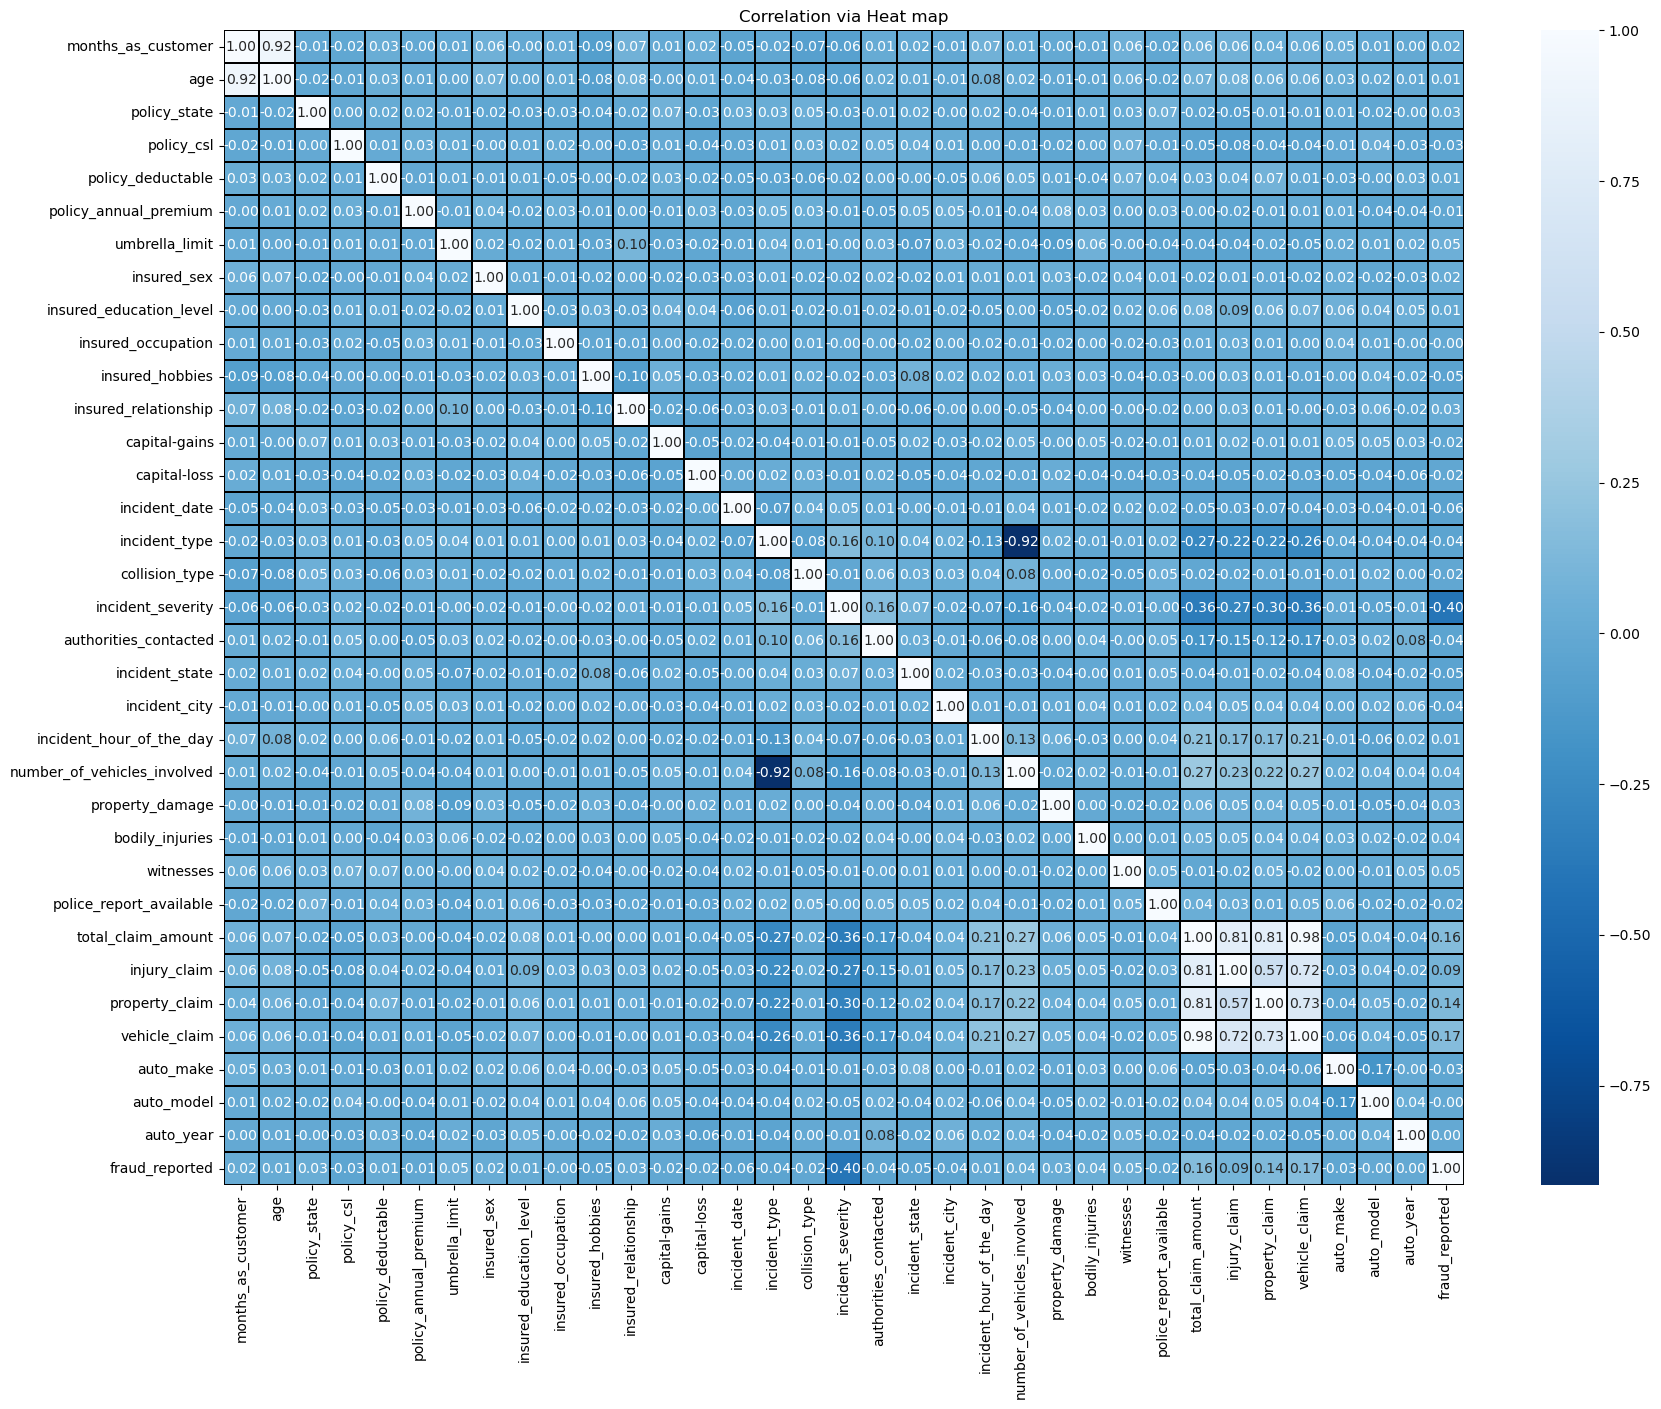

In [85]:
#Visualizing correlation via heat map
plt.figure(figsize=(20,15))
sb.heatmap(cor,annot=True,cmap="Blues_r",linecolor='black',linewidths=0.1,fmt='0.2f')
plt.title('Correlation via Heat map')
plt.show()

We can observe the following from this heatmap:  
  
1)**Features** have **very low correlation** with **target variable.** 
  
2)**'policy_csl', 'policy_annual_premium', 'insured_occupation', 'insured_hobbies' , 'capital-gains', 'capital-loss','incident_date', 'incident_type', 'collision_type', 'authorities_contacted', 'incident_state', 'incident_city', 'police_report_available', 'auto_make' and 'auto_model'** features have **low negative correlation** with **target variable.**  
  
3)**'incident_severity'** features have **moderate negative correlation** with **target variable.**  
  
3)**'months_as_customer', 'age', 'policy_state', 'policy_deductable', 'umbrella_limit' , 'insured_sex', 'insured_education_level', 'insured_relationship', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'property_damage', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim' and 'auto_year'** features have **low positive correlation** with **target variable.**  
  
4)These are the following pairs which have **high positive correlation relation** with **each other:**  
     
**'total_claim_amount'** and  **'vehicle_claim'** features
  
**'total_claim_amount'** and  **'property_claim'** features
  
**'total_claim_amount'** and  **'injury_claim'** features
  
5)**'incident_type'** and **'number_of_vehicles_involved'** features have **high negative correlation relation** with **each other:**   


In [86]:
#Separating features and target variable 
x=df.drop('fraud_reported',axis=1)
y=df['fraud_reported']    

In [87]:
#checking dimensions of features and label 
print('Dimensions of features:',x.shape,'\nDimensions of label:',y.shape)

Dimensions of features: (981, 34) 
Dimensions of label: (981,)


We can observe that both features and lable have **same number of rows**.  
'x' contains 34 features.

In [88]:
#Importing required library to apply StandardScaler
from sklearn.preprocessing import StandardScaler as sc

sc=sc()#creating instance

x=pd.DataFrame(sc.fit_transform(x),columns=x.columns)#transforming data
x

months_as_customer       age  policy_state  policy_csl  \
0              1.070264  0.983956      1.180447    0.067197   
1              0.202991  0.329985     -0.024567    0.067197   
2             -0.612245 -1.086951      1.180447   -1.176582   
3              0.445828  0.220990     -1.229581    0.067197   
4              0.202991  0.547975     -1.229581    1.310976   
..                  ...       ...           ...         ...   
976           -1.748372 -0.105995      1.180447    1.310976   
977            0.697337  0.220990     -1.229581   -1.176582   
978           -0.646936 -0.541976      1.180447    0.067197   
979            2.197719  2.509887     -1.229581    1.310976   
980            2.180373  2.291897      1.180447    0.067197   

     policy_deductable  policy_annual_premium  umbrella_limit  insured_sex  \
0            -0.225968               0.619923       -0.479247     1.072994   
1             1.410009              -0.248937        2.035351     1.072994   
2             1.410009               0.645737        2.035351    -0.931972   
3             1.410009               0.656510        2.192912    -0.931972   
4            -0.225968               1.353331        2.192912     1.072994   
..                 ...                    ...             ...          ...   
976          -0.225968               0.221687       -0.479247    -0.931972   
977          -0.225968               0.743732       -0.479247    -0.931972   
978          -1.043957               0.522881        1.641647    -0.931972   
979           1.410009               0.412787        2.035351     1.072994   
980          -0.225968              -2.034930       -0.479247    -0.931972   

     insured_education_level  insured_occupation  ...  bodily_injuries  \
0                   0.533151           -1.157117  ...         0.001248   
1                   0.533151           -0.161169  ...        -1.222563   
2                   1.557678            1.083766  ...         1.225058   
3                   1.557678           -1.406105  ...         0.001248   
4                  -1.515903            1.083766  ...        -1.222563   
..                       ...                 ...  ...              ...   
976                 1.045414           -1.157117  ...        -1.222563   
977                 1.557678            0.585792  ...         1.225058   
978                 1.045414           -1.406105  ...         1.225058   
979                -1.515903           -0.410156  ...        -1.222563   
980                -1.515903            1.083766  ...        -1.222563   

     witnesses  police_report_available  total_claim_amount  injury_claim  \
0     0.464781                 1.474706            0.719485     -0.188645   
1    -1.333838                -0.678101           -1.778833     -1.362026   
2     1.364090                -0.678101           -0.717305      0.055042   
3     0.464781                -0.678101            0.394103     -0.223457   
4    -0.434529                -0.678101           -1.731679     -1.255541   
..         ...                      ...                 ...           ...   
976  -0.434529                -0.678101            1.344860      2.049585   
977   1.364090                -0.678101            2.211895      2.180643   
978   1.364090                 1.474706            0.556225      0.014086   
979  -0.434529                 1.474706           -0.246792     -0.452809   
980   1.364090                -0.678101           -1.779159     -1.427555   

     property_claim  vehicle_claim  auto_make  auto_model  auto_year  
0          1.174939       0.757816   0.852973   -1.638317  -0.186701  
1         -1.379994      -1.788203   0.356523   -0.650052   0.311903  
2         -0.739173      -0.821553  -0.636377    0.967110   0.311903  
3         -0.219420       0.681441  -0.884602    1.326479   1.475311  
4         -1.407130      -1.741666  -1.629278    1.056952   0.644305  
..              ...            ...        ...         ...        ...  


The data is scaled using StandarScaler method to overcome the **issue of biasness.**

In [89]:
#Checking varience inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif #Importing required library

v=pd.DataFrame()#creating empty data frame

v['VIF']=[vif(x.values,i) for i in range(len(x.columns))]#Storing varience inflation factor values in 'VIF' column
v['Features']=x.columns#creating new column named 'Features'
v

VIF                     Features
0       6.910651           months_as_customer
1       6.918645                          age
2       1.029086                 policy_state
3       1.029960                   policy_csl
4       1.043831            policy_deductable
5       1.034350        policy_annual_premium
6       1.037845               umbrella_limit
7       1.026410                  insured_sex
8       1.045065      insured_education_level
9       1.015725           insured_occupation
10      1.049569              insured_hobbies
11      1.049356         insured_relationship
12      1.033395                capital-gains
13      1.039004                 capital-loss
14      1.038394                incident_date
15      6.387451                incident_type
16      1.042396               collision_type
17      1.236052            incident_severity
18      1.101745        authorities_contacted
19      1.049480               incident_state
20      1.024250                incident_city
21      1.096101     incident_hour_of_the_day
22      6.390079  number_of_vehicles_involved
23      1.037848              property_damage
24      1.025952              bodily_injuries
25      1.041011                    witnesses
26      1.040713      police_report_available
27  41556.247716           total_claim_amount
28   1543.328544                 injury_claim
29   1489.737449               property_claim
30  20655.339548                vehicle_claim
31      1.077399                    auto_make
32      1.068086                   auto_model
33      1.039817                    auto_year

**'months_as_customer', 'age', 'incident_type', 'number_of_vehicles_involved', 'total_claim_amount', 'injury_claim', 'property_claim' and 'vehicle_claim'** features have **high VIF value**, thus posing **multicollinearity problem**. 
  
 We can **drop 'total_claim_amount'** feature as it has the **highest VIF value.** 

In [90]:
x.drop('total_claim_amount',axis=1,inplace=True)#Dropping 'total_claim_amount' feature
x

months_as_customer       age  policy_state  policy_csl  \
0              1.070264  0.983956      1.180447    0.067197   
1              0.202991  0.329985     -0.024567    0.067197   
2             -0.612245 -1.086951      1.180447   -1.176582   
3              0.445828  0.220990     -1.229581    0.067197   
4              0.202991  0.547975     -1.229581    1.310976   
..                  ...       ...           ...         ...   
976           -1.748372 -0.105995      1.180447    1.310976   
977            0.697337  0.220990     -1.229581   -1.176582   
978           -0.646936 -0.541976      1.180447    0.067197   
979            2.197719  2.509887     -1.229581    1.310976   
980            2.180373  2.291897      1.180447    0.067197   

     policy_deductable  policy_annual_premium  umbrella_limit  insured_sex  \
0            -0.225968               0.619923       -0.479247     1.072994   
1             1.410009              -0.248937        2.035351     1.072994   
2             1.410009               0.645737        2.035351    -0.931972   
3             1.410009               0.656510        2.192912    -0.931972   
4            -0.225968               1.353331        2.192912     1.072994   
..                 ...                    ...             ...          ...   
976          -0.225968               0.221687       -0.479247    -0.931972   
977          -0.225968               0.743732       -0.479247    -0.931972   
978          -1.043957               0.522881        1.641647    -0.931972   
979           1.410009               0.412787        2.035351     1.072994   
980          -0.225968              -2.034930       -0.479247    -0.931972   

     insured_education_level  insured_occupation  ...  property_damage  \
0                   0.533151           -1.157117  ...         1.513918   
1                   0.533151           -0.161169  ...        -0.660538   
2                   1.557678            1.083766  ...        -0.660538   
3                   1.557678           -1.406105  ...        -0.660538   
4                  -1.515903            1.083766  ...        -0.660538   
..                       ...                 ...  ...              ...   
976                 1.045414           -1.157117  ...         1.513918   
977                 1.557678            0.585792  ...         1.513918   
978                 1.045414           -1.406105  ...        -0.660538   
979                -1.515903           -0.410156  ...        -0.660538   
980                -1.515903            1.083766  ...        -0.660538   

     bodily_injuries  witnesses  police_report_available  injury_claim  \
0           0.001248   0.464781                 1.474706     -0.188645   
1          -1.222563  -1.333838                -0.678101     -1.362026   
2           1.225058   1.364090                -0.678101      0.055042   
3           0.001248   0.464781                -0.678101     -0.223457   
4          -1.222563  -0.434529                -0.678101     -1.255541   
..               ...        ...                      ...           ...   
976        -1.222563  -0.434529                -0.678101      2.049585   
977         1.225058   1.364090                -0.678101      2.180643   
978         1.225058   1.364090                 1.474706      0.014086   
979        -1.222563  -0.434529                 1.474706     -0.452809   
980        -1.222563   1.364090                -0.678101     -1.427555   

     property_claim  vehicle_claim  auto_make  auto_model  auto_year  
0          1.174939       0.757816   0.852973   -1.638317  -0.186701  
1         -1.379994      -1.788203   0.356523   -0.650052   0.311903  
2         -0.739173      -0.821553  -0.636377    0.967110   0.311903  
3         -0.219420       0.681441  -0.884602    1.326479   1.475311  
4         -1.407130      -1.741666  -1.629278    1.056952   0.644305  
..              ...            ...        ...         ...        ...  
976        0.277372       1.265257  

**'total_claim_amount'** feature is **dropped successfully.**

In [91]:
#re-checking varience inflation factor 
v=pd.DataFrame()#creating empty data frame

v['VIF']=[vif(x.values,i) for i in range(len(x.columns))]#Storing varience inflation factor values in 'VIF' column
v['Features']=x.columns#creating new column named 'Features'
v

VIF                     Features
0   6.907679           months_as_customer
1   6.918641                          age
2   1.029040                 policy_state
3   1.029019                   policy_csl
4   1.042209            policy_deductable
5   1.033499        policy_annual_premium
6   1.037650               umbrella_limit
7   1.023605                  insured_sex
8   1.045051      insured_education_level
9   1.014871           insured_occupation
10  1.047523              insured_hobbies
11  1.049354         insured_relationship
12  1.033321                capital-gains
13  1.038589                 capital-loss
14  1.038264                incident_date
15  6.384893                incident_type
16  1.042222               collision_type
17  1.191999            incident_severity
18  1.080114        authorities_contacted
19  1.045174               incident_state
20  1.022559                incident_city
21  1.089942     incident_hour_of_the_day
22  6.365442  number_of_vehicles_involved
23  1.037734              property_damage
24  1.023808              bodily_injuries
25  1.040963                    witnesses
26  1.039312      police_report_available
27  2.168946                 injury_claim
28  2.252645               property_claim
29  3.308817                vehicle_claim
30  1.073780                    auto_make
31  1.066976                   auto_model
32  1.039226                    auto_year

**'months_as_customer', 'age', 'incident_type' and 'number_of_vehicles_involved'** features still have **high VIF value**. 
  
We can **drop 'age'** feature as it has the **highest VIF value.** 

In [92]:
x.drop('age',axis=1,inplace=True)#Dropping 'age' feature
x

months_as_customer  policy_state  policy_csl  policy_deductable  \
0              1.070264      1.180447    0.067197          -0.225968   
1              0.202991     -0.024567    0.067197           1.410009   
2             -0.612245      1.180447   -1.176582           1.410009   
3              0.445828     -1.229581    0.067197           1.410009   
4              0.202991     -1.229581    1.310976          -0.225968   
..                  ...           ...         ...                ...   
976           -1.748372      1.180447    1.310976          -0.225968   
977            0.697337     -1.229581   -1.176582          -0.225968   
978           -0.646936      1.180447    0.067197          -1.043957   
979            2.197719     -1.229581    1.310976           1.410009   
980            2.180373      1.180447    0.067197          -0.225968   

     policy_annual_premium  umbrella_limit  insured_sex  \
0                 0.619923       -0.479247     1.072994   
1                -0.248937        2.035351     1.072994   
2                 0.645737        2.035351    -0.931972   
3                 0.656510        2.192912    -0.931972   
4                 1.353331        2.192912     1.072994   
..                     ...             ...          ...   
976               0.221687       -0.479247    -0.931972   
977               0.743732       -0.479247    -0.931972   
978               0.522881        1.641647    -0.931972   
979               0.412787        2.035351     1.072994   
980              -2.034930       -0.479247    -0.931972   

     insured_education_level  insured_occupation  insured_hobbies  ...  \
0                   0.533151           -1.157117         1.276270  ...   
1                   0.533151           -0.161169         0.924628  ...   
2                   1.557678            1.083766        -1.361044  ...   
3                   1.557678           -1.406105        -1.361044  ...   
4                  -1.515903            1.083766        -1.361044  ...   
..                       ...                 ...              ...  ...   
976                 1.045414           -1.157117         0.572986  ...   
977                 1.557678            0.585792         1.276270  ...   
978                 1.045414           -1.406105        -1.185223  ...   
979                -1.515903           -0.410156        -1.712686  ...   
980                -1.515903            1.083766         0.221344  ...   

     property_damage  bodily_injuries  witnesses  police_report_available  \
0           1.513918         0.001248   0.464781                 1.474706   
1          -0.660538        -1.222563  -1.333838                -0.678101   
2          -0.660538         1.225058   1.364090                -0.678101   
3          -0.660538         0.001248   0.464781                -0.678101   
4          -0.660538        -1.222563  -0.434529                -0.678101   
..               ...              ...        ...                      ...   
976         1.513918        -1.222563  -0.434529                -0.678101   
977         1.513918         1.225058   1.364090                -0.678101   
978        -0.660538         1.225058   1.364090                 1.474706   
979        -0.660538        -1.222563  -0.434529                 1.474706   
980        -0.660538        -1.222563   1.364090                -0.678101   

     injury_claim  property_claim  vehicle_claim  auto_make  auto_model  \
0       -0.188645        1.174939       0.757816   0.852973   -1.638317   
1       -1.362026       -1.379994      -1.788203   0.356523   -0.650052   
2        0.055042       -0.739173      -0.821553  -0.636377    0.967110   
3       -0.223457       -0.219420       0.681441  -0.884602    1.326479   
4       -1.255541       -1.407130      -1.741666  -1.629278    1.056952   
..            ...             ...            ...        ...         ...   
976      2.049585        0.277372       1.265257  -0.139927   -1.189106   
977      2.180643

**'age'** feature is **dropped successfully.**

In [93]:
#re-checking varience inflation factor 
v=pd.DataFrame()#creating empty data frame

v['VIF']=[vif(x.values,i) for i in range(len(x.columns))]#Storing varience inflation factor values in 'VIF' column
v['Features']=x.columns#creating new column named 'Features'
v

VIF                     Features
0   1.045929           months_as_customer
1   1.028163                 policy_state
2   1.028551                   policy_csl
3   1.042206            policy_deductable
4   1.032360        policy_annual_premium
5   1.037143               umbrella_limit
6   1.021315                  insured_sex
7   1.044976      insured_education_level
8   1.014449           insured_occupation
9   1.047452              insured_hobbies
10  1.048821         insured_relationship
11  1.032707                capital-gains
12  1.038203                 capital-loss
13  1.037333                incident_date
14  6.381906                incident_type
15  1.041411               collision_type
16  1.191960            incident_severity
17  1.079599        authorities_contacted
18  1.045164               incident_state
19  1.022524                incident_city
20  1.086678     incident_hour_of_the_day
21  6.363713  number_of_vehicles_involved
22  1.036975              property_damage
23  1.023683              bodily_injuries
24  1.040544                    witnesses
25  1.039301      police_report_available
26  2.166700                 injury_claim
27  2.236560               property_claim
28  3.294211                vehicle_claim
29  1.073009                    auto_make
30  1.066586                   auto_model
31  1.039128                    auto_year

**'incident_type' and 'number_of_vehicles_involved'** features still have **high VIF value**. 
  
We can **drop 'incident_type'** feature as it has the **highest VIF value.** 

In [94]:
x.drop('incident_type',axis=1,inplace=True)#Dropping 'incident_type' feature
x

months_as_customer  policy_state  policy_csl  policy_deductable  \
0              1.070264      1.180447    0.067197          -0.225968   
1              0.202991     -0.024567    0.067197           1.410009   
2             -0.612245      1.180447   -1.176582           1.410009   
3              0.445828     -1.229581    0.067197           1.410009   
4              0.202991     -1.229581    1.310976          -0.225968   
..                  ...           ...         ...                ...   
976           -1.748372      1.180447    1.310976          -0.225968   
977            0.697337     -1.229581   -1.176582          -0.225968   
978           -0.646936      1.180447    0.067197          -1.043957   
979            2.197719     -1.229581    1.310976           1.410009   
980            2.180373      1.180447    0.067197          -0.225968   

     policy_annual_premium  umbrella_limit  insured_sex  \
0                 0.619923       -0.479247     1.072994   
1                -0.248937        2.035351     1.072994   
2                 0.645737        2.035351    -0.931972   
3                 0.656510        2.192912    -0.931972   
4                 1.353331        2.192912     1.072994   
..                     ...             ...          ...   
976               0.221687       -0.479247    -0.931972   
977               0.743732       -0.479247    -0.931972   
978               0.522881        1.641647    -0.931972   
979               0.412787        2.035351     1.072994   
980              -2.034930       -0.479247    -0.931972   

     insured_education_level  insured_occupation  insured_hobbies  ...  \
0                   0.533151           -1.157117         1.276270  ...   
1                   0.533151           -0.161169         0.924628  ...   
2                   1.557678            1.083766        -1.361044  ...   
3                   1.557678           -1.406105        -1.361044  ...   
4                  -1.515903            1.083766        -1.361044  ...   
..                       ...                 ...              ...  ...   
976                 1.045414           -1.157117         0.572986  ...   
977                 1.557678            0.585792         1.276270  ...   
978                 1.045414           -1.406105        -1.185223  ...   
979                -1.515903           -0.410156        -1.712686  ...   
980                -1.515903            1.083766         0.221344  ...   

     property_damage  bodily_injuries  witnesses  police_report_available  \
0           1.513918         0.001248   0.464781                 1.474706   
1          -0.660538        -1.222563  -1.333838                -0.678101   
2          -0.660538         1.225058   1.364090                -0.678101   
3          -0.660538         0.001248   0.464781                -0.678101   
4          -0.660538        -1.222563  -0.434529                -0.678101   
..               ...              ...        ...                      ...   
976         1.513918        -1.222563  -0.434529                -0.678101   
977         1.513918         1.225058   1.364090                -0.678101   
978        -0.660538         1.225058   1.364090                 1.474706   
979        -0.660538        -1.222563  -0.434529                 1.474706   
980        -0.660538        -1.222563   1.364090                -0.678101   

     injury_claim  property_claim  vehicle_claim  auto_make  auto_model  \
0       -0.188645        1.174939       0.757816   0.852973   -1.638317   
1       -1.362026       -1.379994      -1.788203   0.356523   -0.650052   
2        0.055042       -0.739173      -0.821553  -0.636377    0.967110   
3       -0.223457       -0.219420       0.681441  -0.884602    1.326479   
4       -1.255541       -1.407130      -1.741666  -1.629278    1.056952   
..            ...             ...            ...        ...         ...   
976      2.049585        0.277372       1.265257  -0.139927   -1.189106   
977      2.180643

**'incident_type'** feature is **dropped successfully.**

In [95]:
#re-checking varience inflation factor 
v=pd.DataFrame()#creating empty data frame

v['VIF']=[vif(x.values,i) for i in range(len(x.columns))]#Storing varience inflation factor values in 'VIF' column
v['Features']=x.columns#creating new column named 'Features'
v

VIF                     Features
0   1.045929           months_as_customer
1   1.027993                 policy_state
2   1.027925                   policy_csl
3   1.040971            policy_deductable
4   1.031952        policy_annual_premium
5   1.037142               umbrella_limit
6   1.018662                  insured_sex
7   1.044493      insured_education_level
8   1.014024           insured_occupation
9   1.044847              insured_hobbies
10  1.047609         insured_relationship
11  1.032510                capital-gains
12  1.038098                 capital-loss
13  1.027897                incident_date
14  1.041406               collision_type
15  1.191958            incident_severity
16  1.077544        authorities_contacted
17  1.045126               incident_state
18  1.020243                incident_city
19  1.085955     incident_hour_of_the_day
20  1.131996  number_of_vehicles_involved
21  1.036894              property_damage
22  1.023285              bodily_injuries
23  1.039306                    witnesses
24  1.038317      police_report_available
25  2.166546                 injury_claim
26  2.236004               property_claim
27  3.293469                vehicle_claim
28  1.068105                    auto_make
29  1.065609                   auto_model
30  1.038135                    auto_year

Now the multicollinearity problem is solved. 

In [96]:
y.value_counts()#checking value counts of 'y'

0    741
1    240
Name: fraud_reported, dtype: int64

This shows that this data is imbalanced , to balance data, we can use oversampling method.

In [97]:
#oversampling the data
from imblearn.over_sampling import SMOTE #importing necessary library

sm=SMOTE()#creating instance

x1,y1=sm.fit_resample(x,y)#sampling data

In [98]:
y1.value_counts()#checking value counts of 'y1'

1    741
0    741
Name: fraud_reported, dtype: int64

The data is balanced now.

In [99]:
#checking number of sampled data  
print('Dimensions of features before sampling:',x.shape[0],'\nDimensions of label before sampling:',y.shape[0],'\nDimensions of features after sampling:',x1.shape[0],'\nDimensions of label after sampling:',y1.shape[0],'\nDiffernce = ',x1.shape[0]-x.shape[0])#printing

#Updating features and label
x=x1
y=y1

Dimensions of features before sampling: 981 
Dimensions of label before sampling: 981 
Dimensions of features after sampling: 1482 
Dimensions of label after sampling: 1482 
Differnce =  501


In [100]:
#Importing libraries
from sklearn.model_selection import train_test_split as tts,cross_val_score as cvs
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier, AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.svm import SVC as SupportVectorClassifier

In [103]:
#Finding best random state on Random Forest Classifier
ac_updater=0#initilizing variable
rs_updater=0#initilizing variable

for i in range(1,100):#running 'if' loop for 99 times
    
    x_train,x_test,y_train,y_test=tts(x,y,test_size=0.30,random_state=i)#spliting data
    
    RFR=RandomForestClassifier()#creating instance
    
    RFR.fit(x_train,y_train)#fitting data
    pr=RFR.predict(x_test)#predicting data
    
    ac=accuracy_score(y_test,pr)#calculating accuracy score 
    
    if ac>ac_updater:#using if condition to update 'ac_updater' and 'rs_updater' only if 'ac' is greater than 'ac_updater'
        #updating values
        ac_updater=ac
        rs_updater=i

print('Max accuracy score during the iteration is ',ac_updater,'on randome state : ',rs_updater)#printing

Max accuracy score during the iteration is  0.9146067415730337 on randome state :  61


In [104]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.30,random_state=rs_updater)#Spliting data on the best random state

In [105]:
#Creating instance of  various models
LR=LogisticRegression()
RFC=RandomForestClassifier()
ETC=ExtraTreesClassifier()
GBC=GradientBoostingClassifier()
ABC=AdaBoostClassifier()
BC=BaggingClassifier()
SVC=SupportVectorClassifier()

models=[LR,RFC,ETC,GBC,ABC,BC,SVC]#Creating list containing the instances of the models

log=float('inf')#Initializing 'log' variable  to positive infinity
    
for i in models:#Iterating models 
    
    i.fit(x_train,y_train)#fitting data 
    pr=i.predict(x_test)#predicting data
    
    A_score=accuracy_score(y_test,pr)#calculating accuracy  score
    C_matrix=confusion_matrix(y_test,pr)#calculating confusion matrix
    C_report=classification_report(y_test,pr)#calculating classification report
    
    score=cvs(i,x,y)#calculating Cross Validation Score
    diff=abs(A_score - score.mean())*100  #calculating difference of accuracy score and Cross Validation Score
    
    #Printing    
    print('\n','Accuracy score of',str(i).split('(')[0],'is',A_score,'\n','\nConfusion matrix of',str(i).split('(')[0],':\n',C_matrix,'\nClassification report of ',str(i).split('(')[0],':\n',C_report,'\n')
    print('\nCross validation Score of',str(i).split('(')[0],'is',score,'\nMean: ',score.mean(),'\nDifference between Accuracy score and cross validation is ',diff)

    if diff<log and score.mean()>=0:#Using two condition to execute the following codes i.e. when log is greater than diff and mean of score in not negative
        
        log=diff#Updating 'log' variable if condition is True
        b_d=diff#Storing difference to 'b_d' variable in context to  the corresponding iteration 
        model=str(i).split('(')[0]#Storing model name to 'model' variable in context to  the corresponding iteration

print(f'\n\n{model} is the best model with least difference between accuracy score and cross validation i.e {b_d}')#Printing 


 Accuracy score of LogisticRegression is 0.7438202247191011 
 
Confusion matrix of LogisticRegression :
 [[149  66]
 [ 48 182]] 
Classification report of  LogisticRegression :
               precision    recall  f1-score   support

           0       0.76      0.69      0.72       215
           1       0.73      0.79      0.76       230

    accuracy                           0.74       445
   macro avg       0.75      0.74      0.74       445
weighted avg       0.74      0.74      0.74       445
 


Cross validation Score of LogisticRegression is [0.72053872 0.73400673 0.78378378 0.76013514 0.75675676] 
Mean:  0.751044226044226 
Difference between Accuracy score and cross validation is  0.7224001325124907

 Accuracy score of RandomForestClassifier is 0.9123595505617977 
 
Confusion matrix of RandomForestClassifier :
 [[196  19]
 [ 20 210]] 
Classification report of  RandomForestClassifier :
               precision    recall  f1-score   support

           0       0.91      0.91    

Here by comparing difference of accuracy score and cross validation  of various models, we can conclude that **LogisticRegression  is the best performing model** as it has the least difference between accuracy score and cross validation than the rest of the models.

In [106]:
#Using GridSearchCV  for hyperparameter tuning
from sklearn.model_selection import GridSearchCV as GSC#Importing required library

pa={'penalty': ['l1', 'l2', 'elasticnet', None],'dual':[True,False],'C':[0.001,0.01,0.1,1,10],'fit_intercept':[True,False],'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}#defining hyper parameters

gsc=GSC(LR,pa)#creating instance

gsc.fit(x_train,y_train)#fitting data
gsc.best_params_#fetching best parameters

{'C': 0.01,
 'dual': False,
 'fit_intercept': True,
 'penalty': 'l1',
 'solver': 'saga'}

In [107]:
#Applying best parameters provided by GridSearchCV
final=LogisticRegression(C=0.01,dual=False,fit_intercept=True,penalty='l1',solver='saga')

In [108]:
final.fit(x_train,y_train)#fitting data 
pr=final.predict(x_test)#predicting data

ac=accuracy_score(y_test,pr)
print(ac)

0.8089887640449438


**Model's accuracy score** is **increased** from **75% to 80%**.

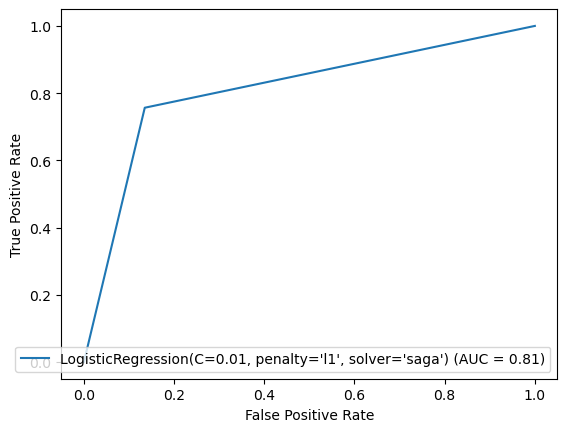

In [109]:
#Ploting roc curve
#Importing necessary libraries
from sklearn.metrics import roc_curve,auc,RocCurveDisplay

fpr,tpr,thresholds=roc_curve(y_test,pr)#Calculating ROC curve values
roc_auc=auc(fpr,tpr)#calculating AUC
display=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final)#Creating a ROC curve display
display.plot()
plt.show()

**AUC** value is **0.81**, which means the model **performs Fairly well** in **distinguishing between the classes**.

In [110]:
#Conclusion
Predicted_values=final.predict(x_test)#storing predicted values in 'Predicted_values' variable
Original_values=y_test#storing original values in 'Original_values' variable

#creating new data frame with Predicted and Original values
conclusion=pd.DataFrame({'Predicted Values':Predicted_values,'Original Values':Original_values})

In [111]:
#replacing encoding values with original values
conclusion.replace(1,'Y',inplace=True)
conclusion.replace(0,'N',inplace=True)

In [112]:
conclusion.sample(20)

Predicted Values Original Values
1346                Y               Y
151                 N               N
1167                N               Y
1473                Y               Y
509                 N               N
361                 Y               N
119                 N               N
1121                N               Y
645                 N               N
35                  N               Y
1090                Y               Y
574                 Y               Y
375                 N               N
167                 N               N
897                 Y               N
673                 N               N
1006                Y               Y
1390                Y               Y
201                 N               Y
991                 Y               Y

Here we can conclude that the model's overall **predicted values are fairly close to original values.**

In [113]:
#Saving the model
import joblib#importing library
joblib.dump(final,r'D:\Models\ICFD.obj')#saving model into desired path

['D:\\Models\\ICFD.obj']